In [76]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [77]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [78]:
import base64
from cStringIO import StringIO
from datasets.cityscapesScripts.cityscapesscripts.helpers.labels import id2label
import glob
from IPython.display import display, Image
import imageio
import numpy as np
import os
import PIL.Image
from round_embeddings import get_color_img

In [79]:
#results_dir = '/zfsauton/project/public/deep_clustering/exp/cityscapes/train_on_train_set/emb/matt/001_instance_norm_batch2_lr1e-3_Apr17-14:07:22_VCS-bc609d9_gpu2/raw_segmentation_results/roundings'
results_dir = '/zfsauton/project/public/deep_clustering/exp/cityscapes/train_on_train_set/round/matt/002_instance_norm_block_batch2_lr1e-2_Apr26-15:18:23_VCS-943e4af_gpu4'
gt_dir = '/zfsauton/project/public/deep_clustering/data/datasets/cityscapes/gtFine/val'
max_images = 5
IMG_END = '_pred_instances.png'
WIDTH = 800

In [80]:
def get_img_from_array(a, fmt='png', width=None):
    s = get_string_from_array(a, fmt=fmt)
    return Image(data=s, width=width)

In [81]:
def get_string_from_array(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    return f.getvalue()

In [82]:
def display_side_by_side(im1, im2):
    """
    im1: Image string
    im2: Path to real image
    """
    im1 = 'data:image/pnga;base64,' + base64.b64encode(im1)
    with open(im2, "rb") as image_file:
        im2 = 'data:image/png;base64,' + base64.b64encode(image_file.read())
    
    s = """<table>
<tr>
<th><img src="{}"/></th>
<th><img src="{}"/></th>
</tr></table>""".format(im1, im2)
    t=HTML(s)
    display(t)

Found 327 predictions
frankfurt_000000_009561
ground truth


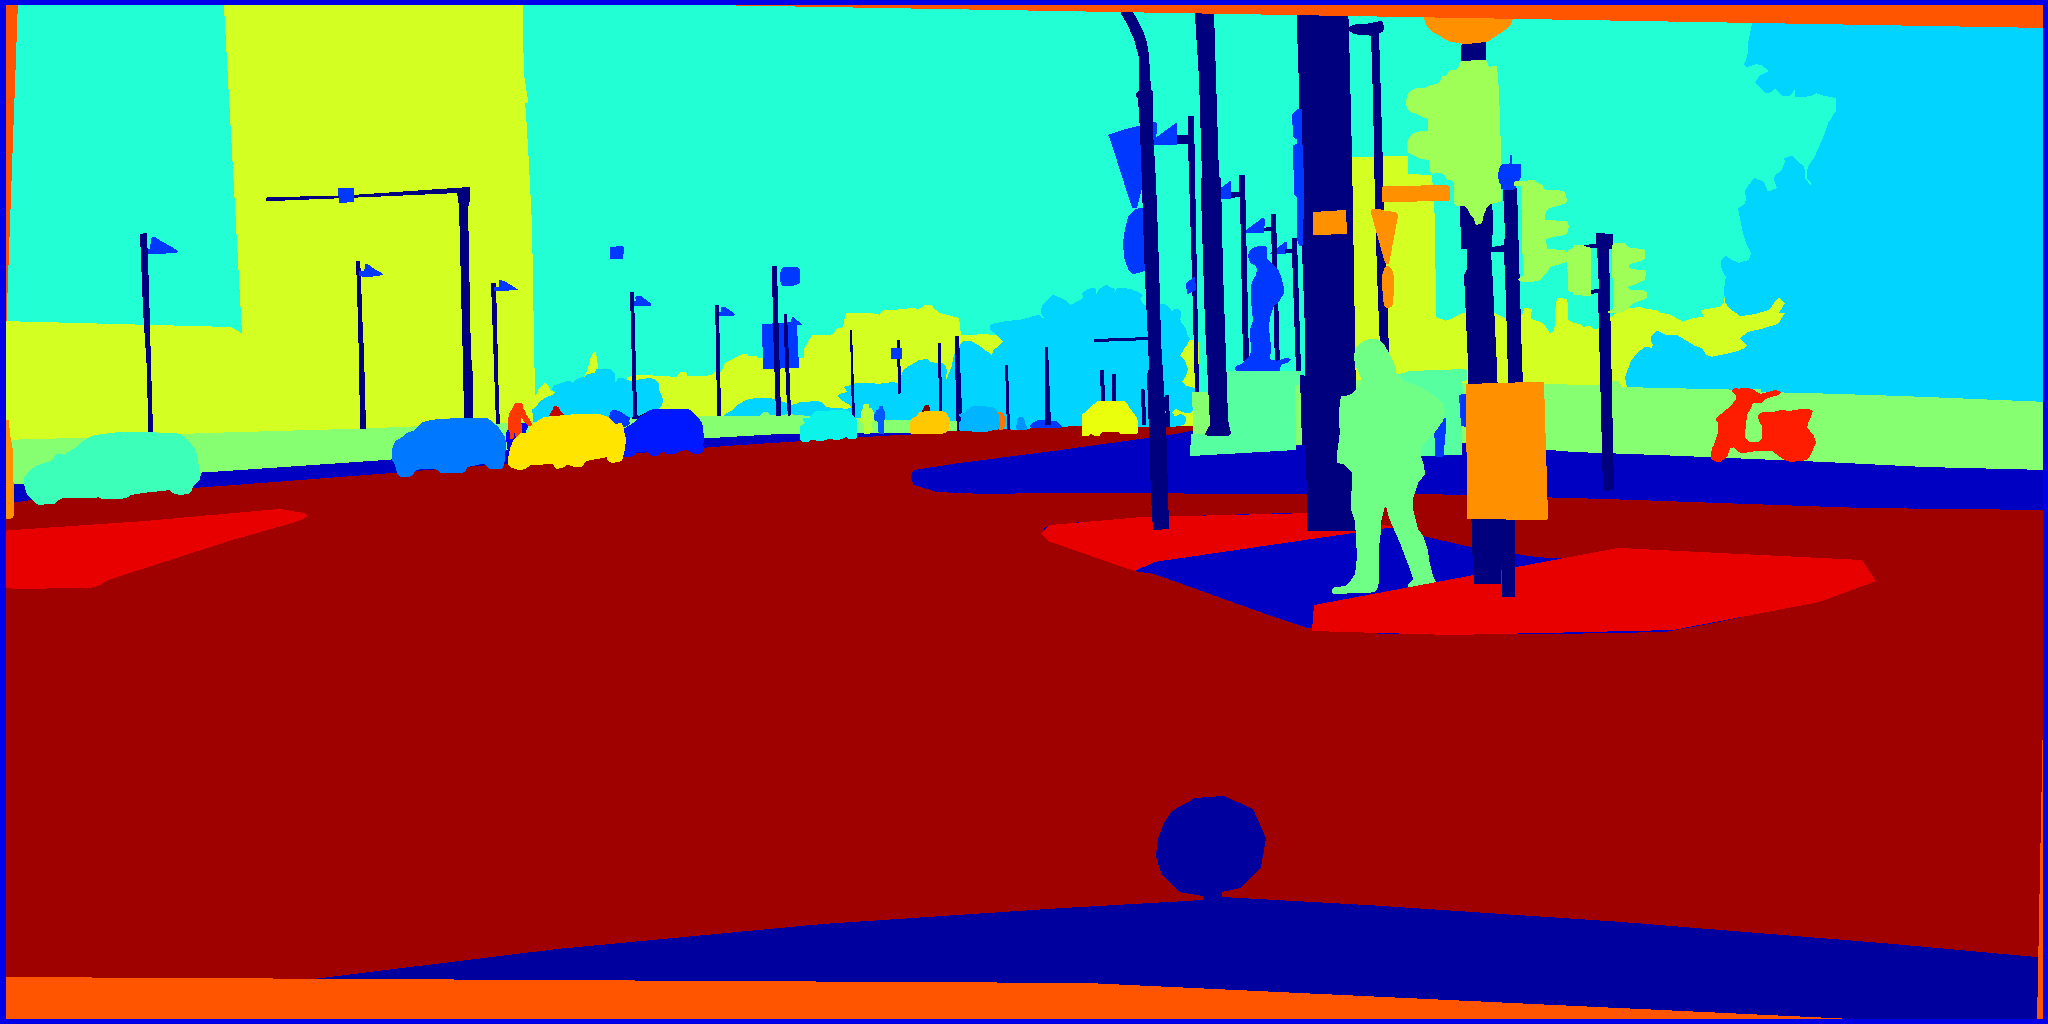

predictions


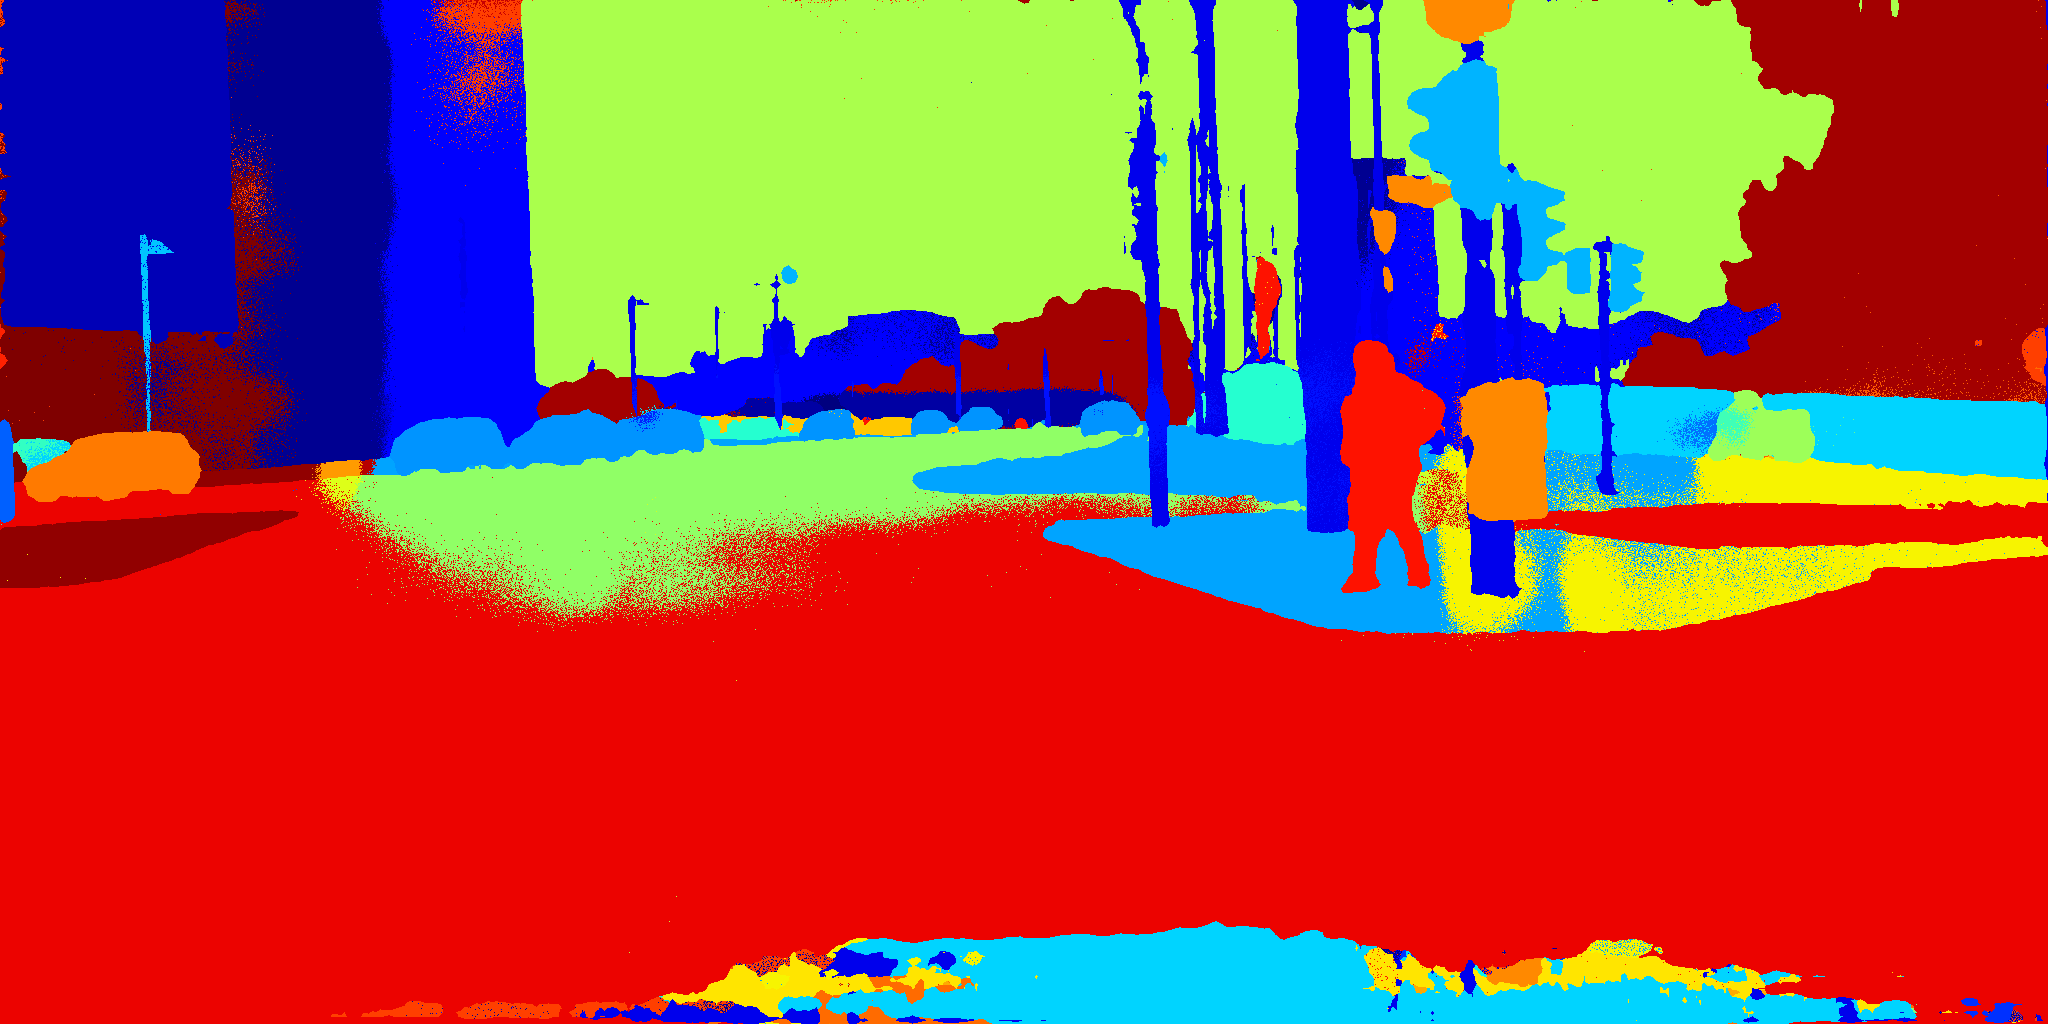

bicycle: ground truth


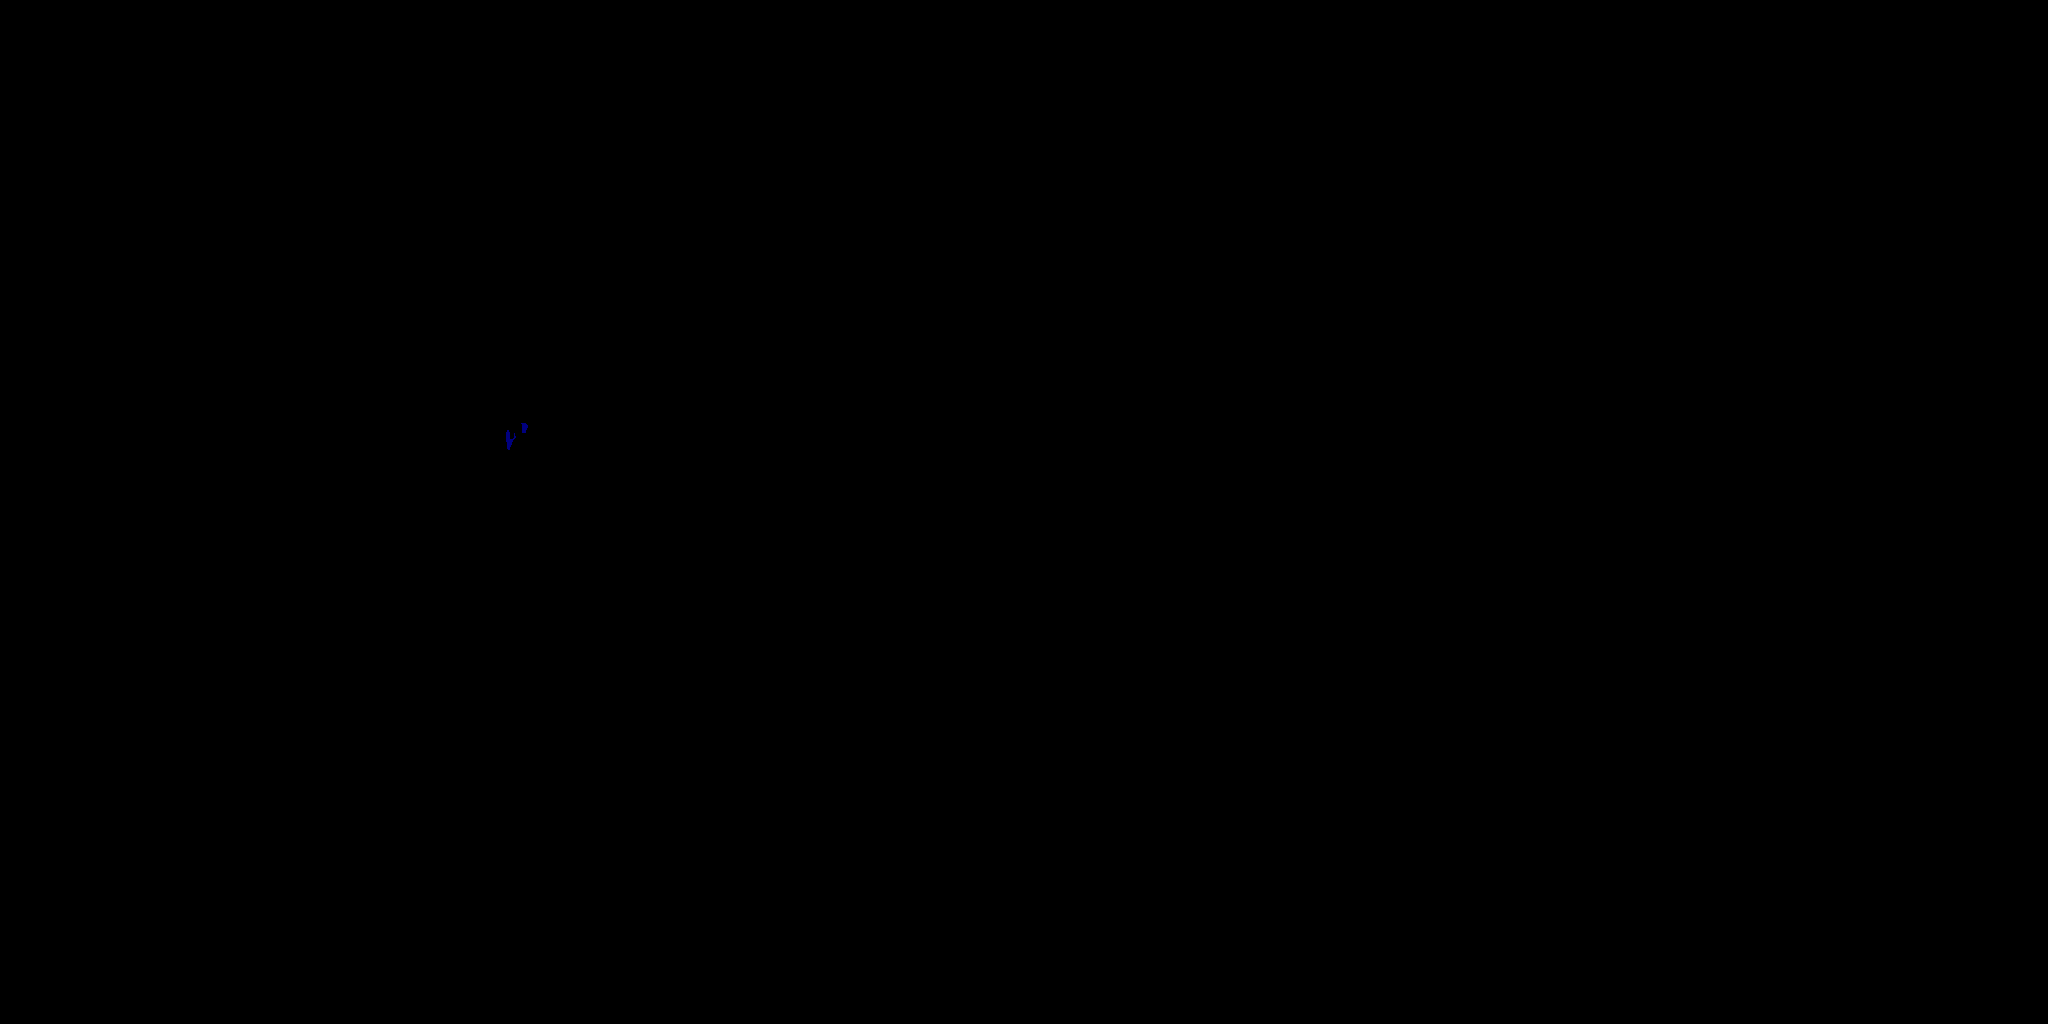

bicycle: predictions


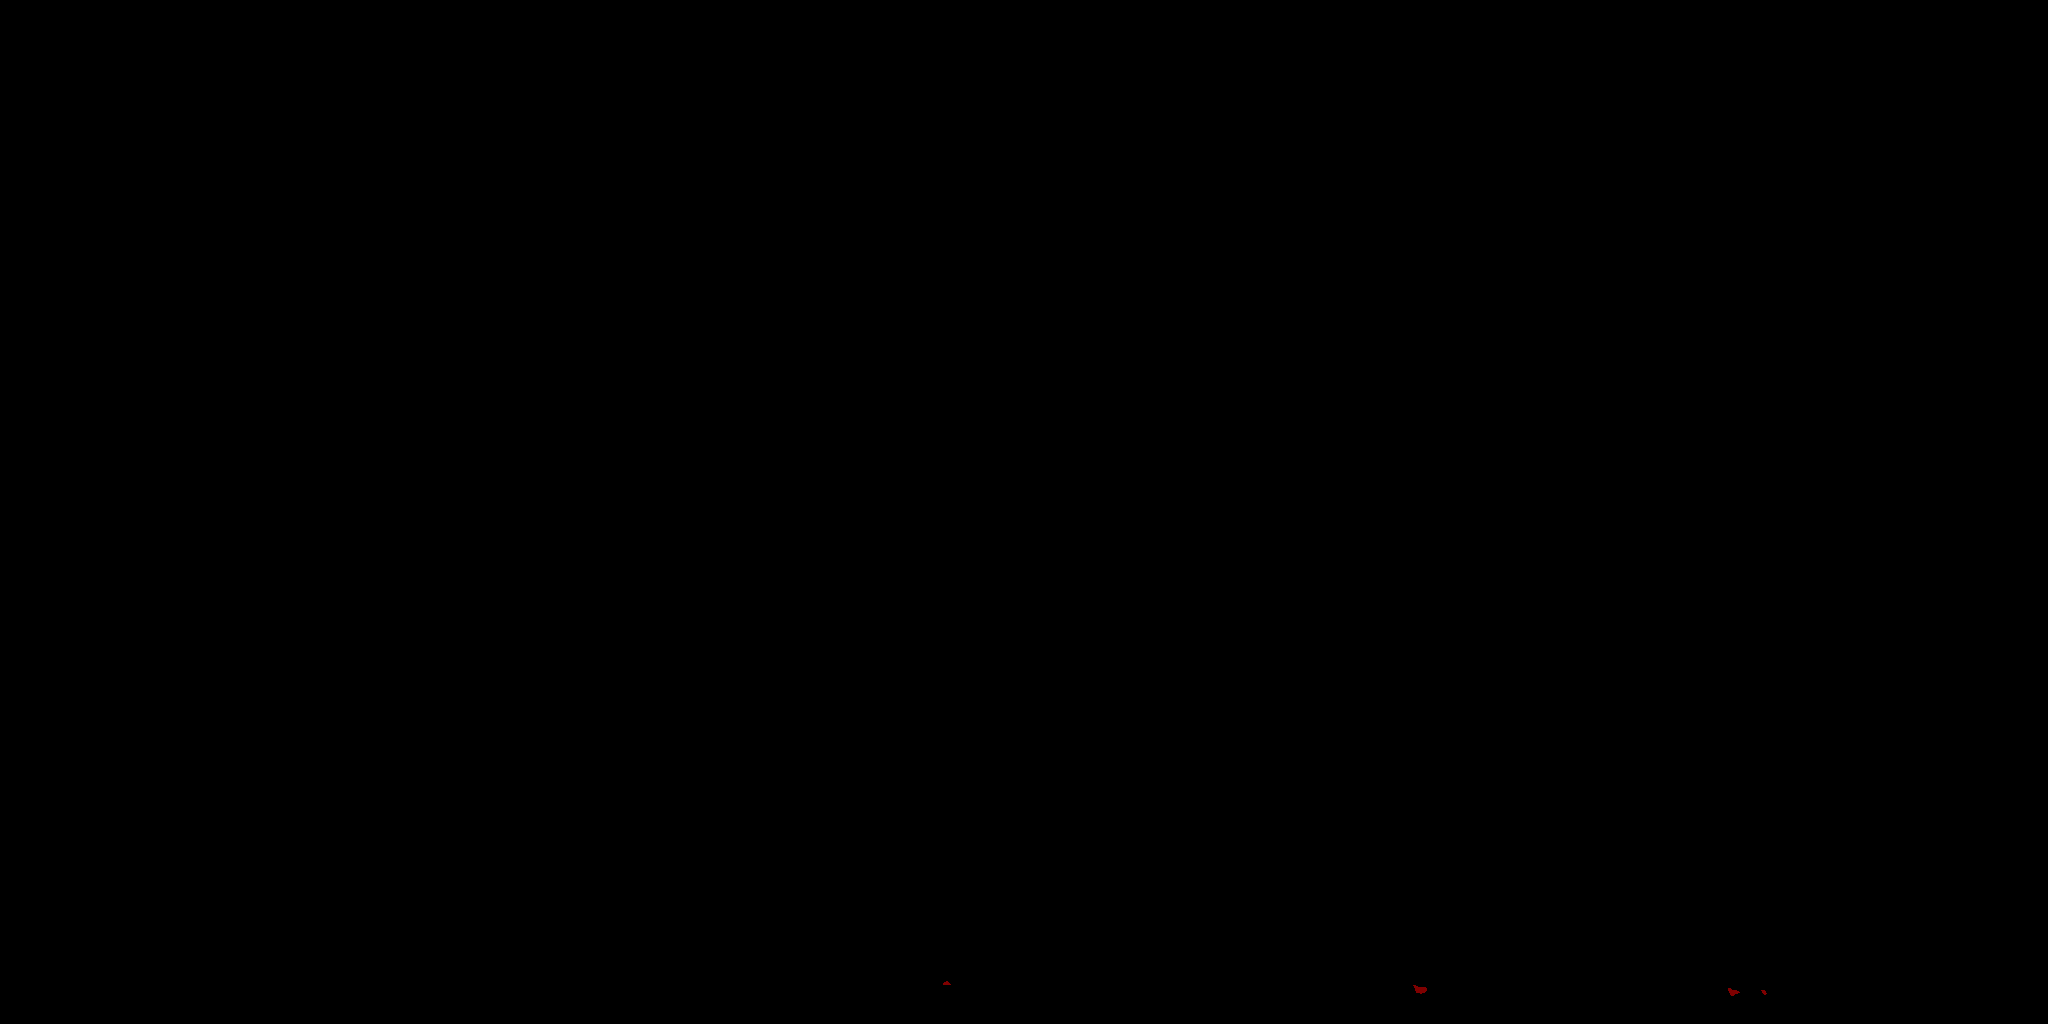

person: ground truth


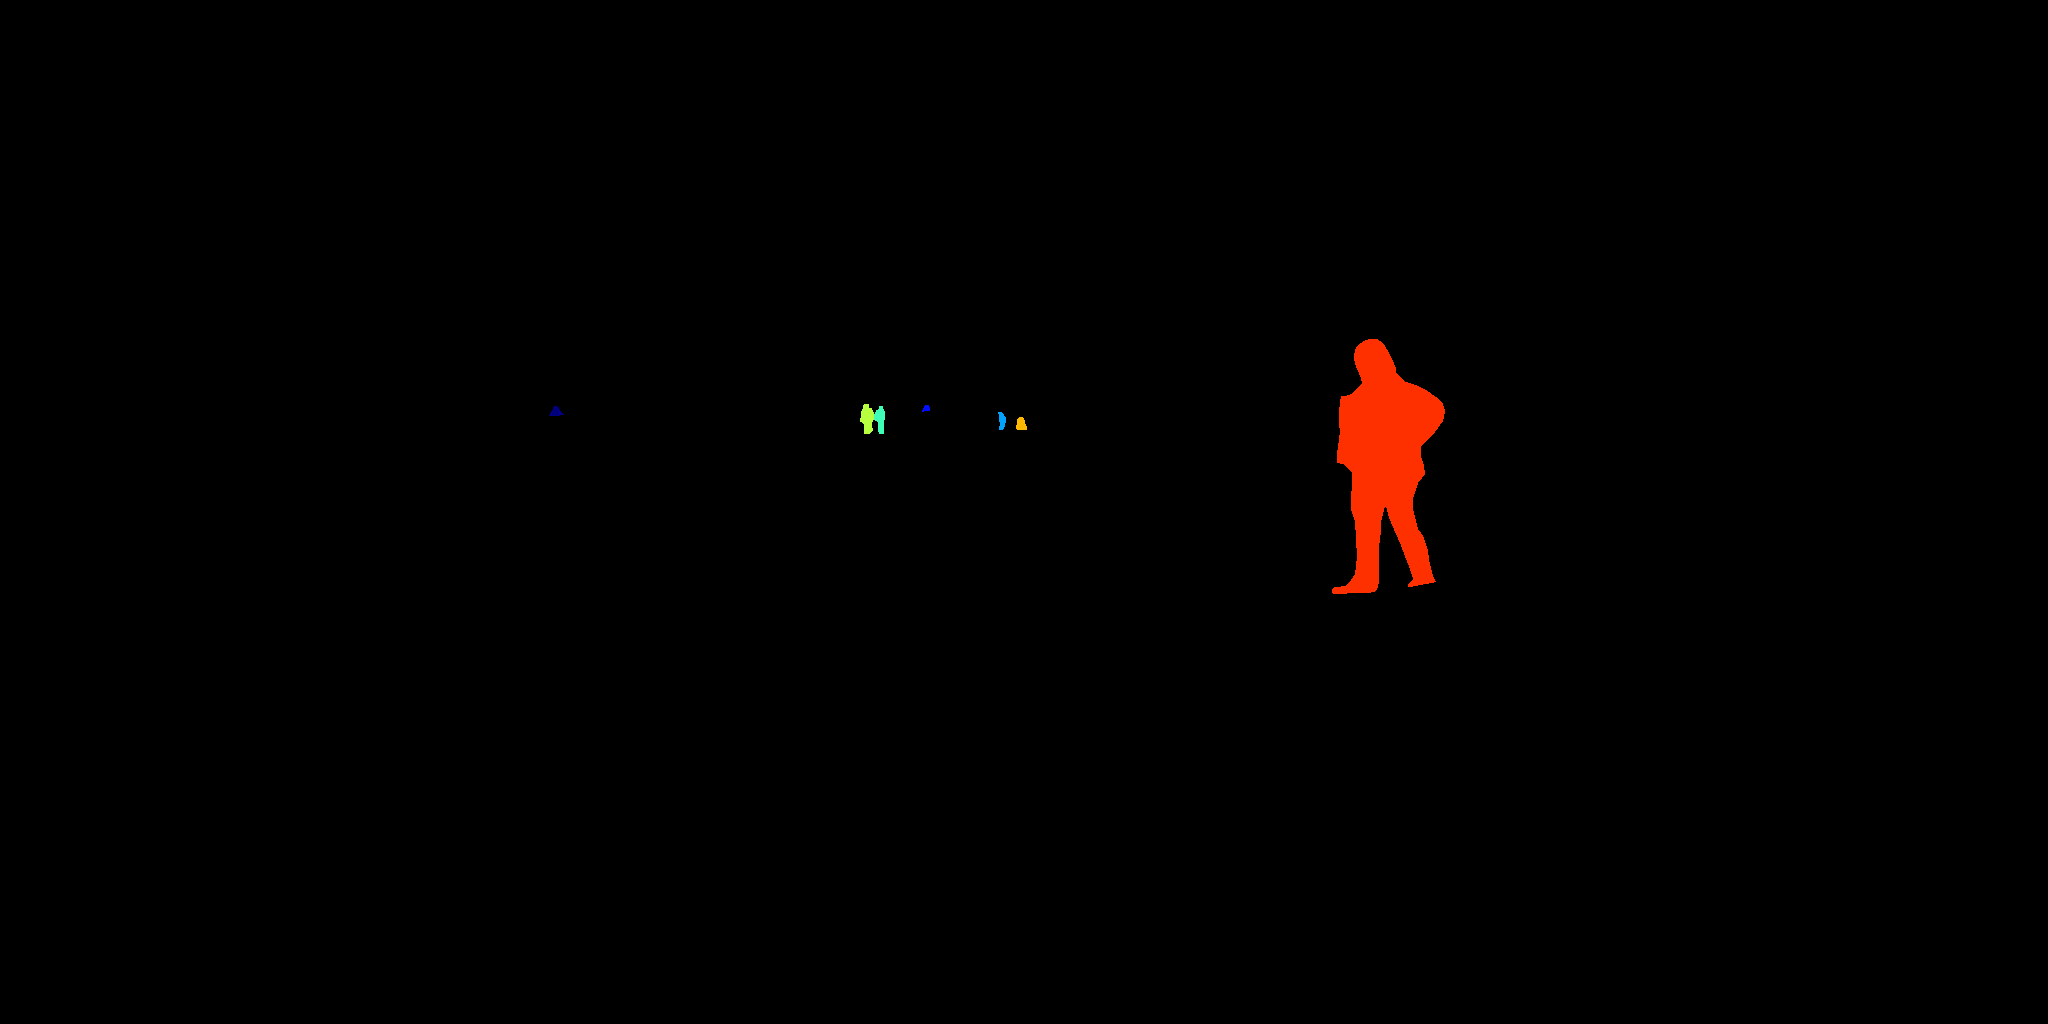

person: predictions


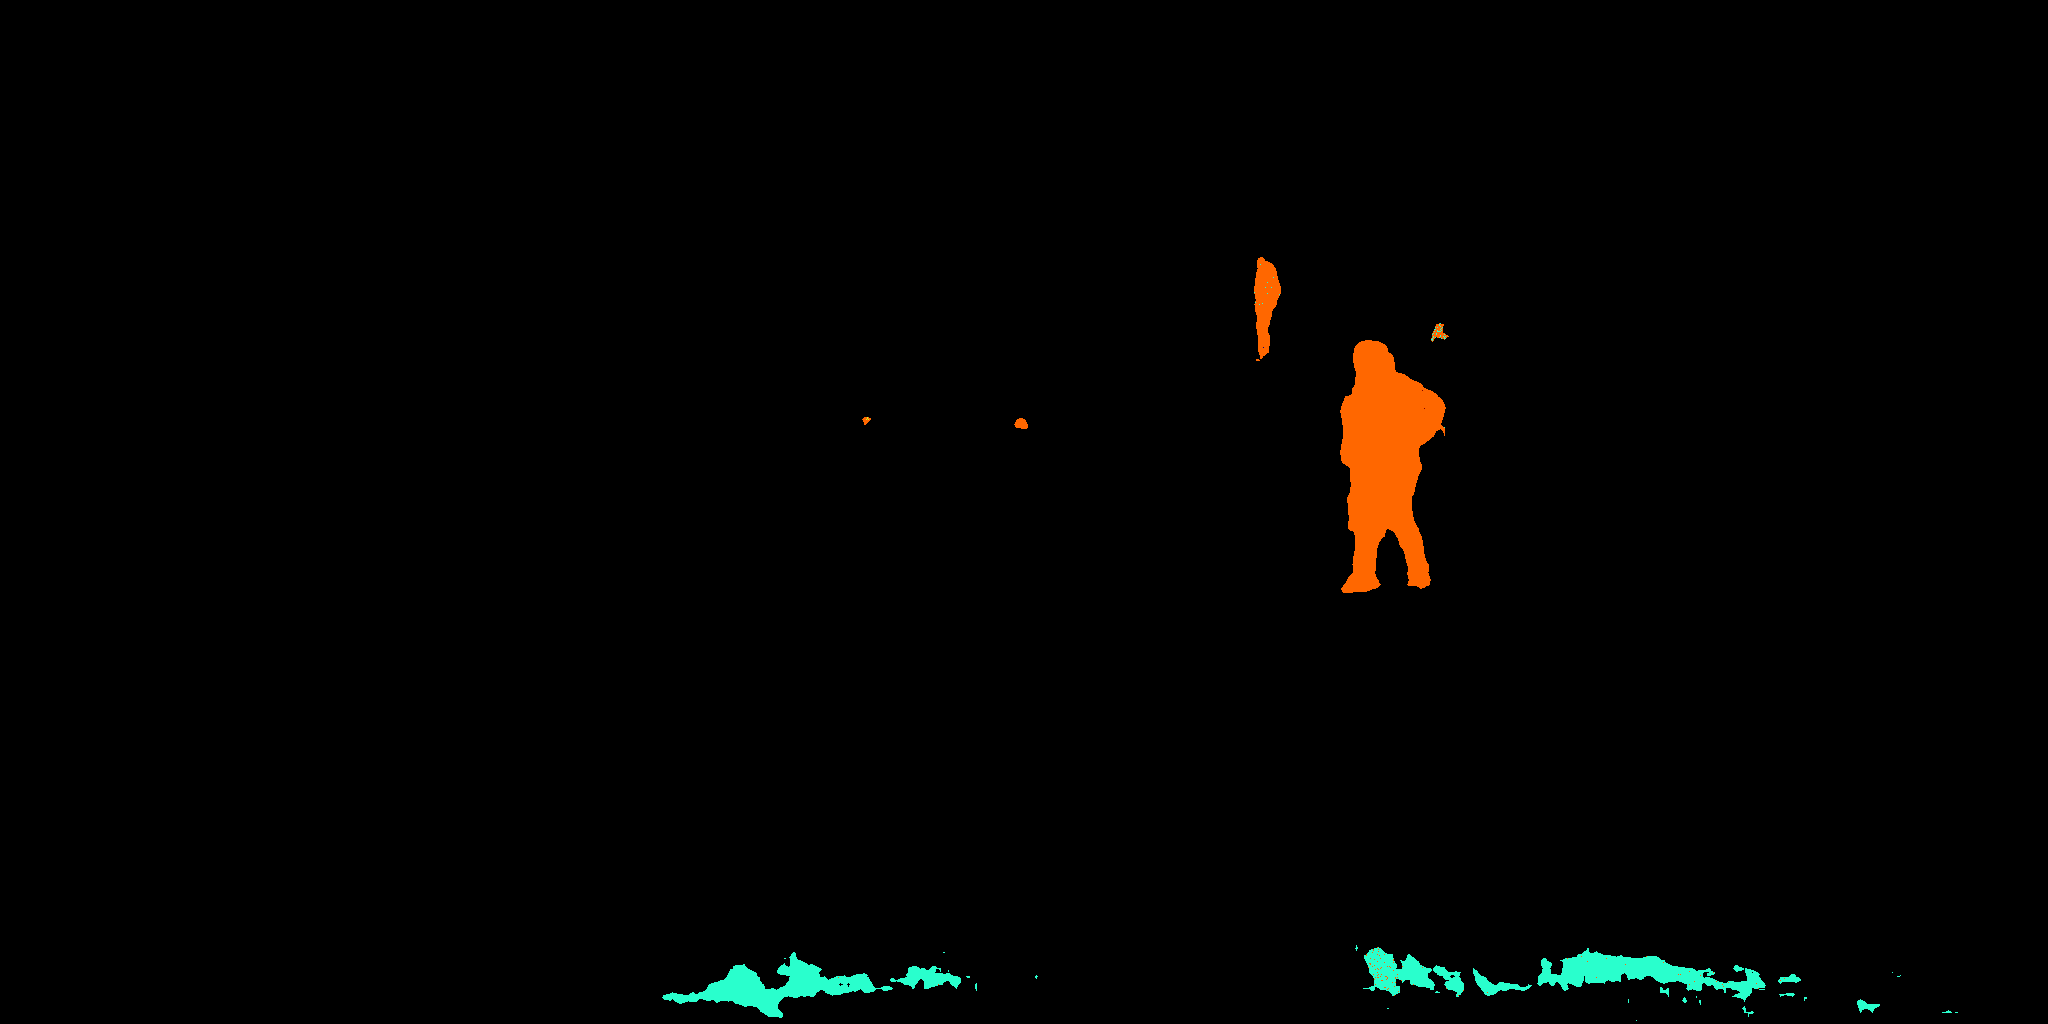

motorcycle: ground truth


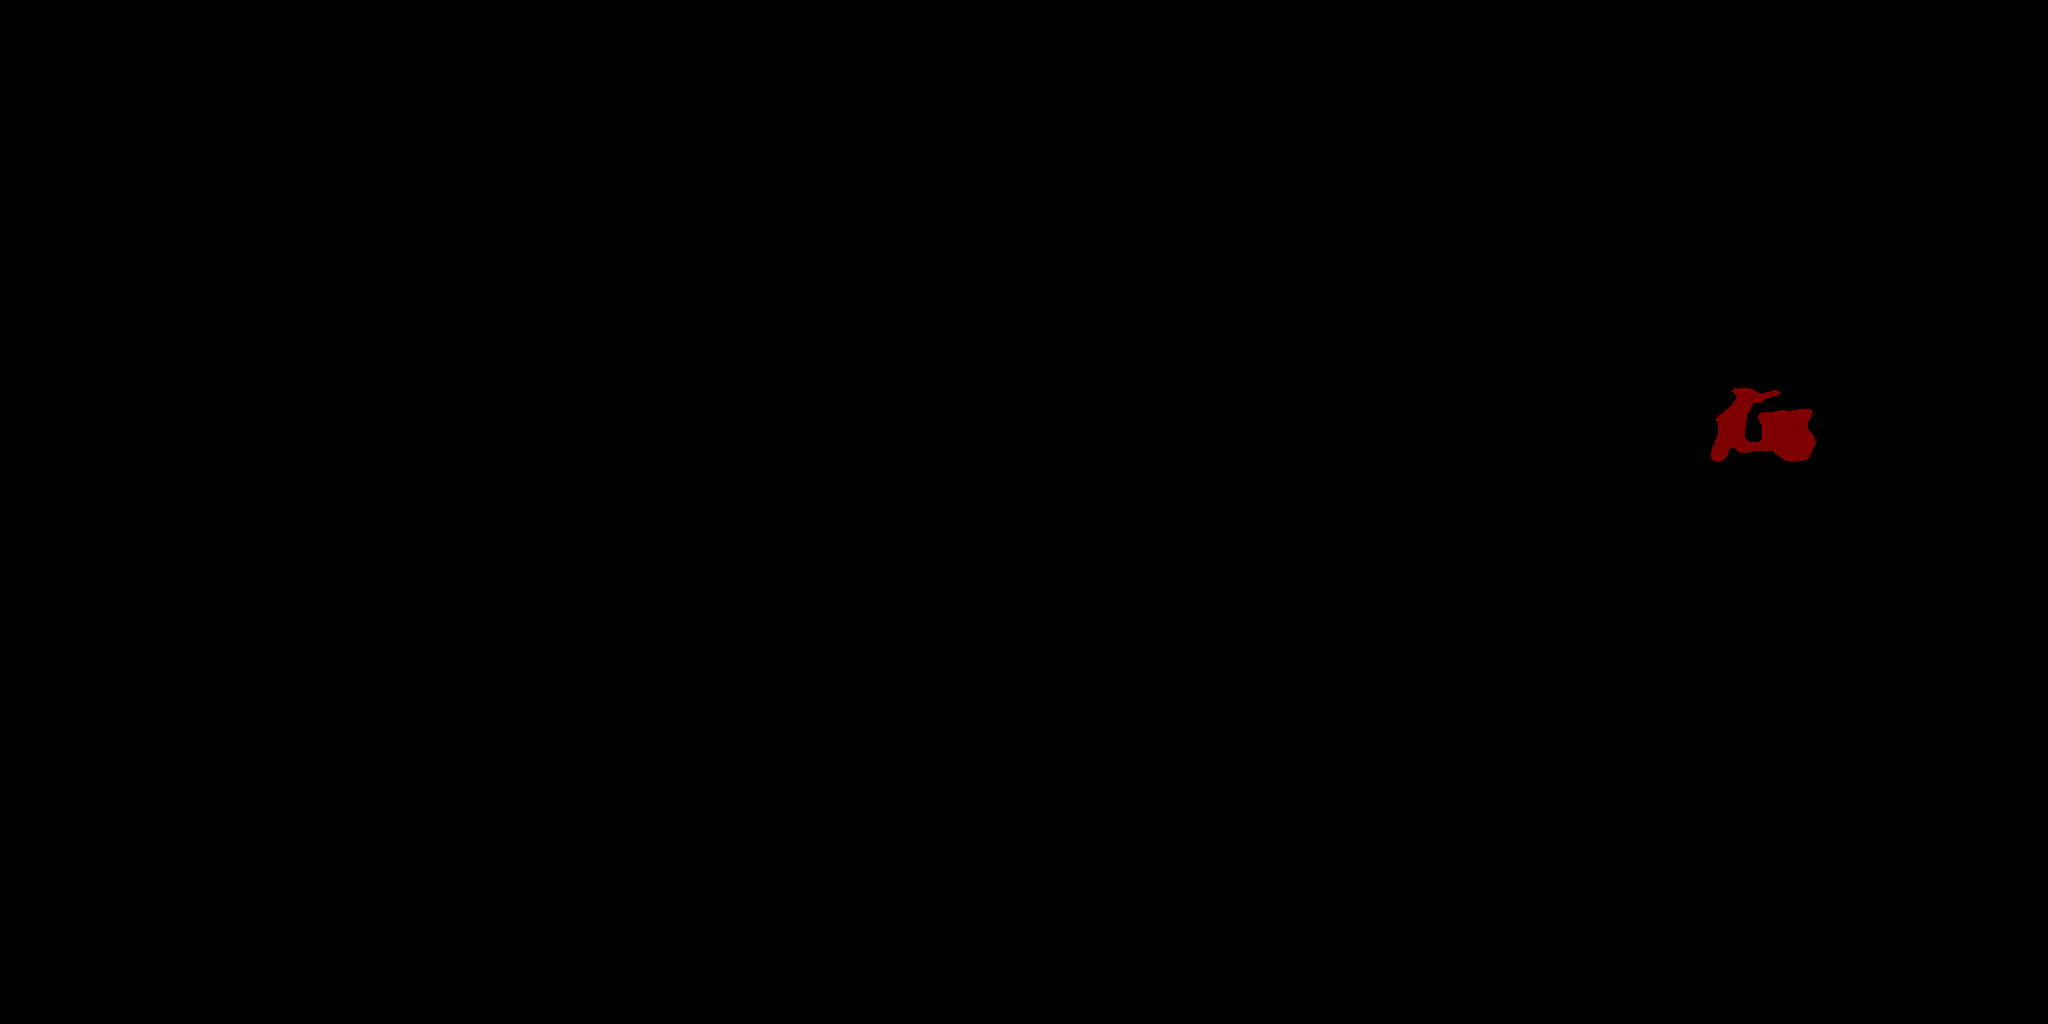

motorcycle: predictions


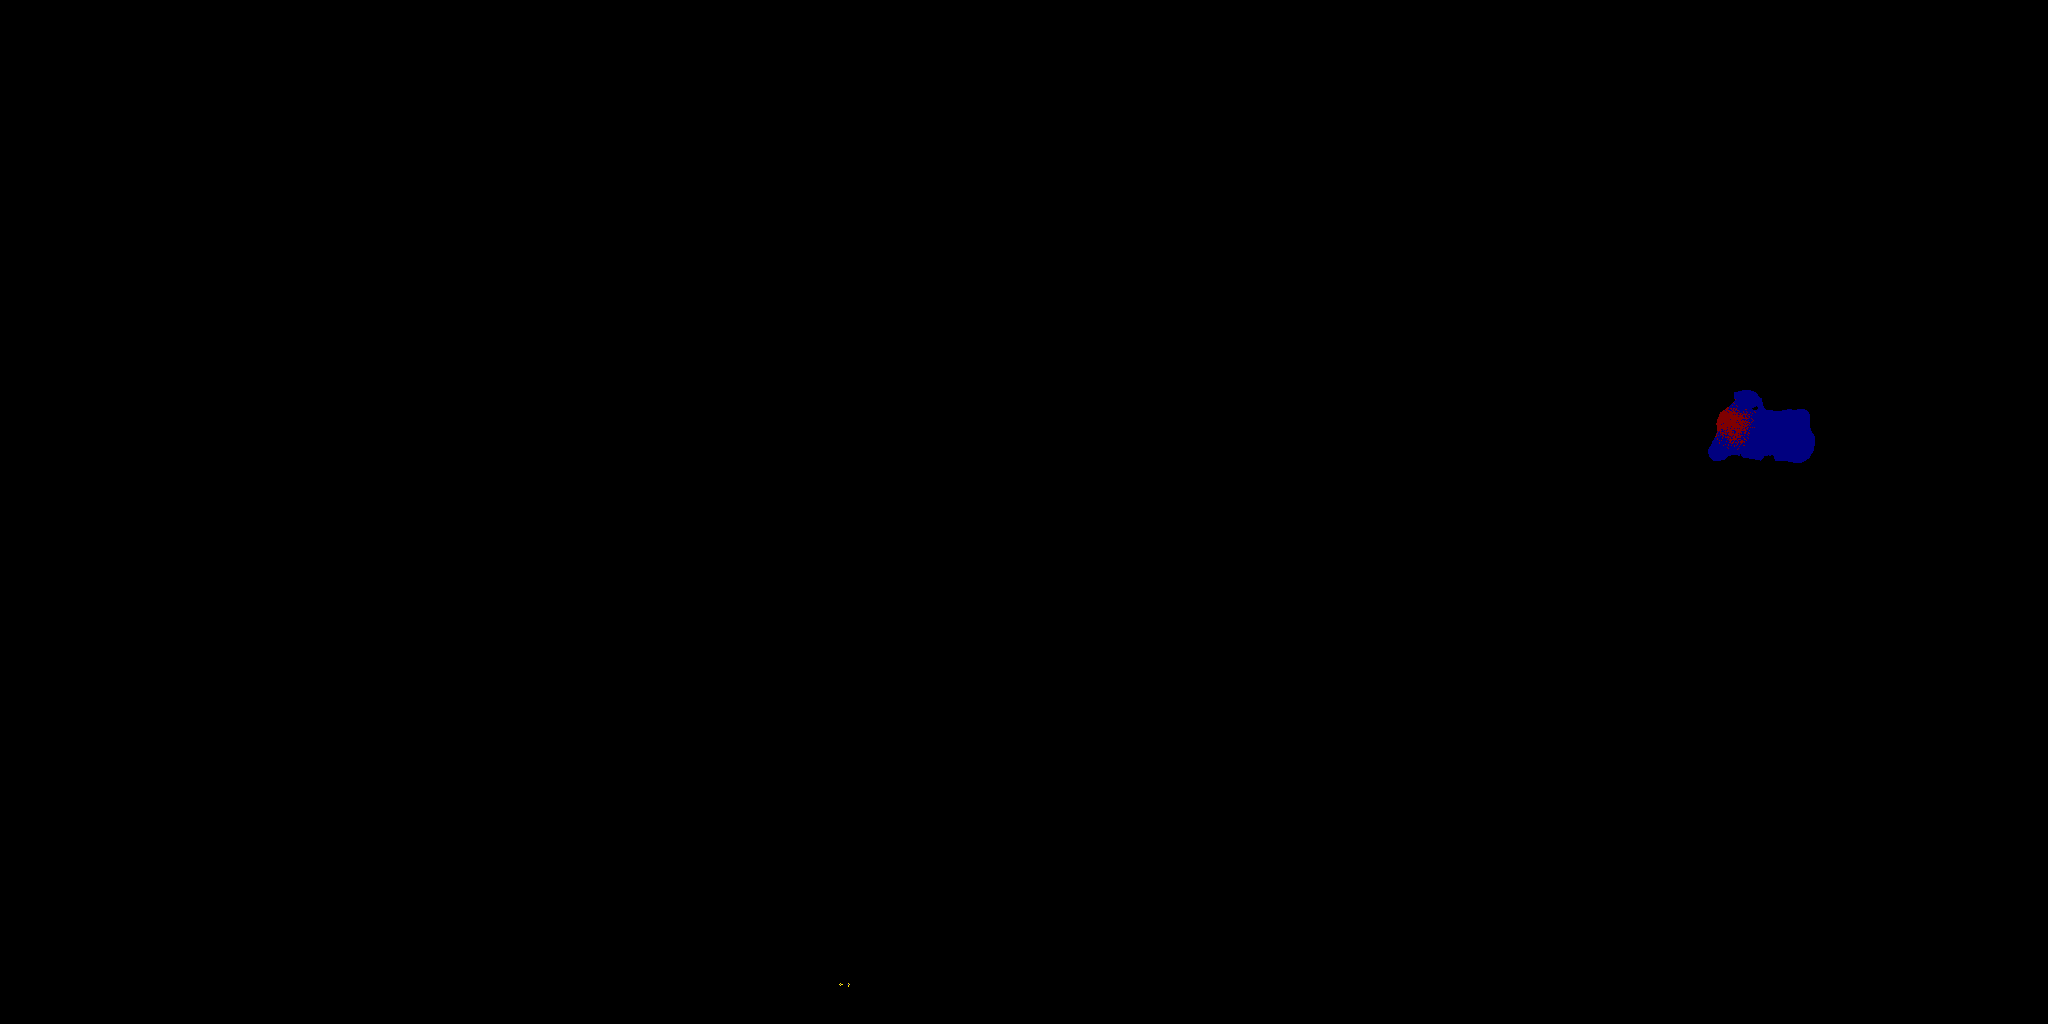

train: ground truth


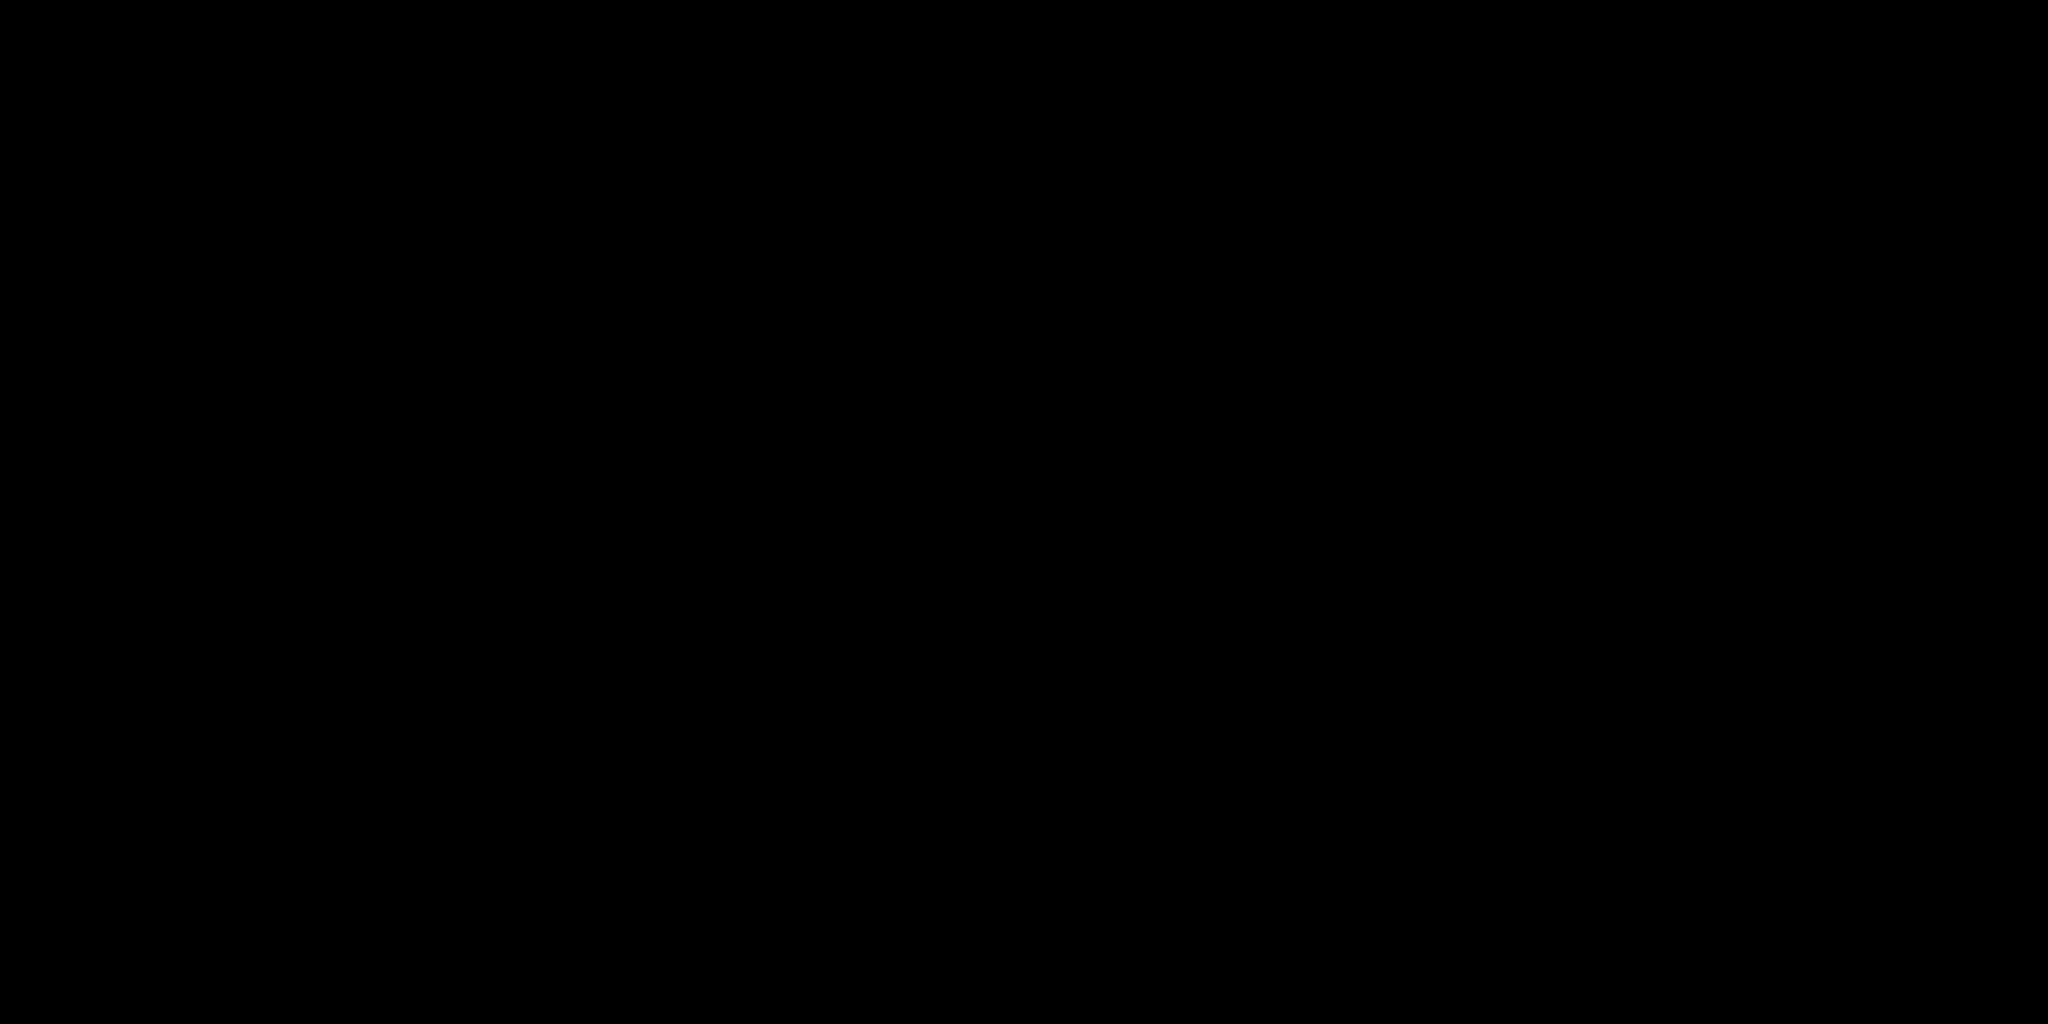

train: predictions


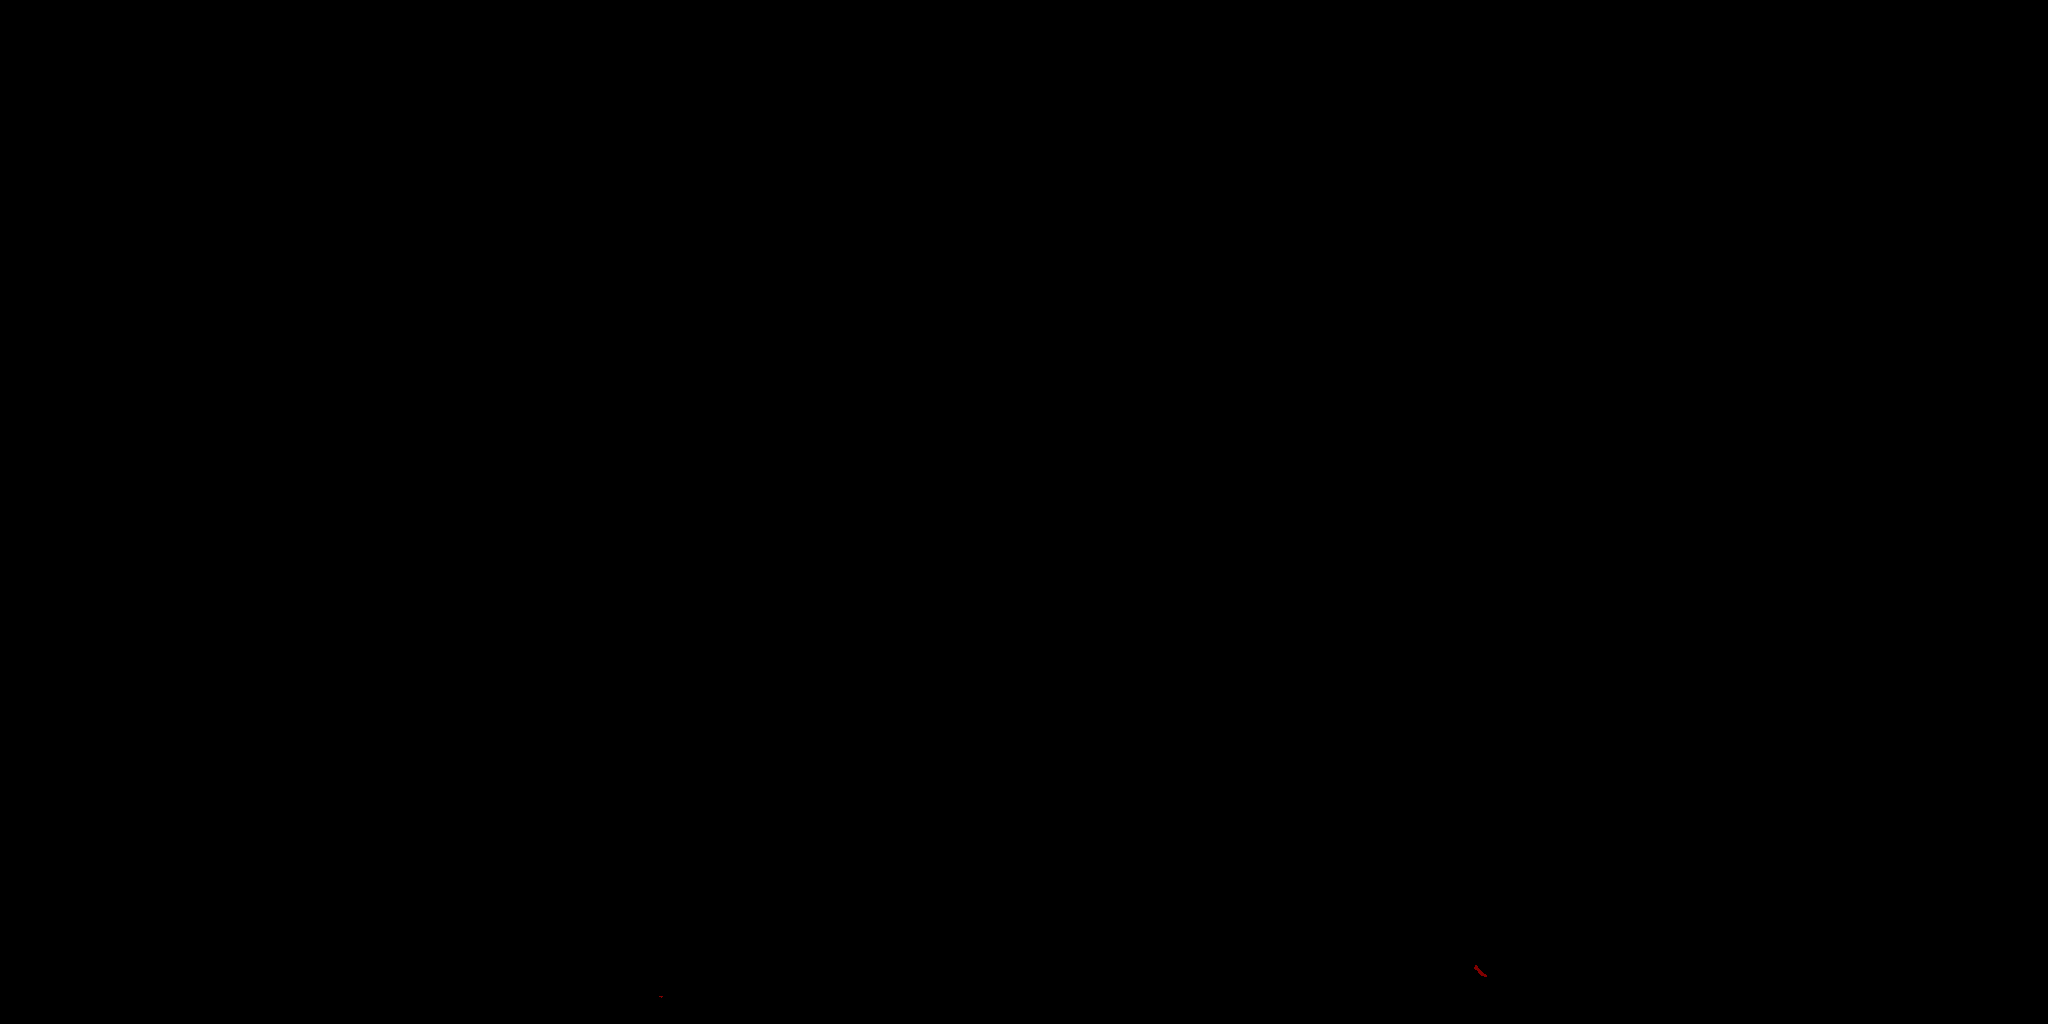

truck: ground truth


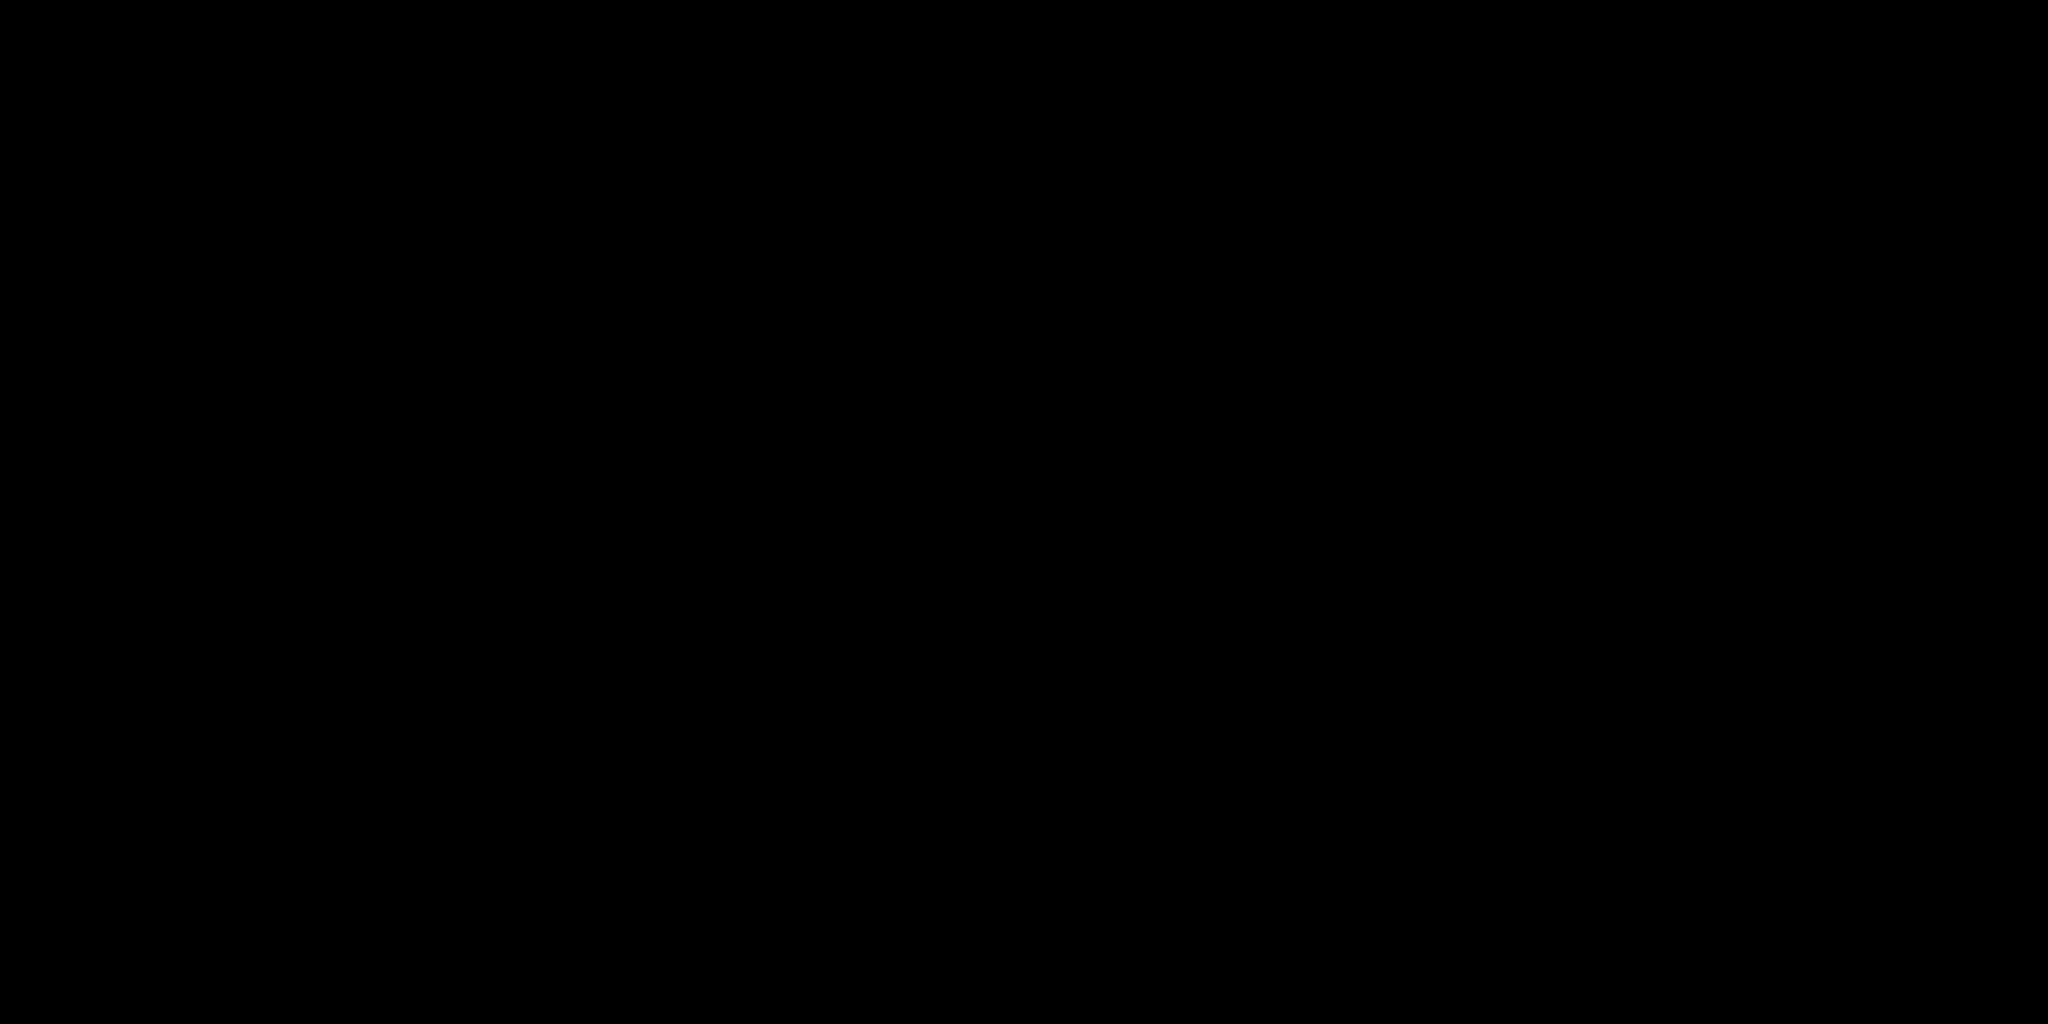

truck: predictions


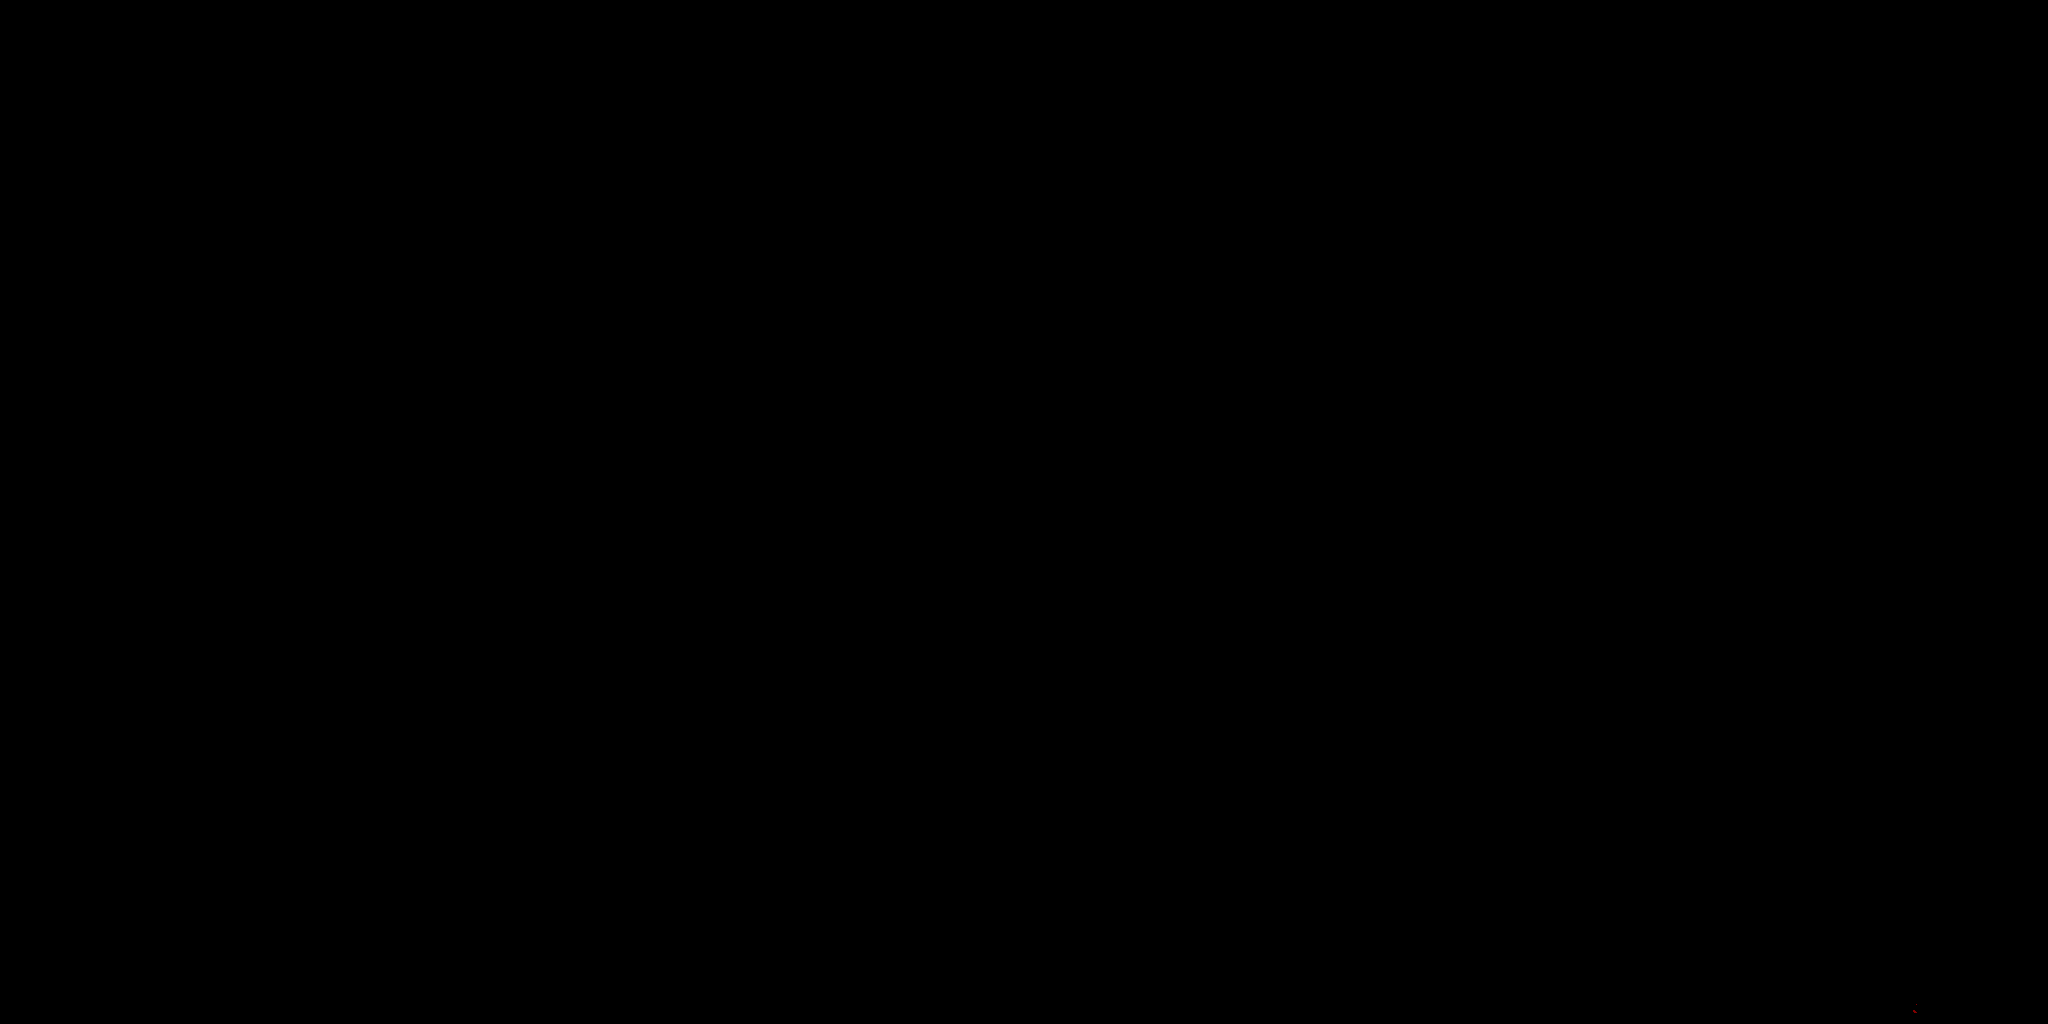

car: ground truth


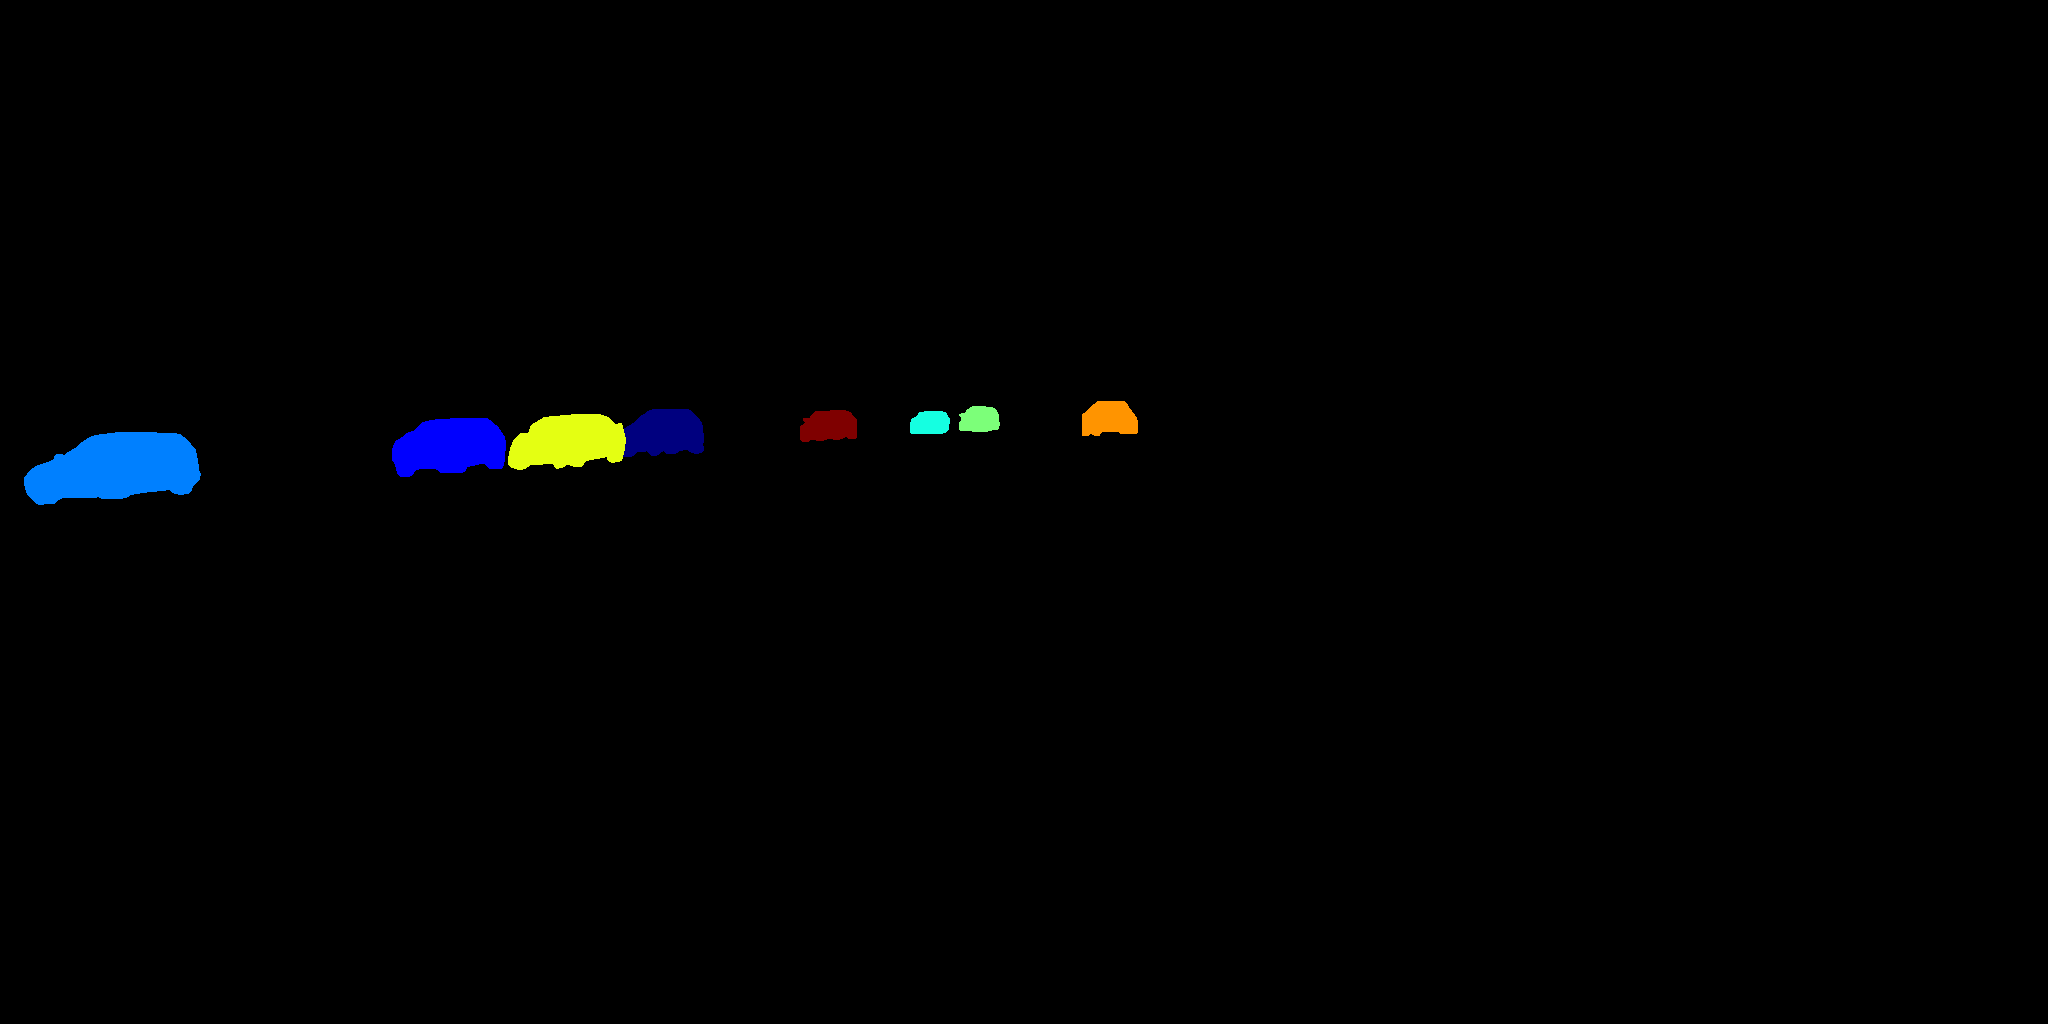

car: predictions


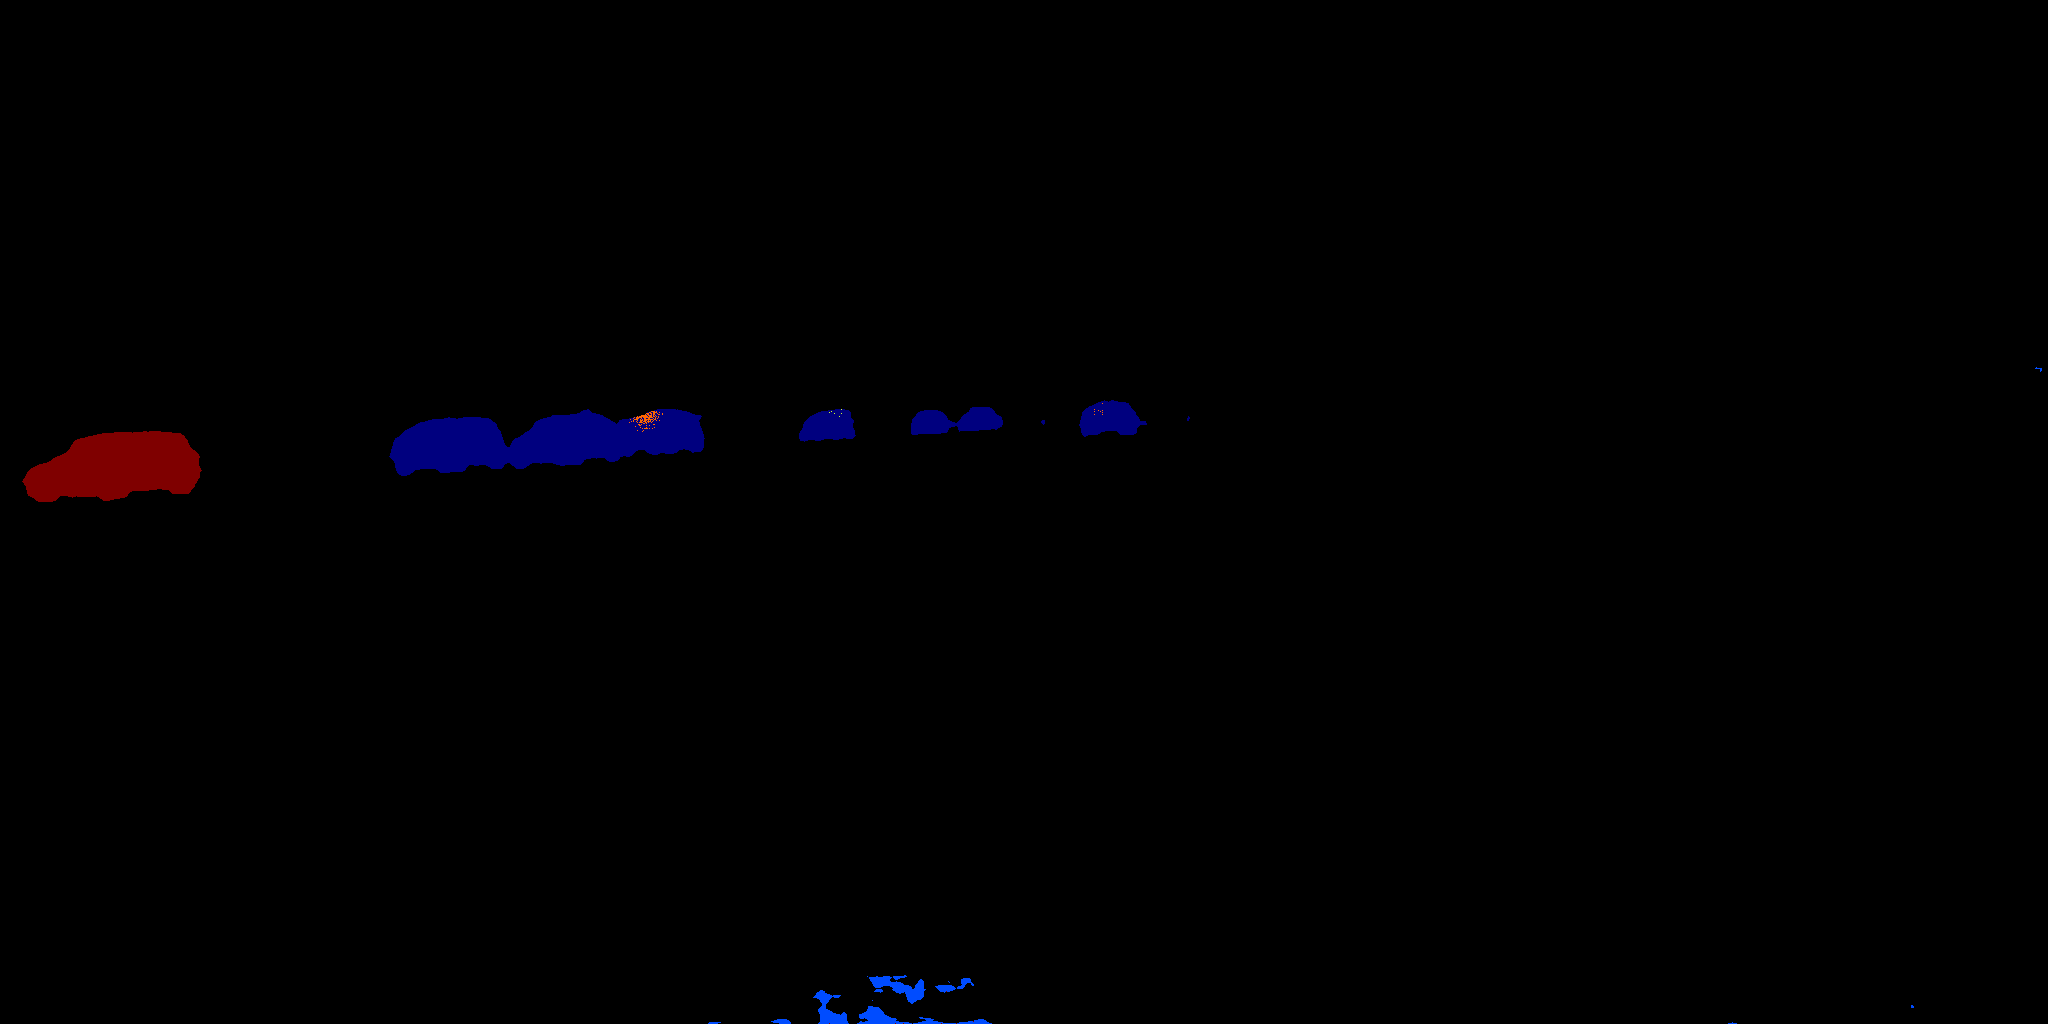

bus: ground truth


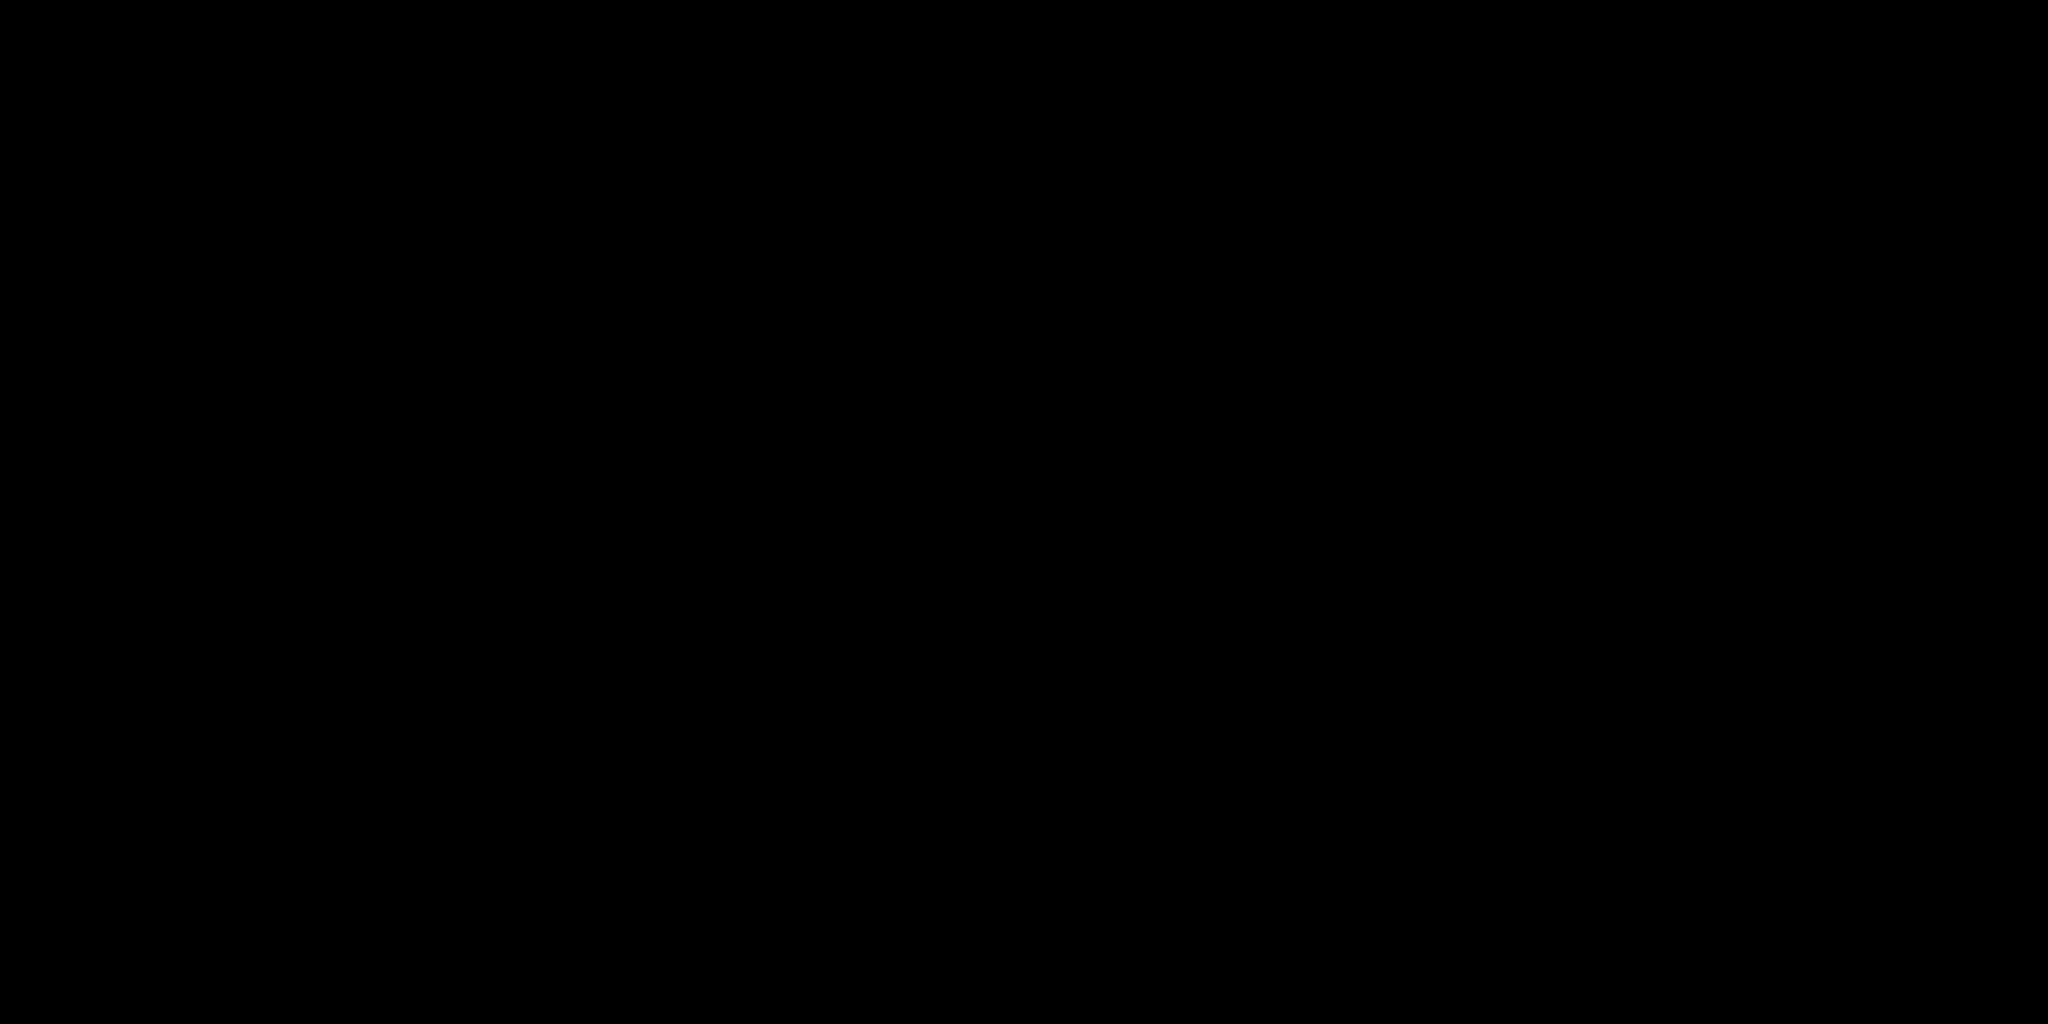

bus: predictions


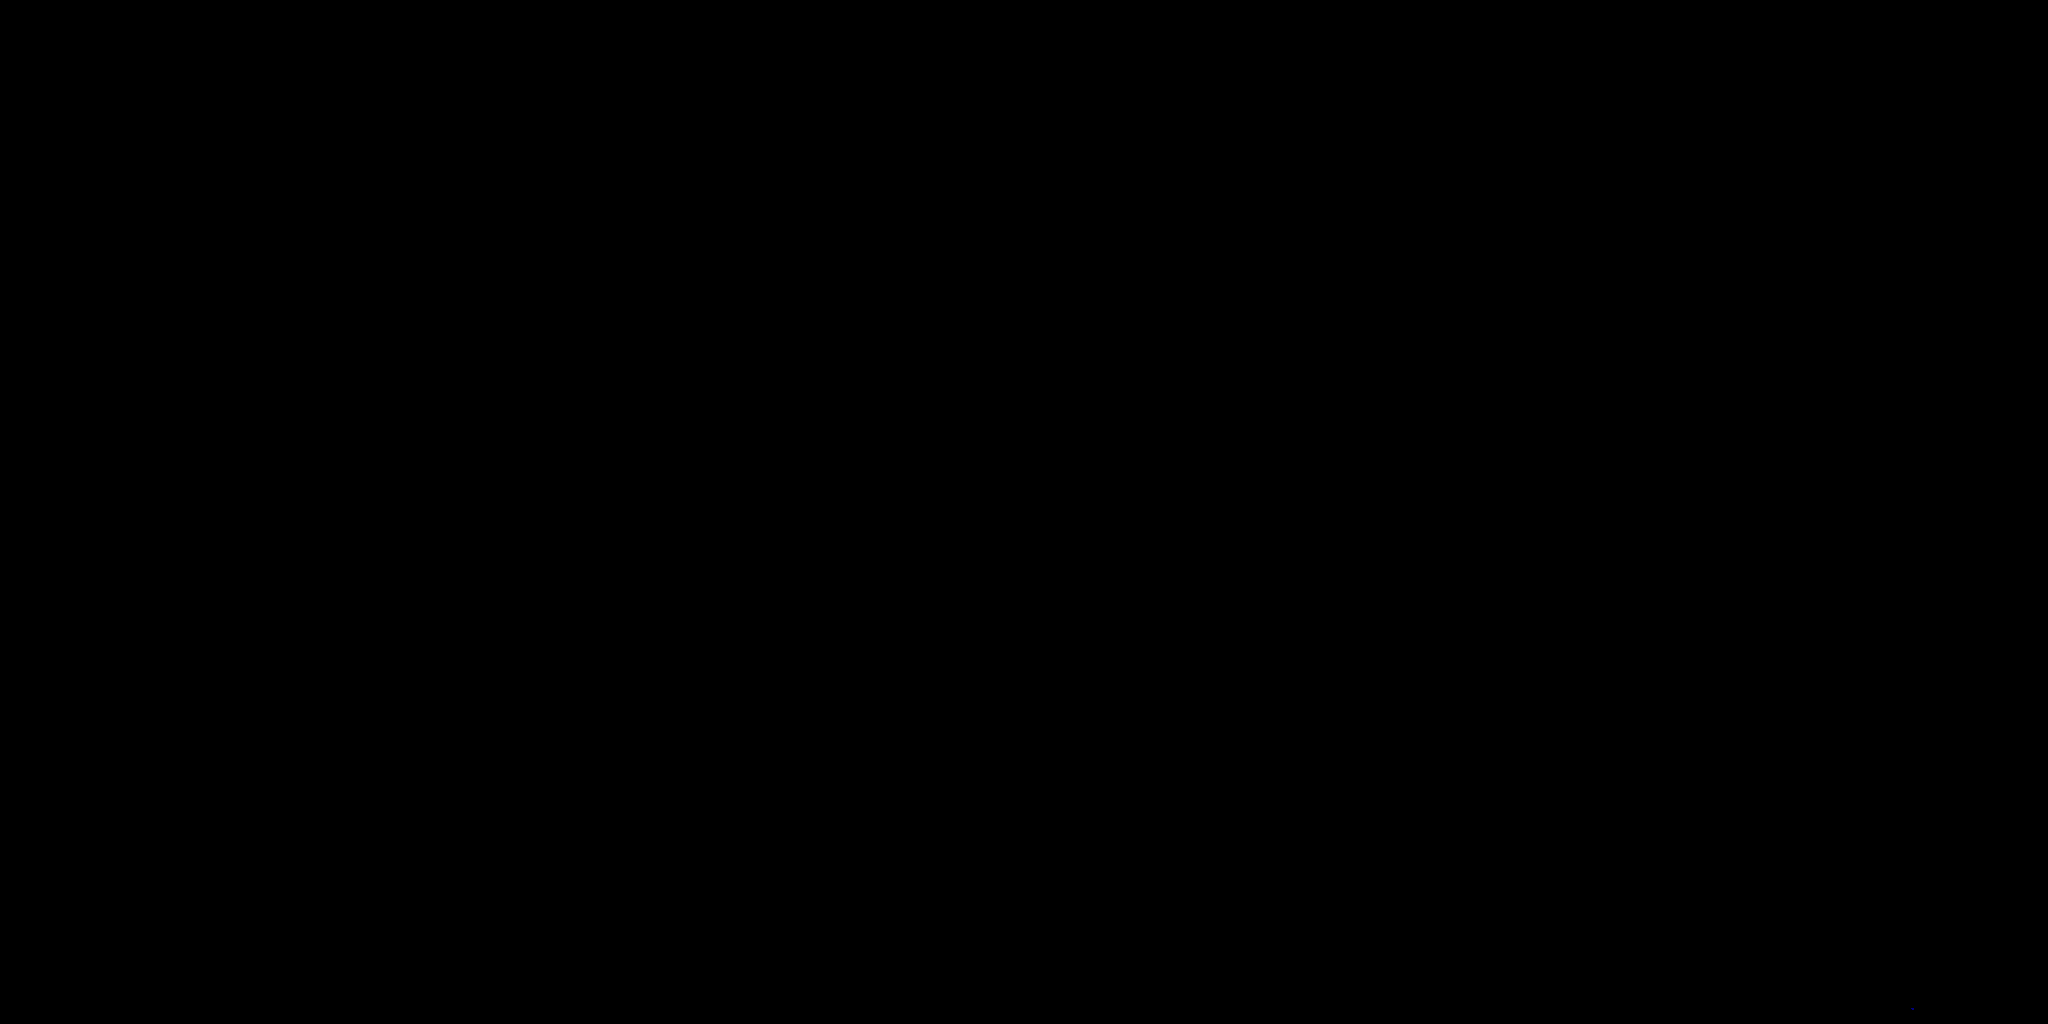

frankfurt_000000_013067
ground truth


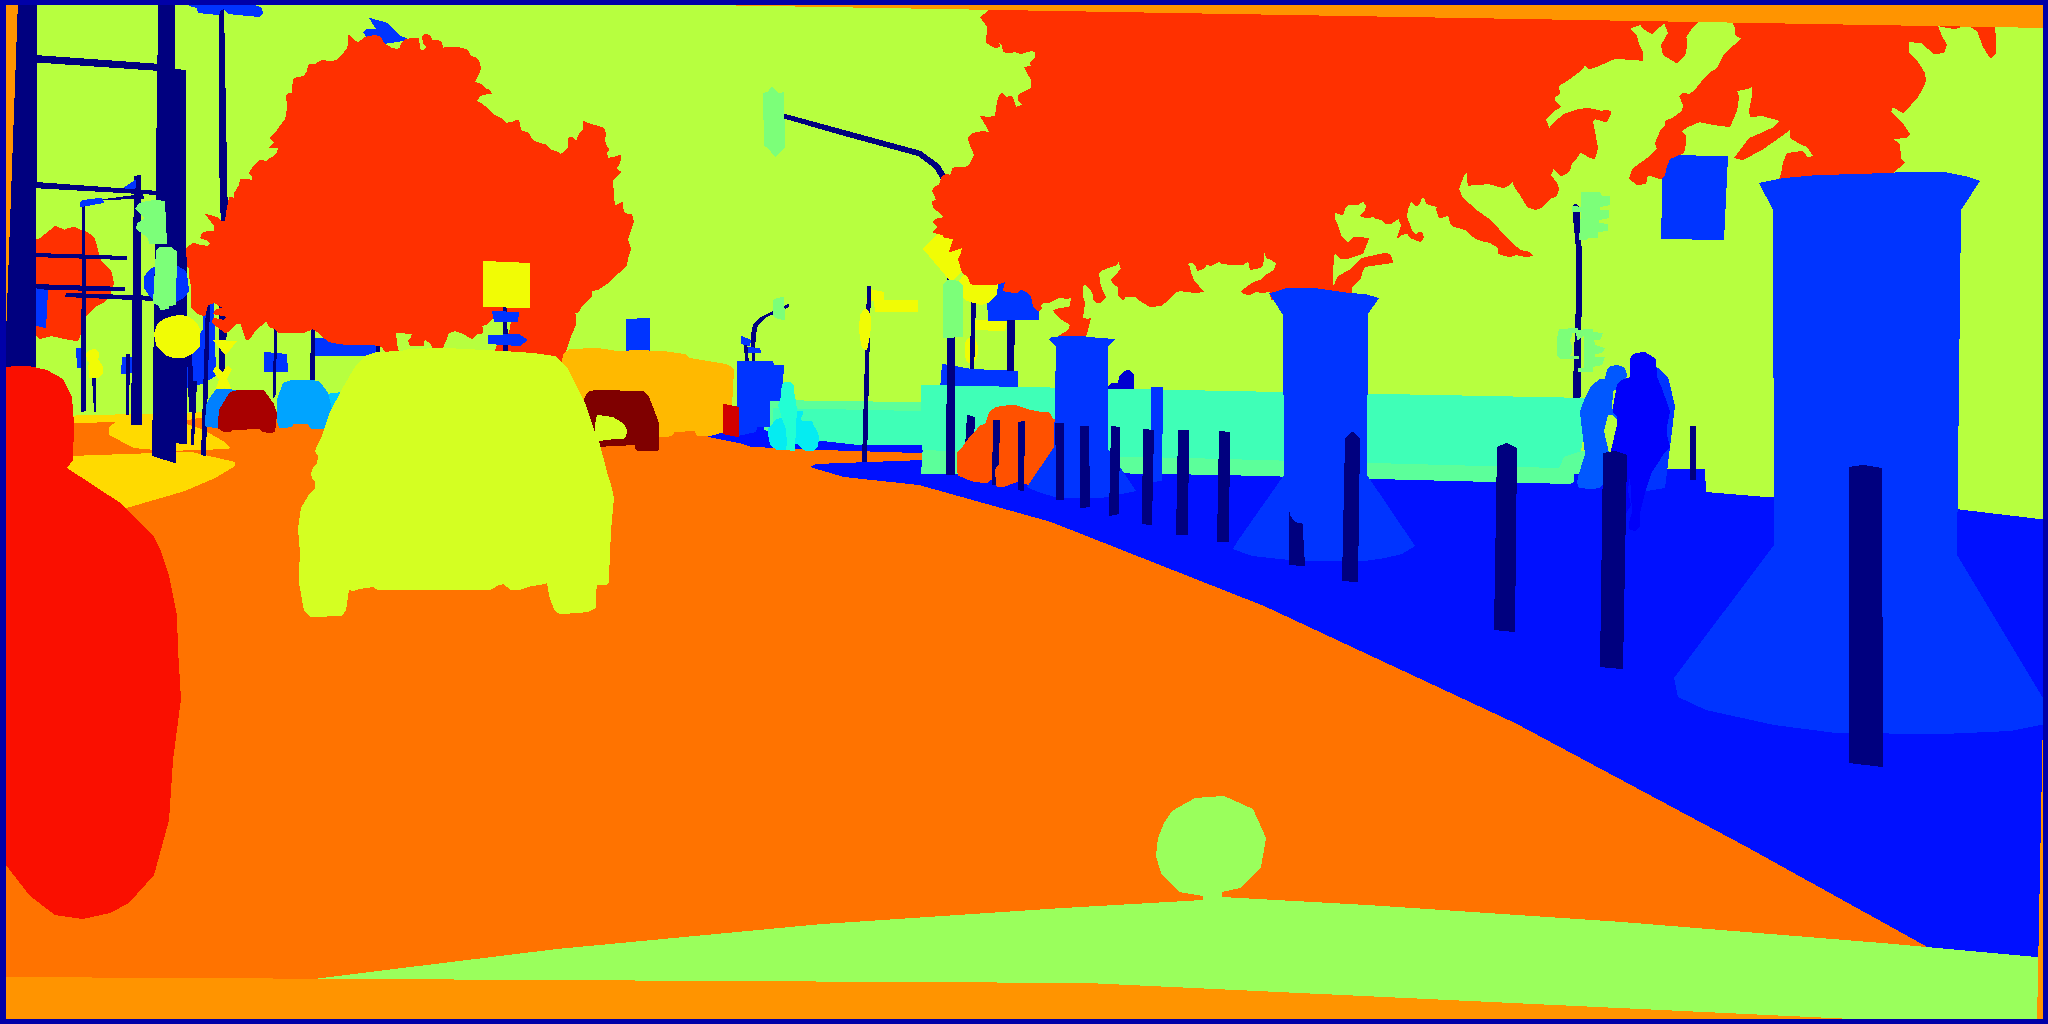

predictions


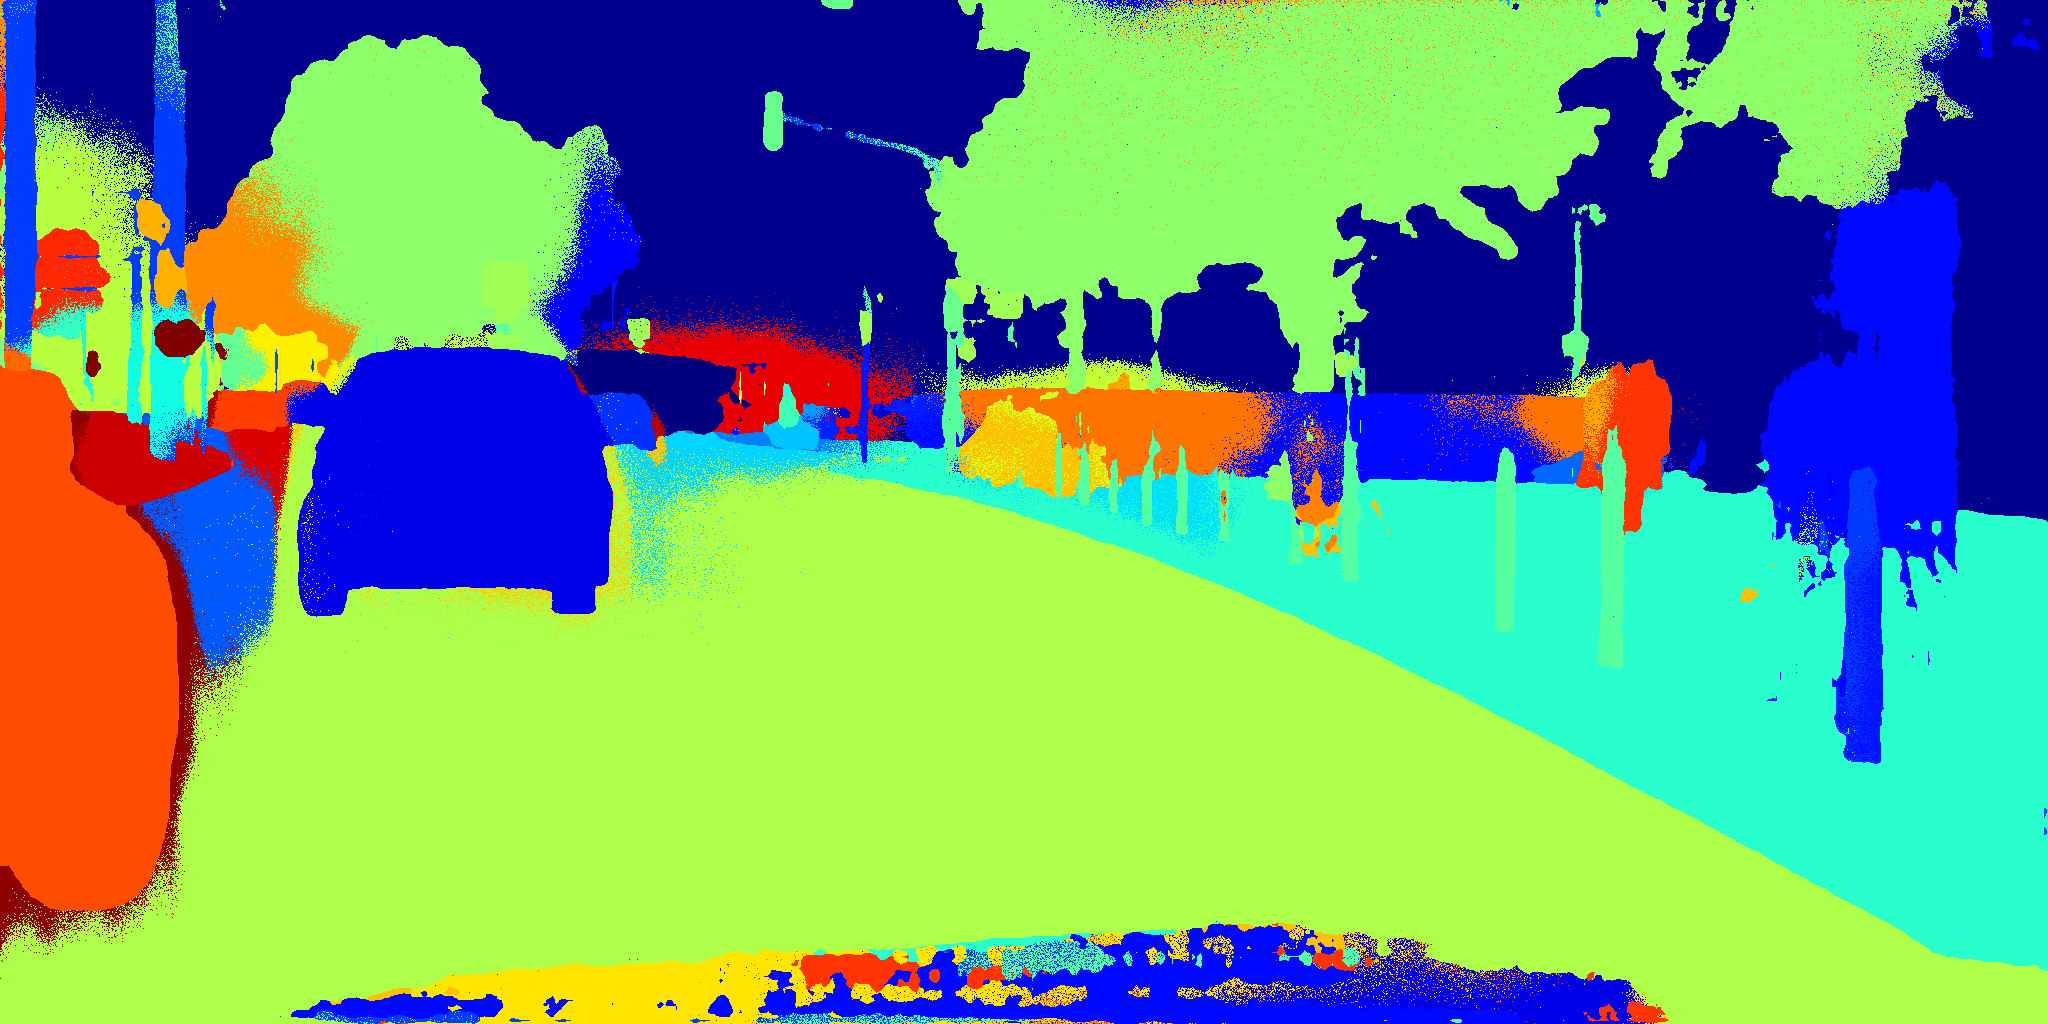

motorcycle: ground truth


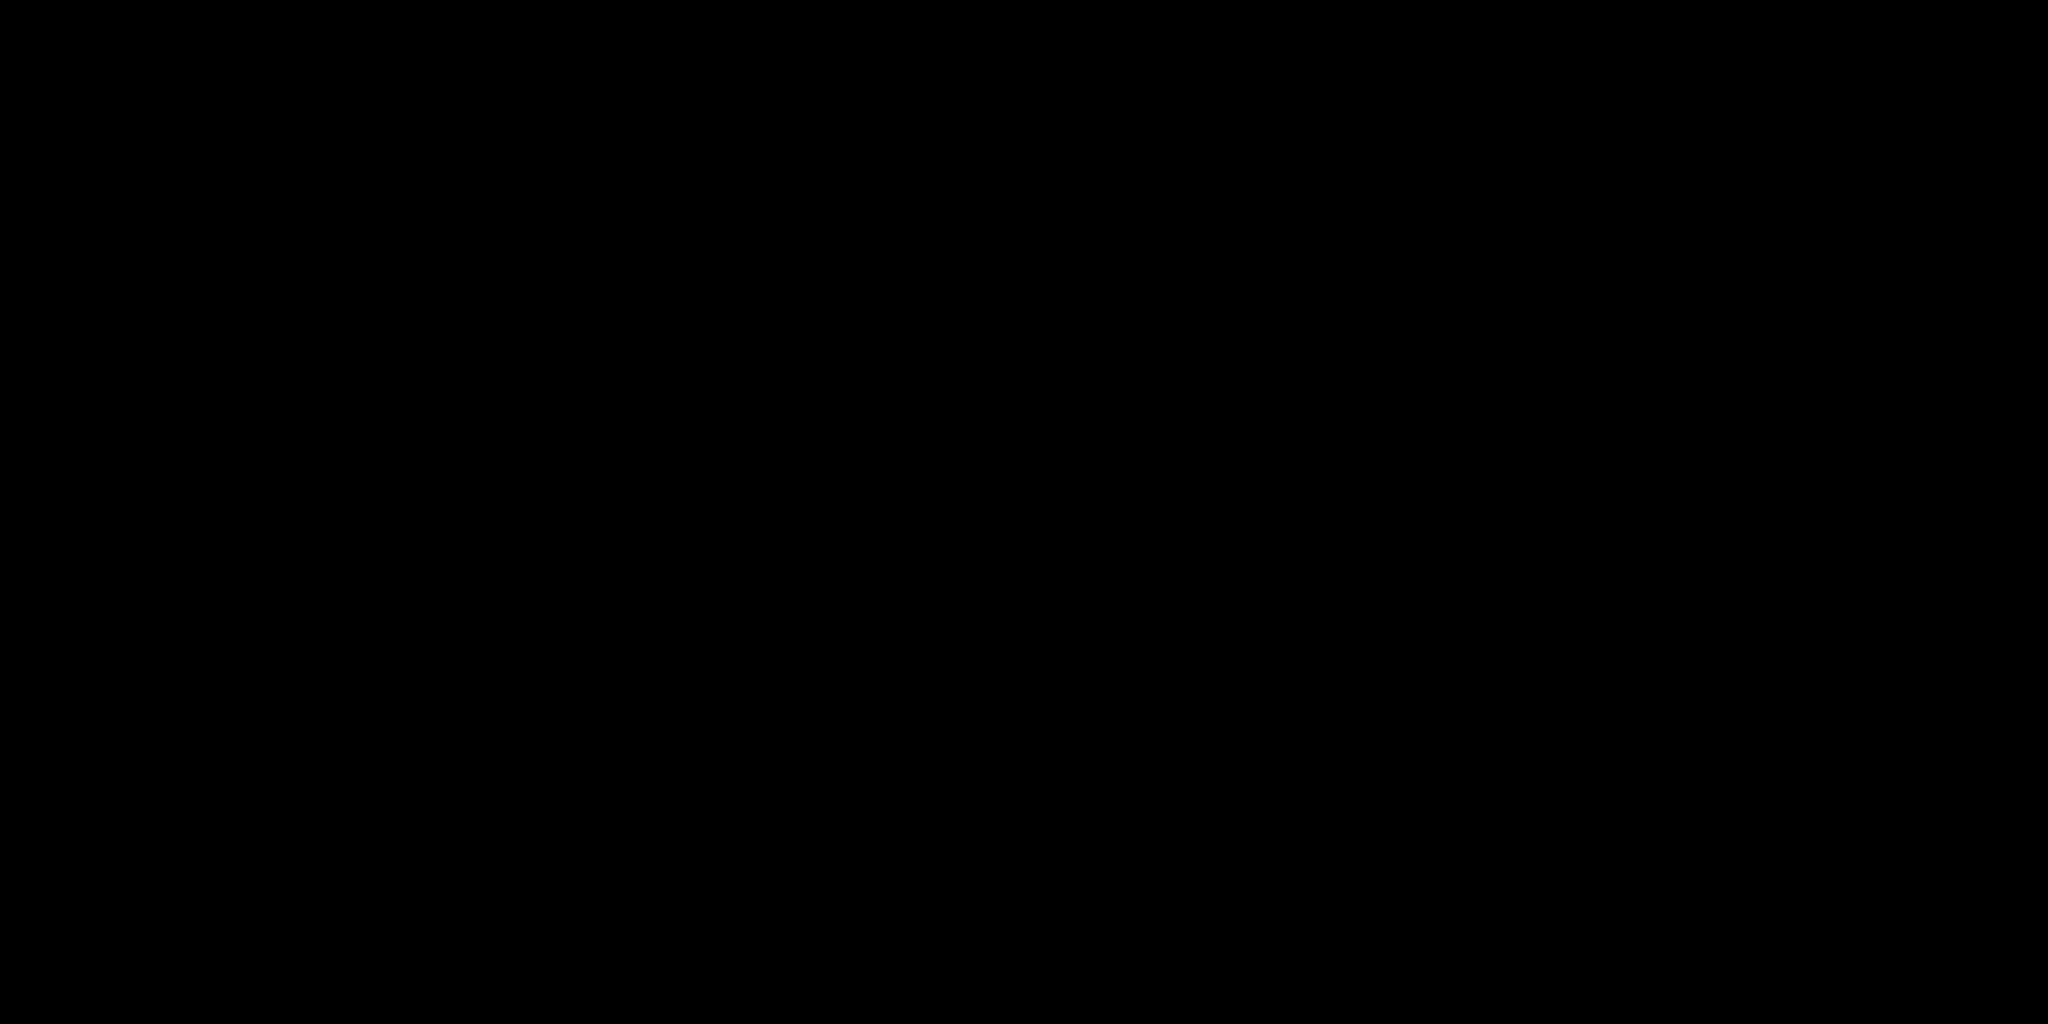

motorcycle: predictions


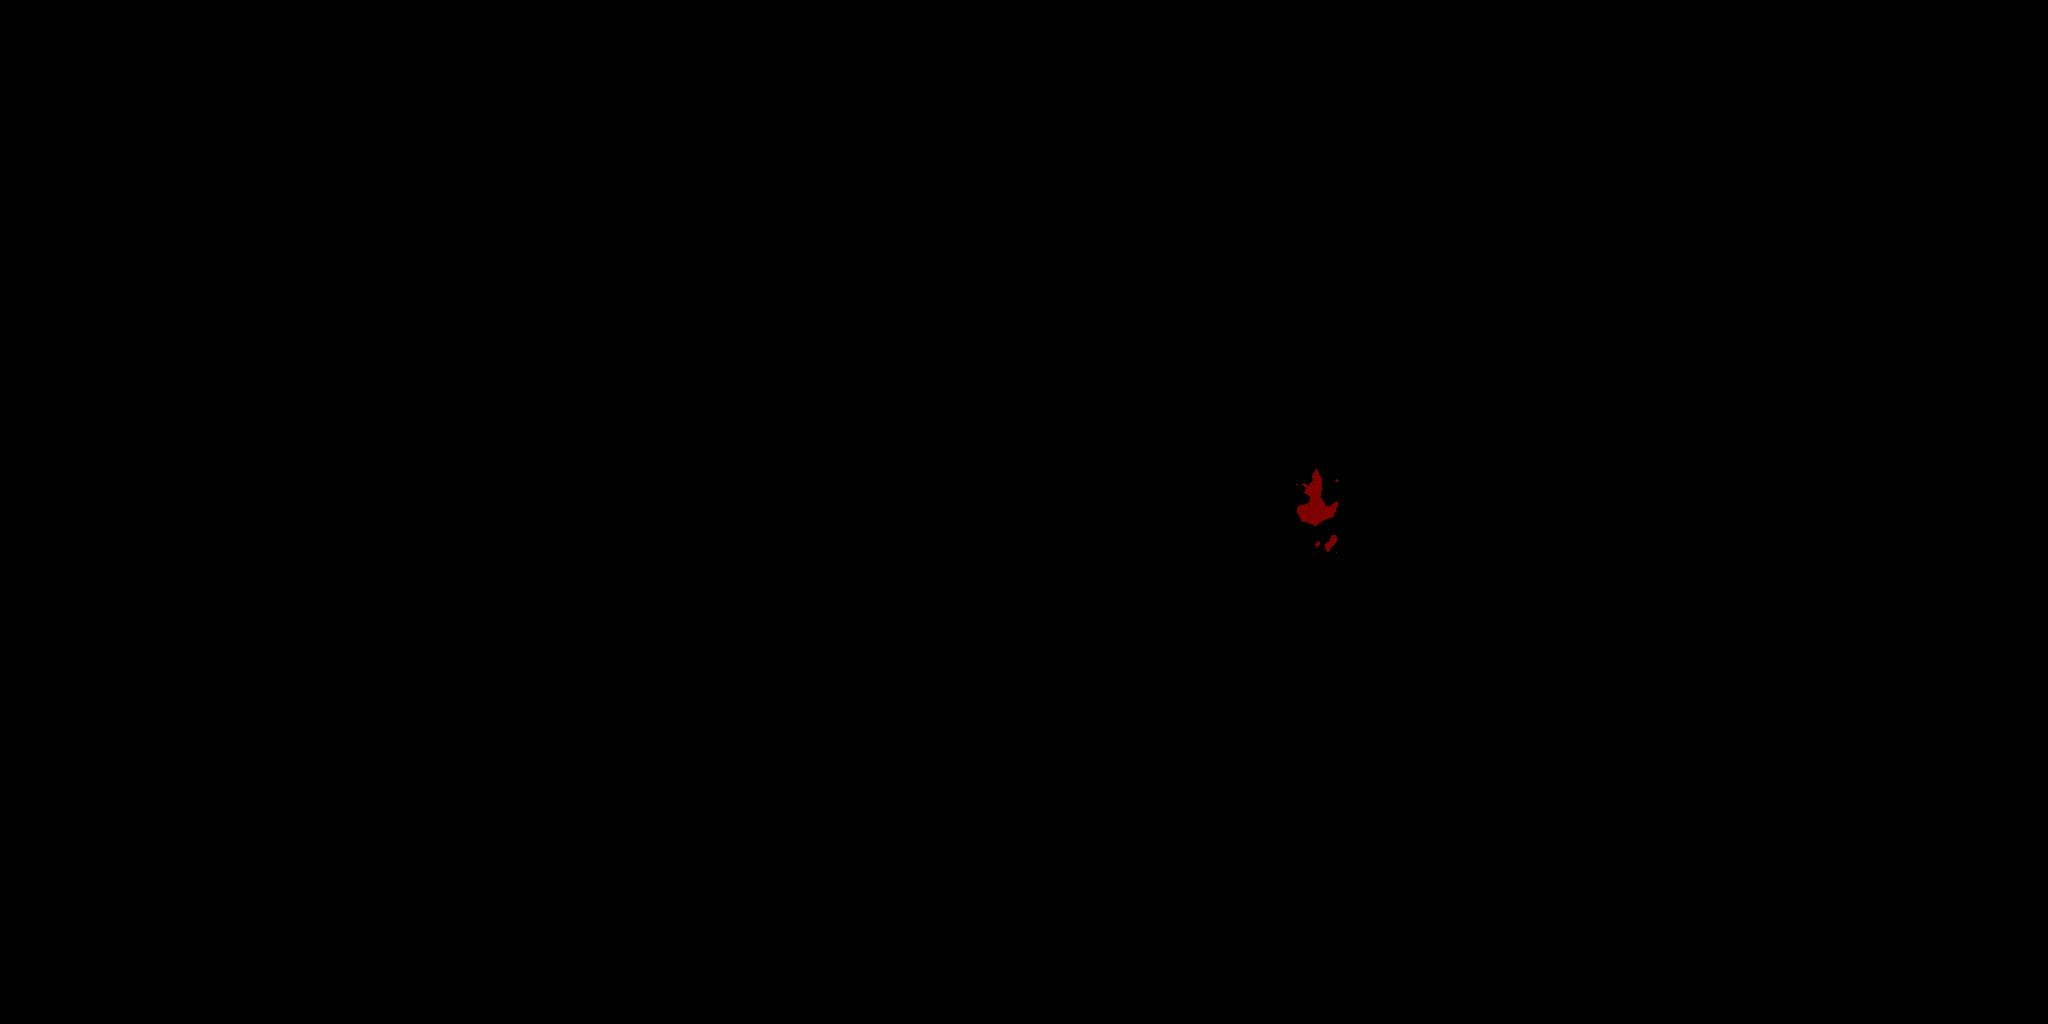

person: ground truth


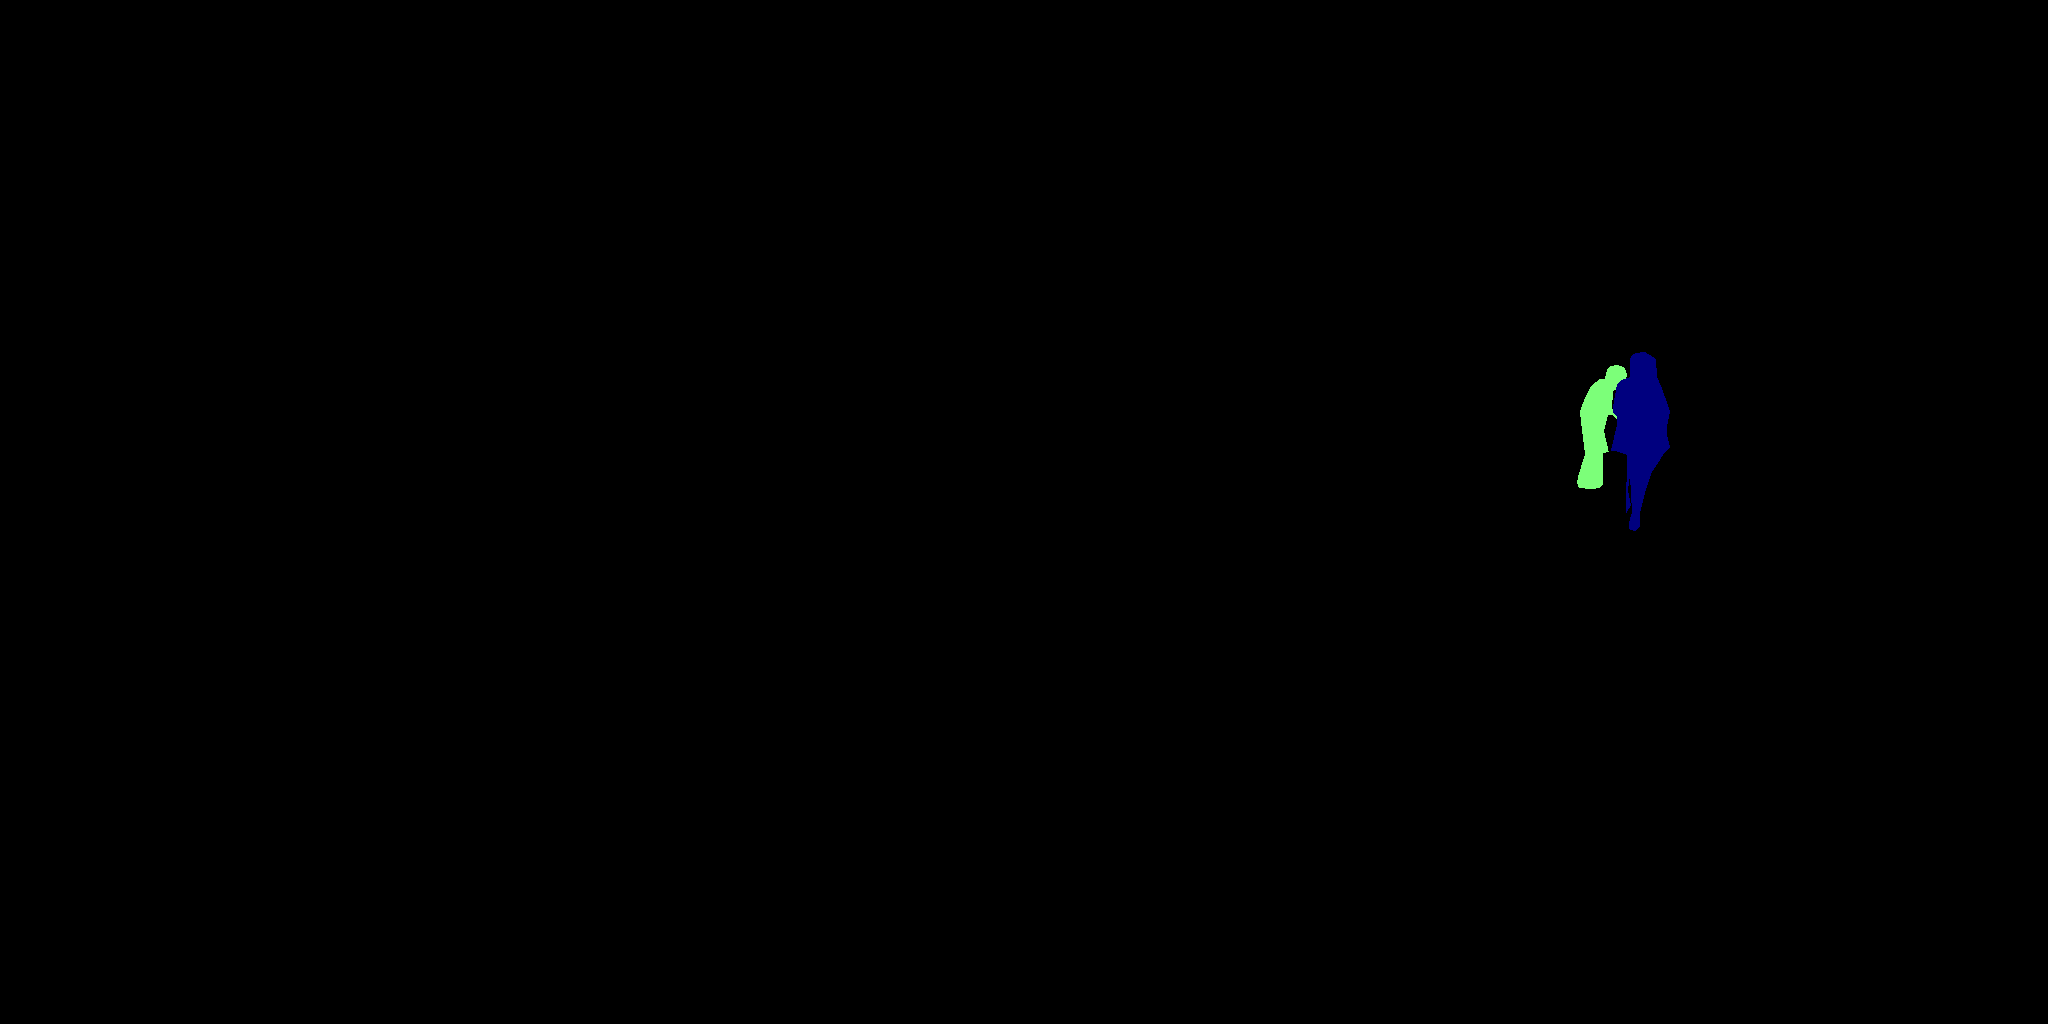

person: predictions


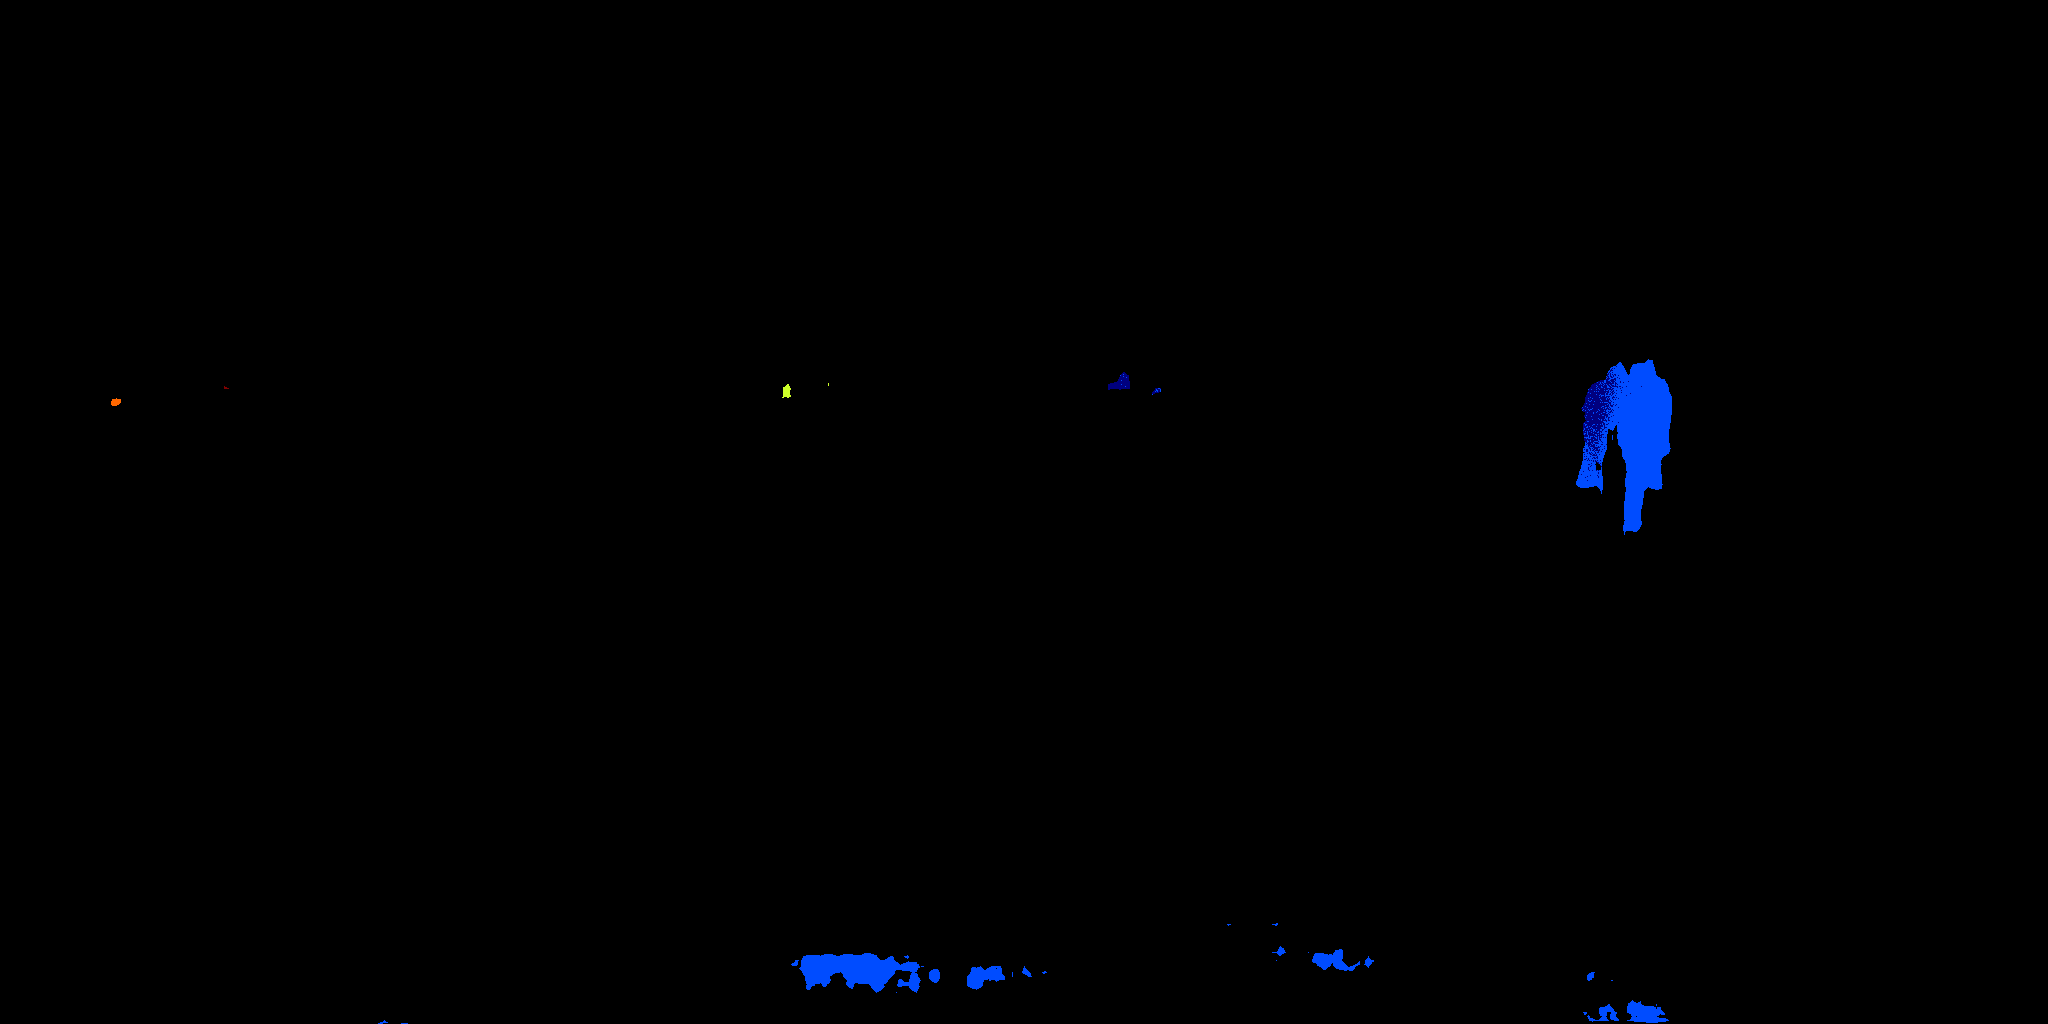

bicycle: ground truth


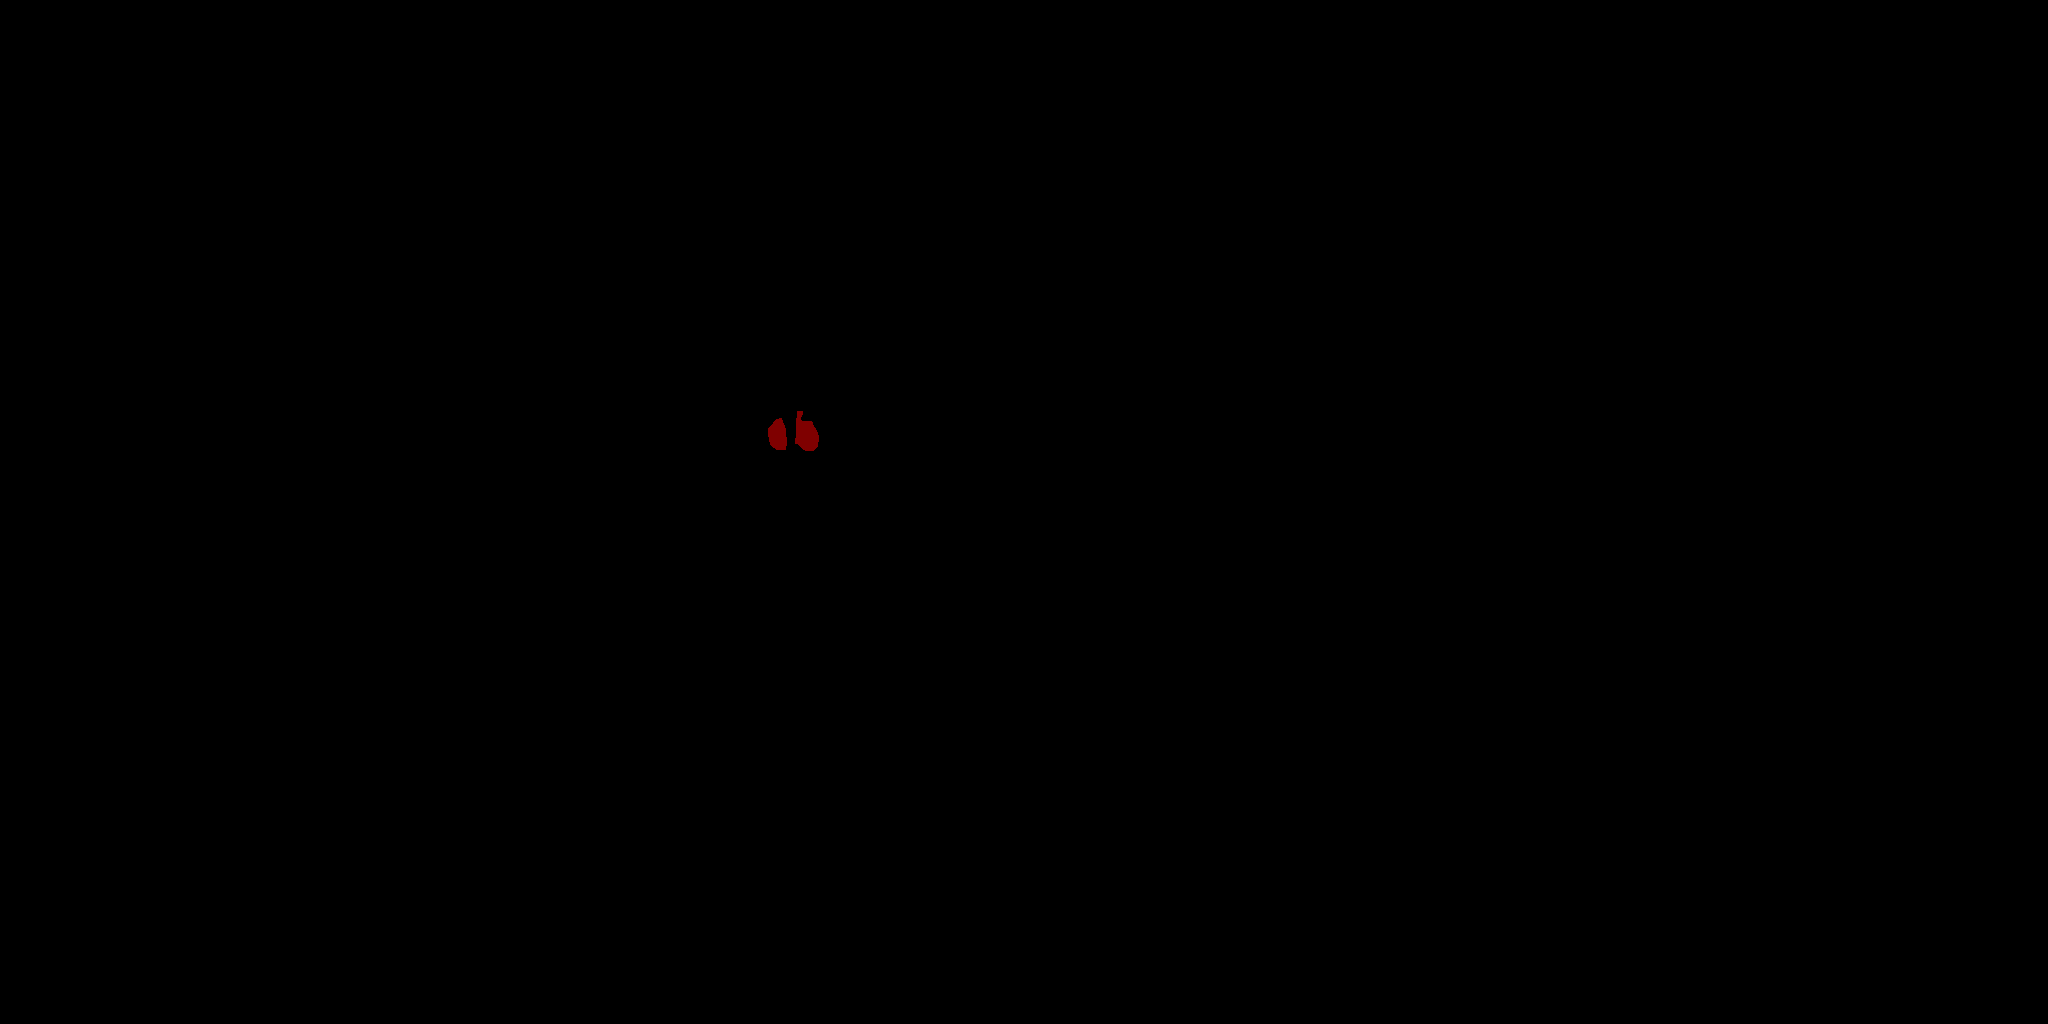

bicycle: predictions


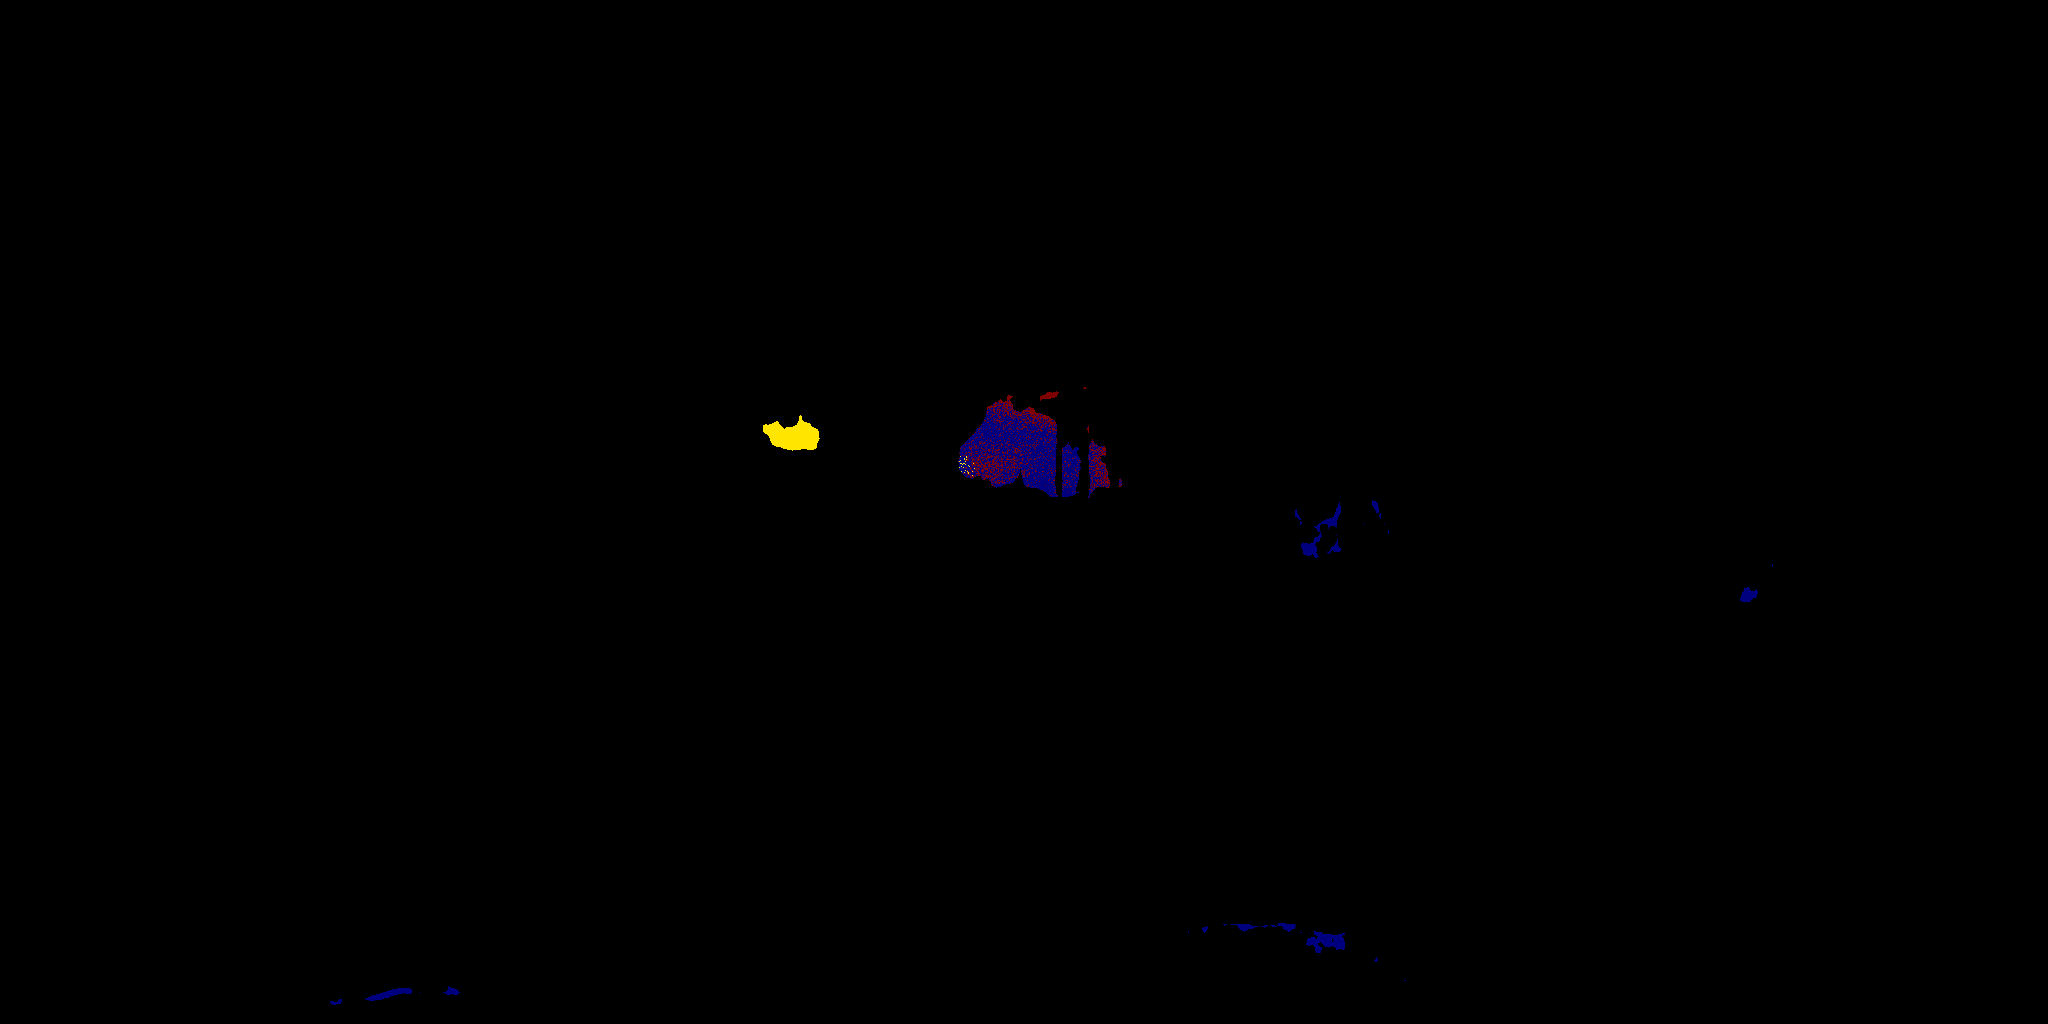

rider: ground truth


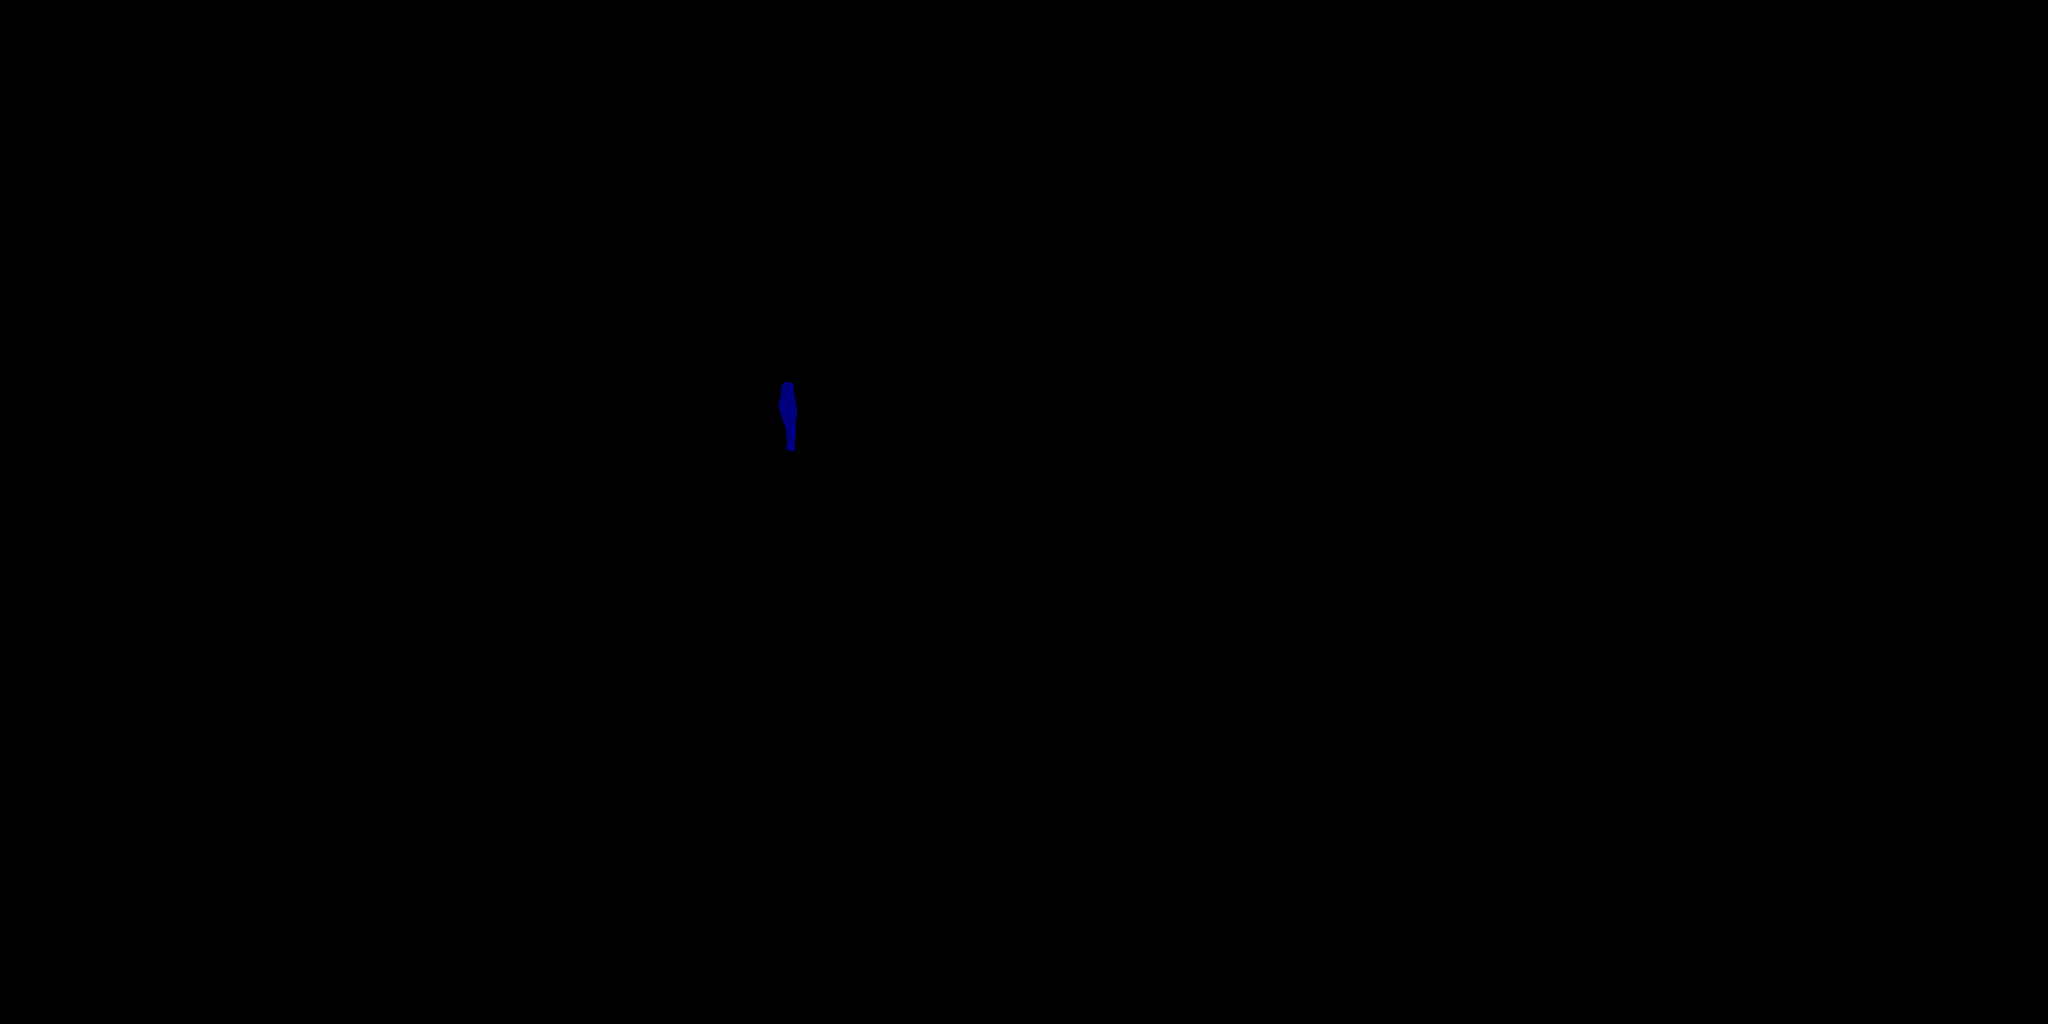

rider: predictions


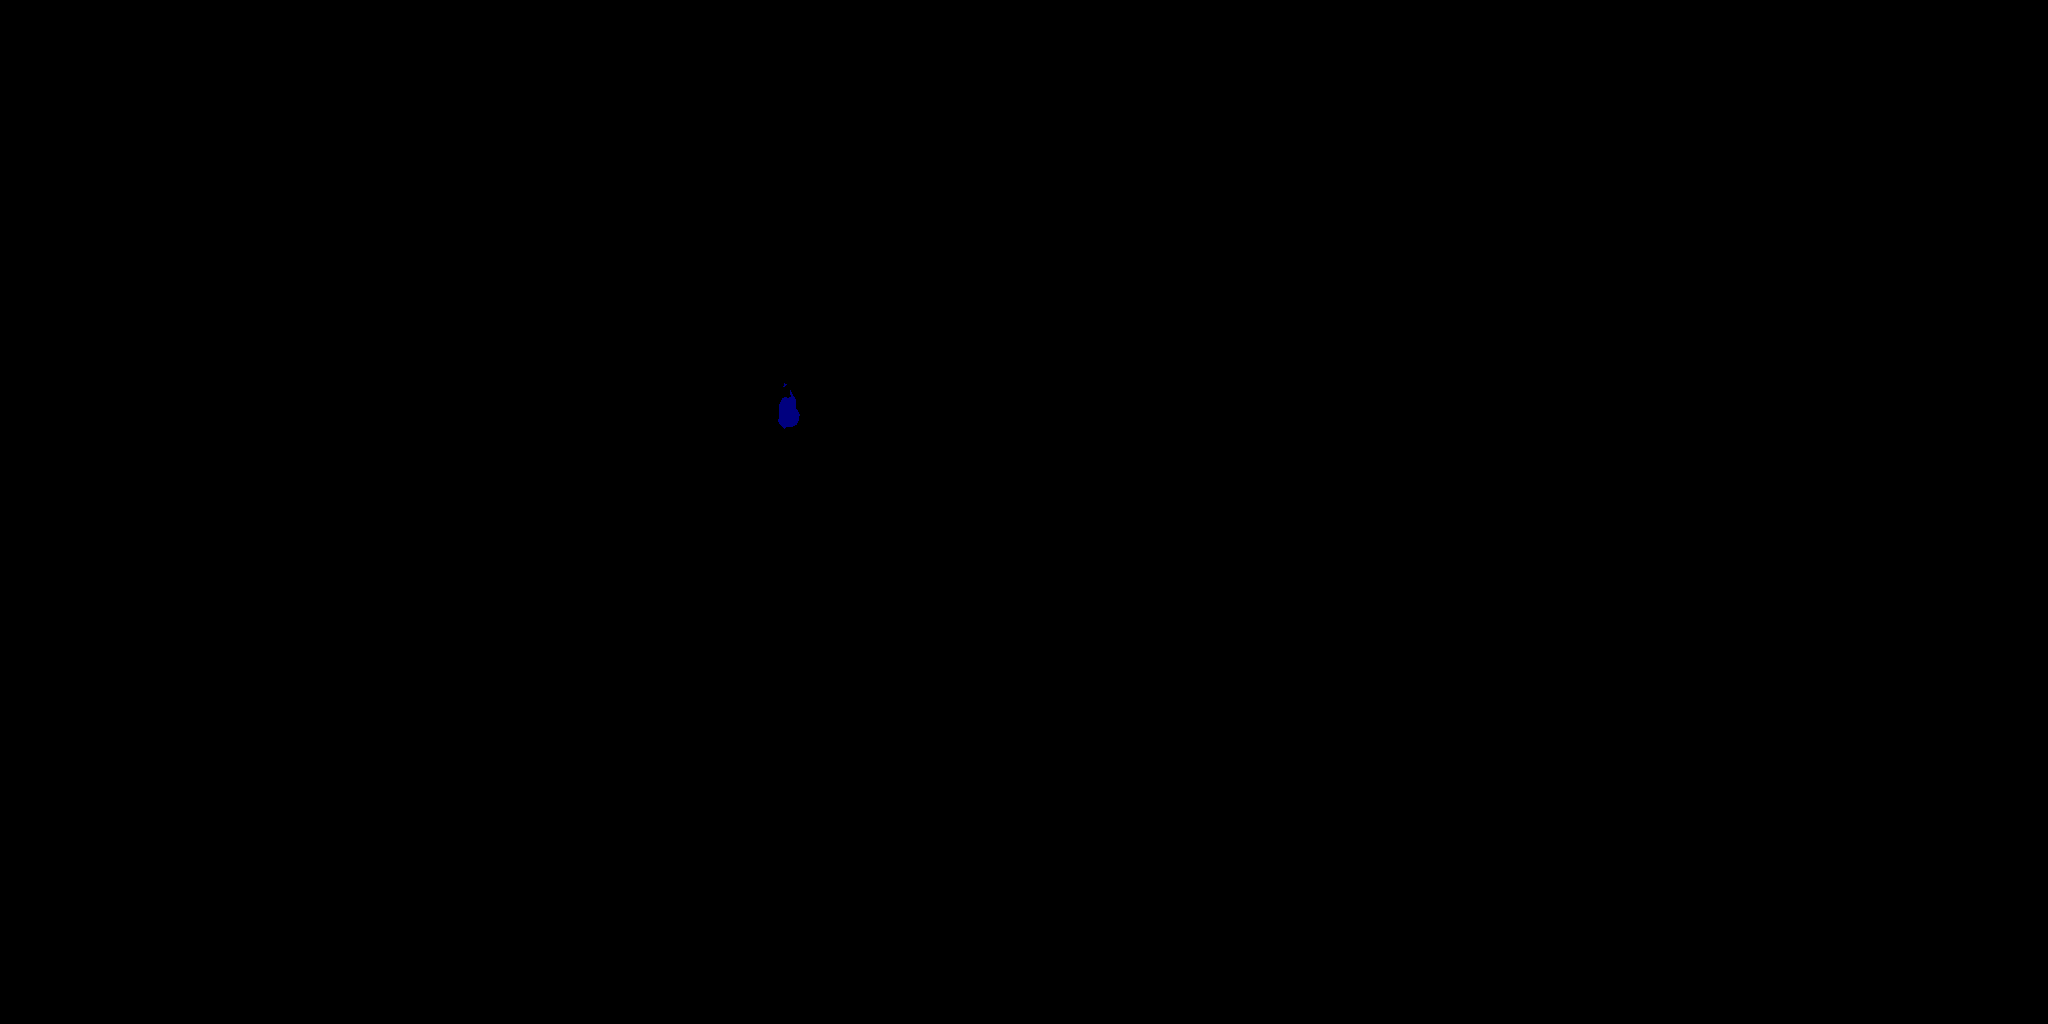

car: ground truth


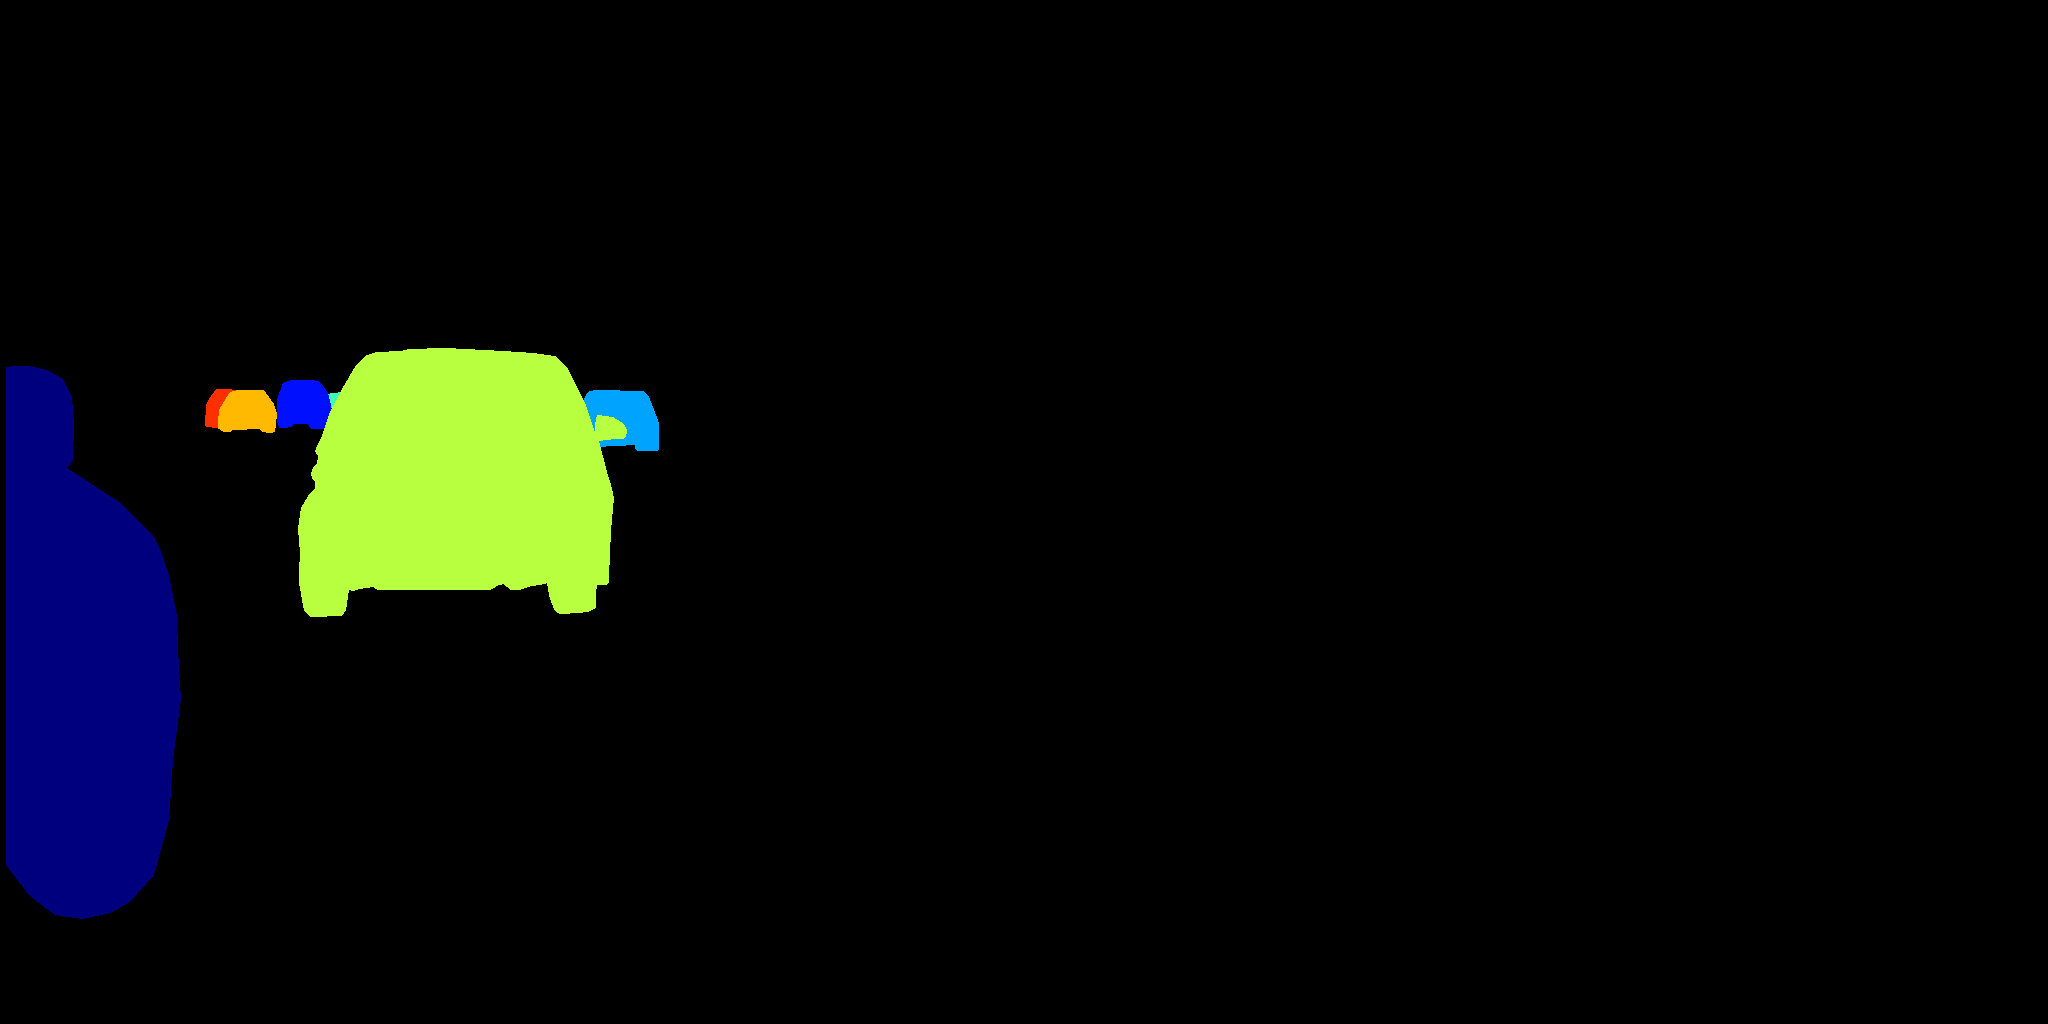

car: predictions


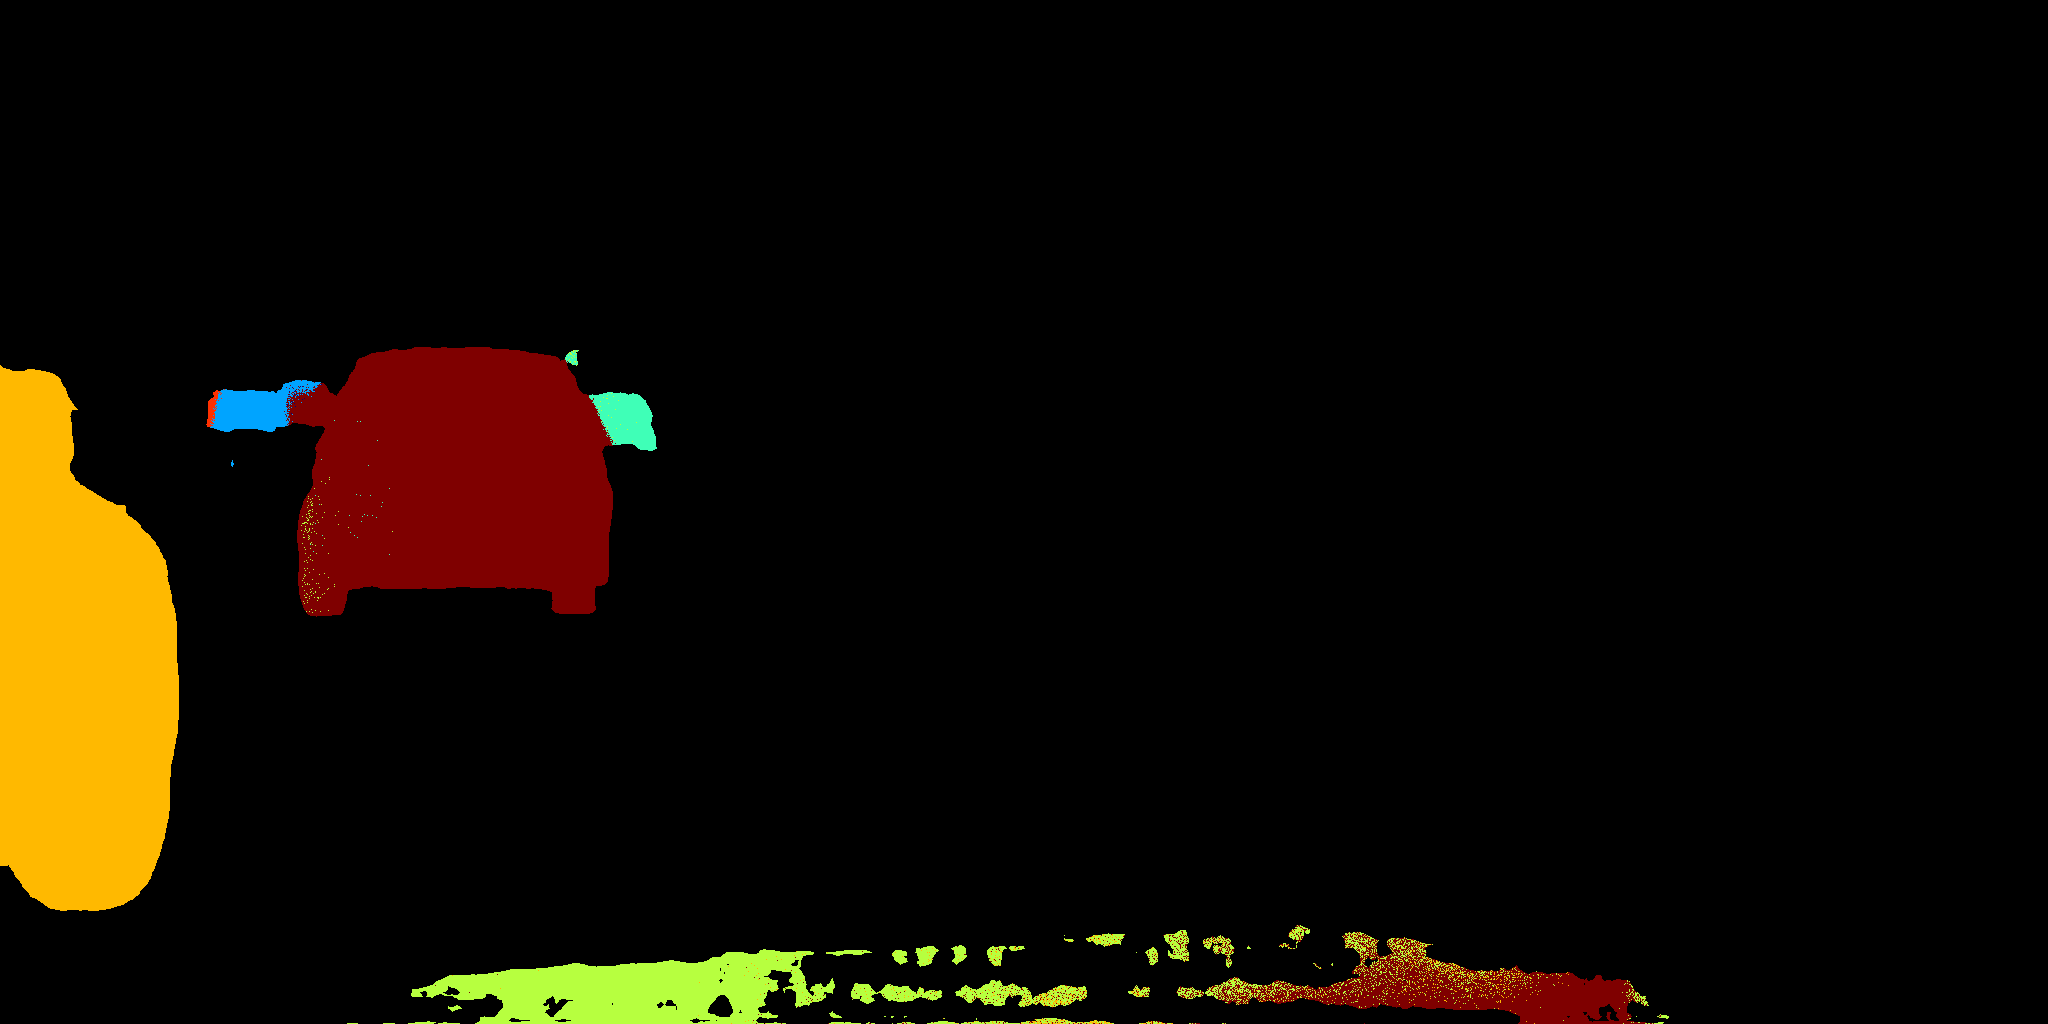

bus: ground truth


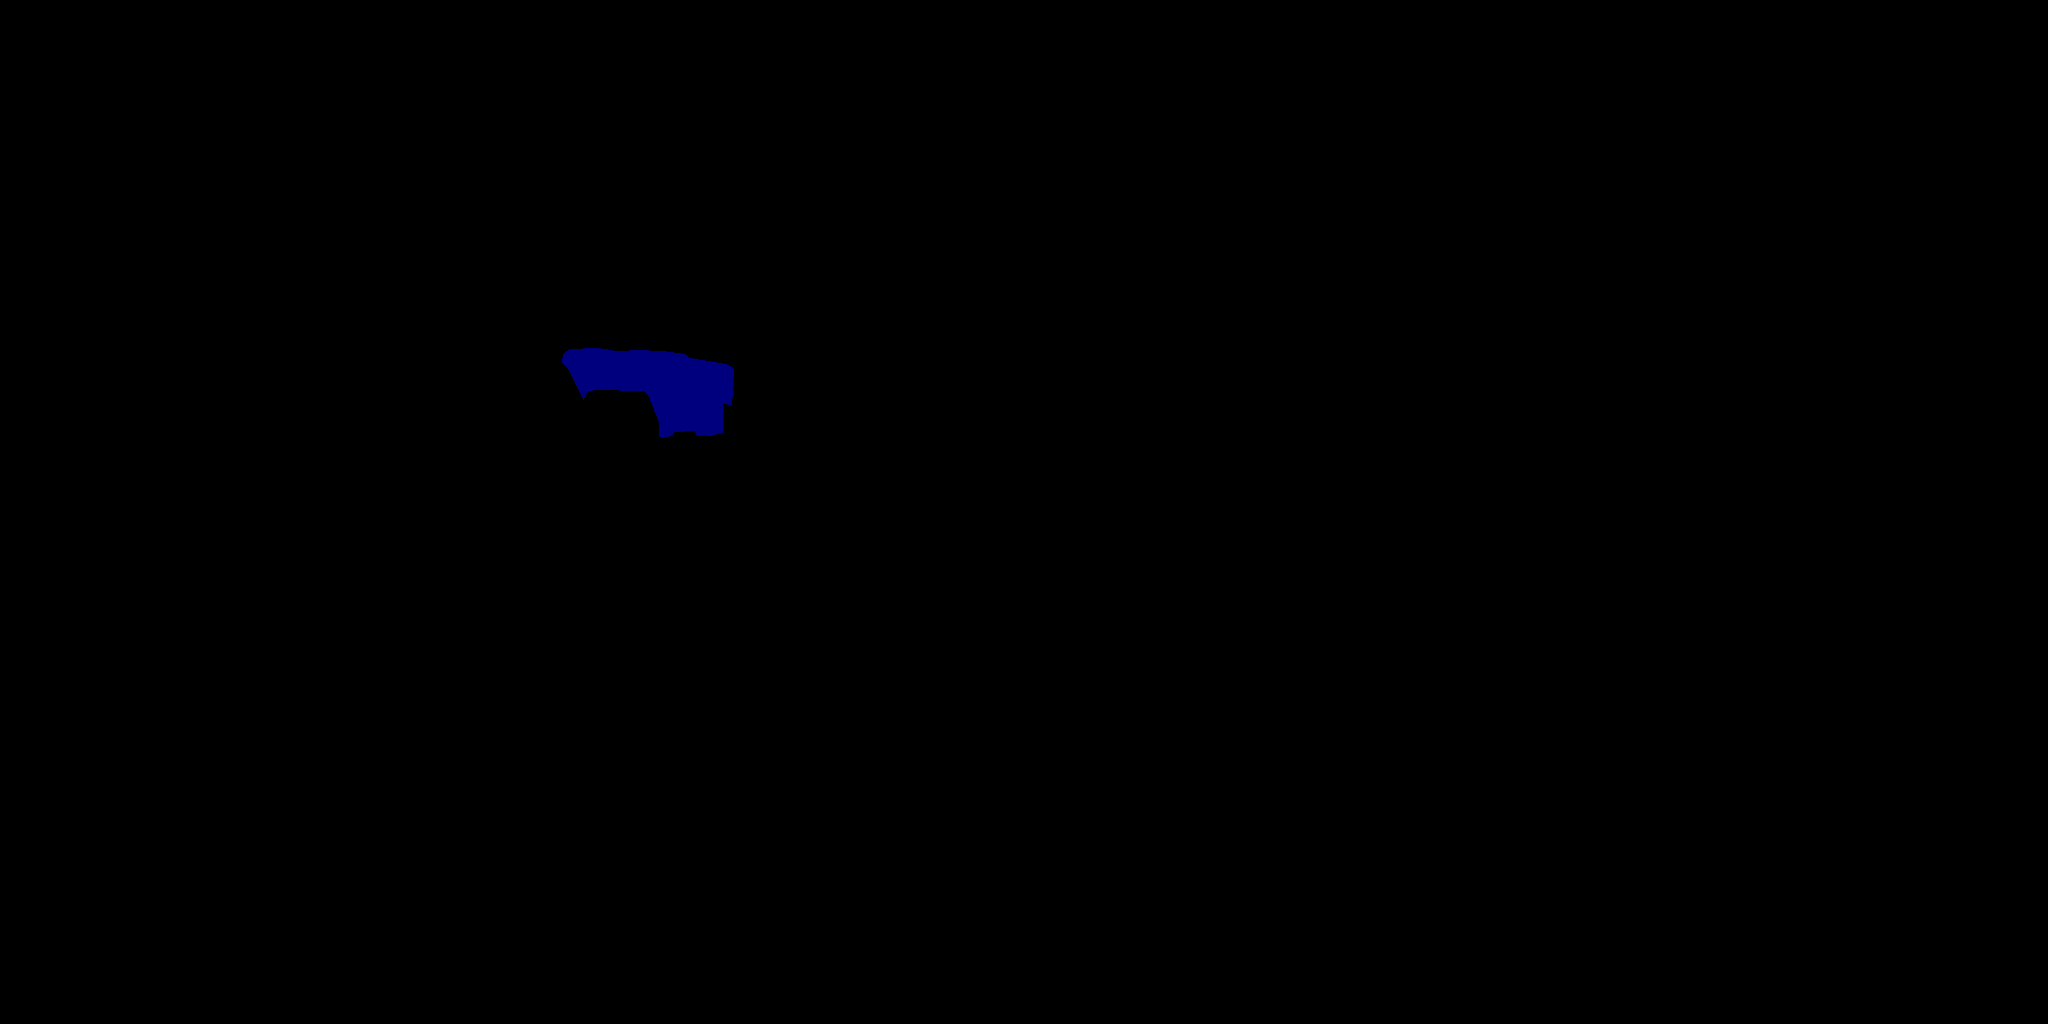

bus: predictions


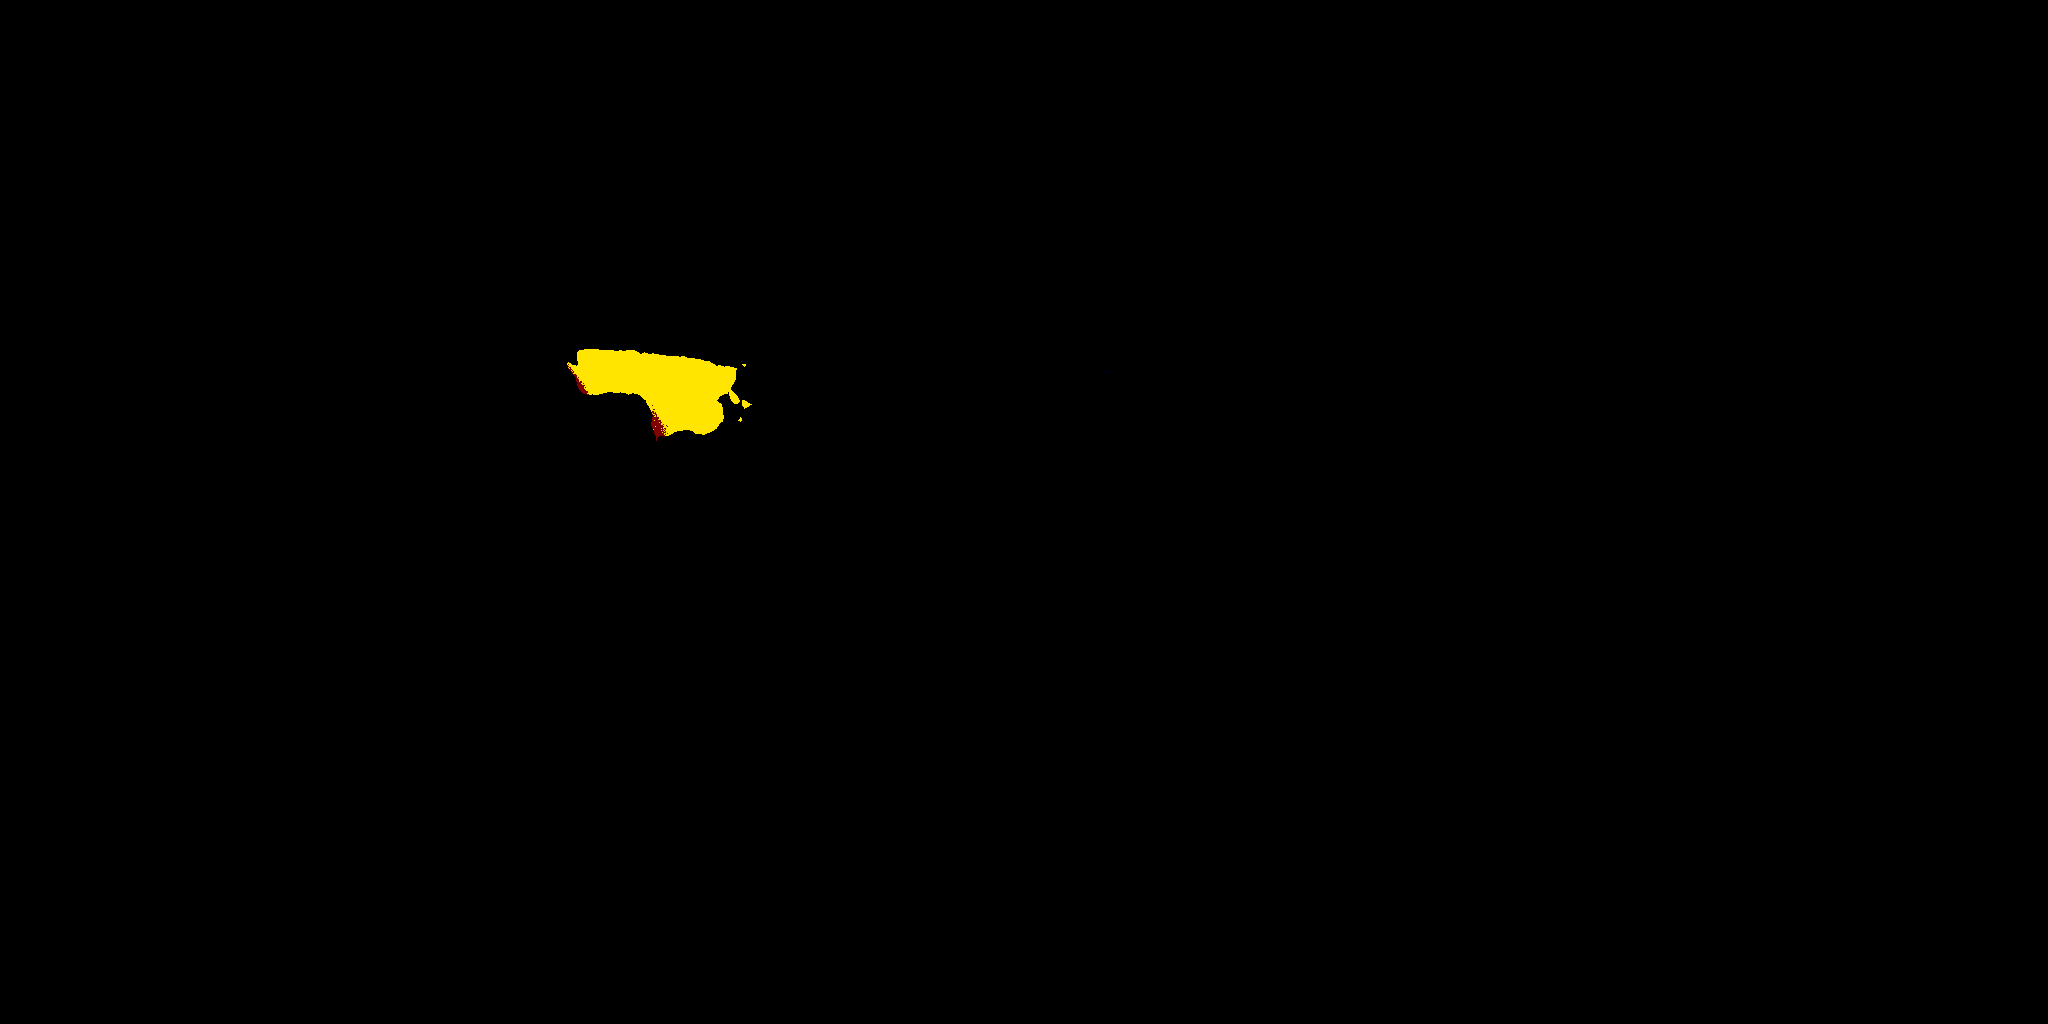

frankfurt_000001_046779
ground truth


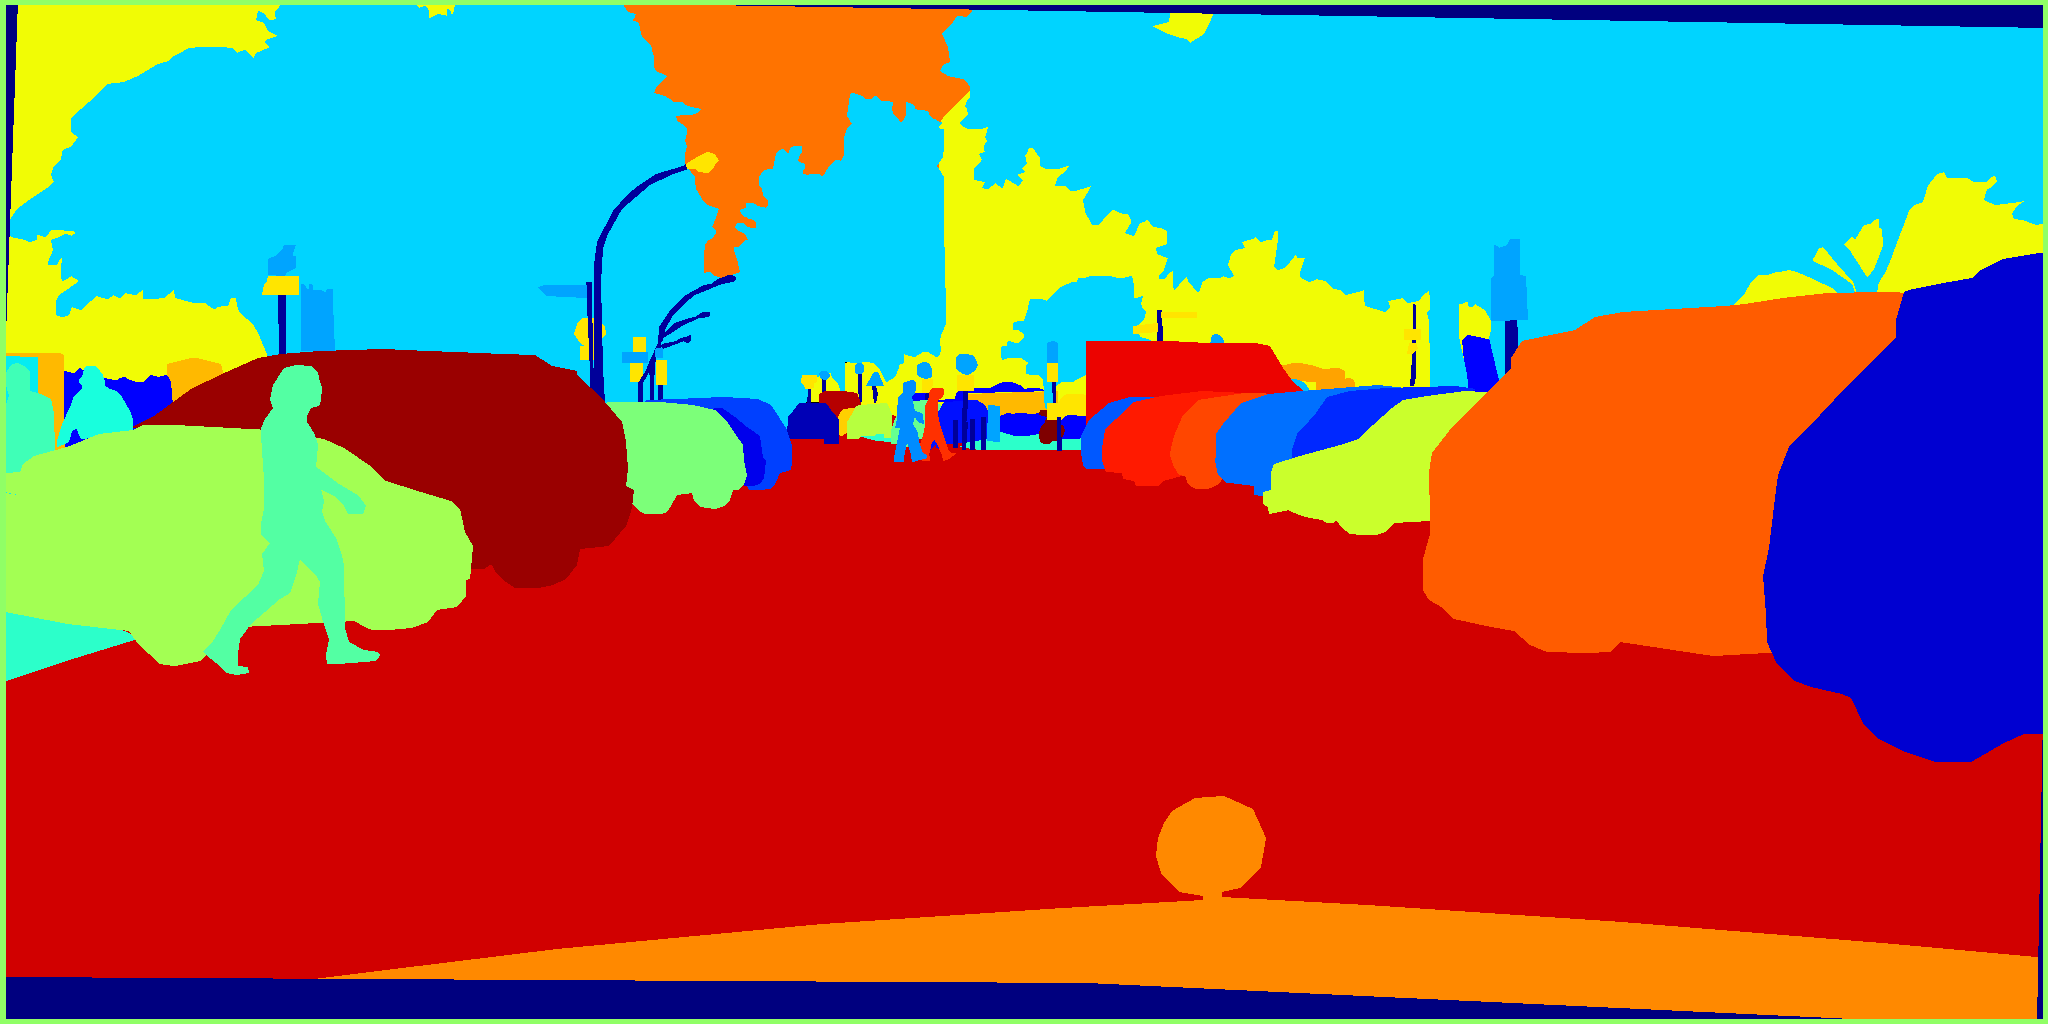

predictions


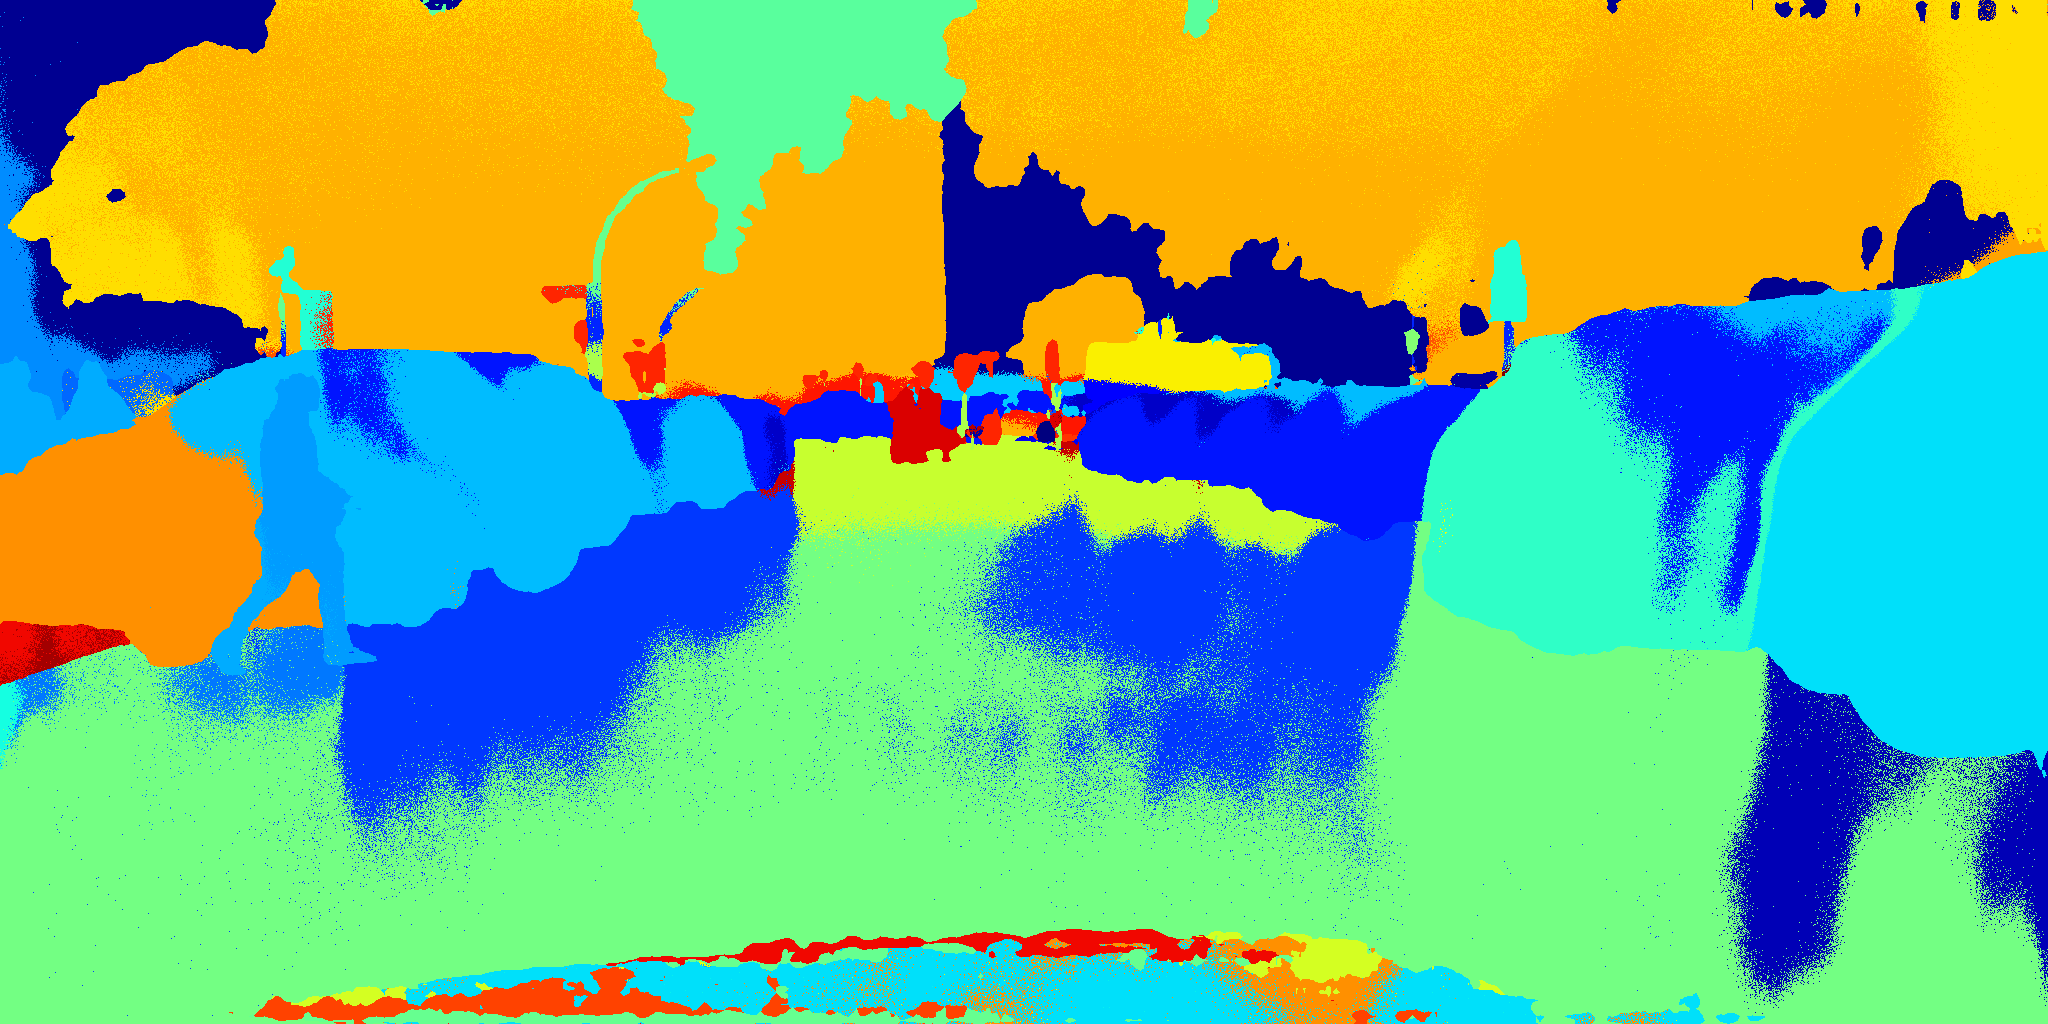

truck: ground truth


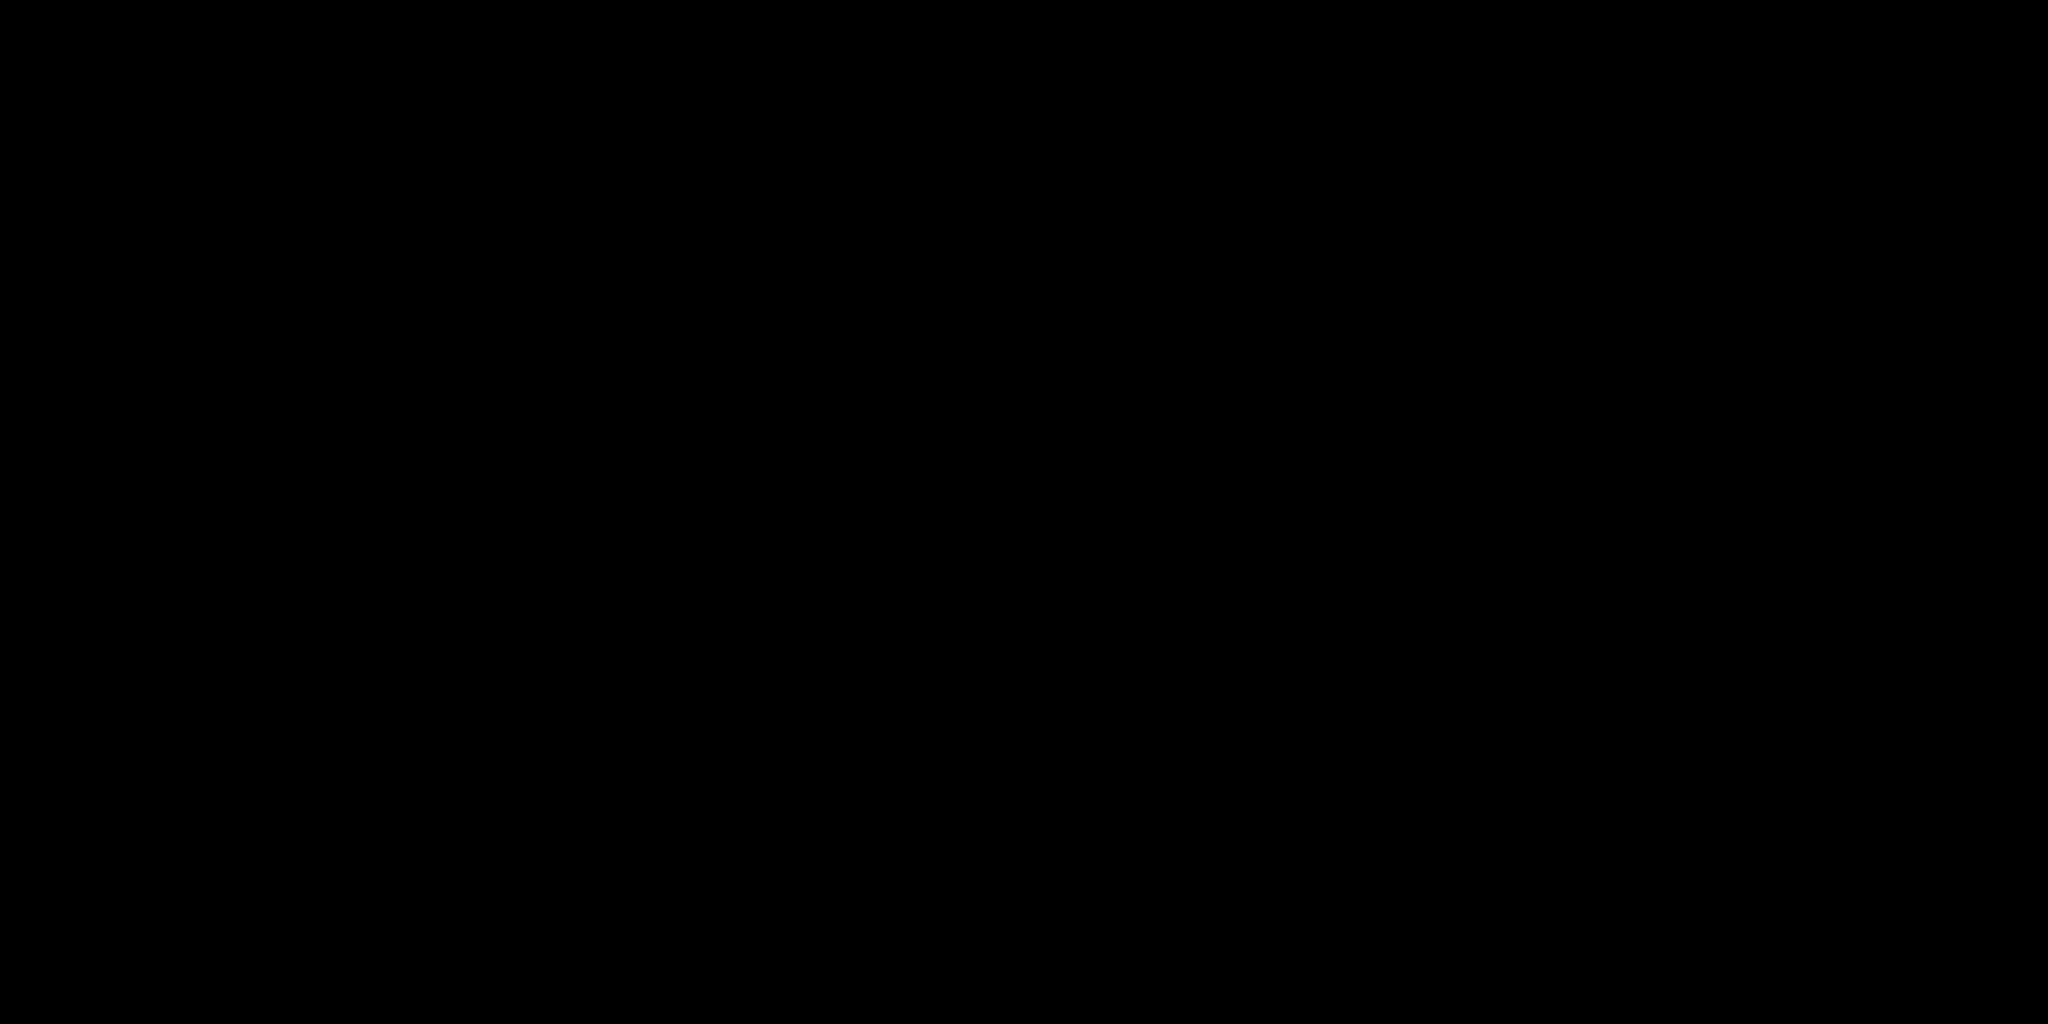

truck: predictions


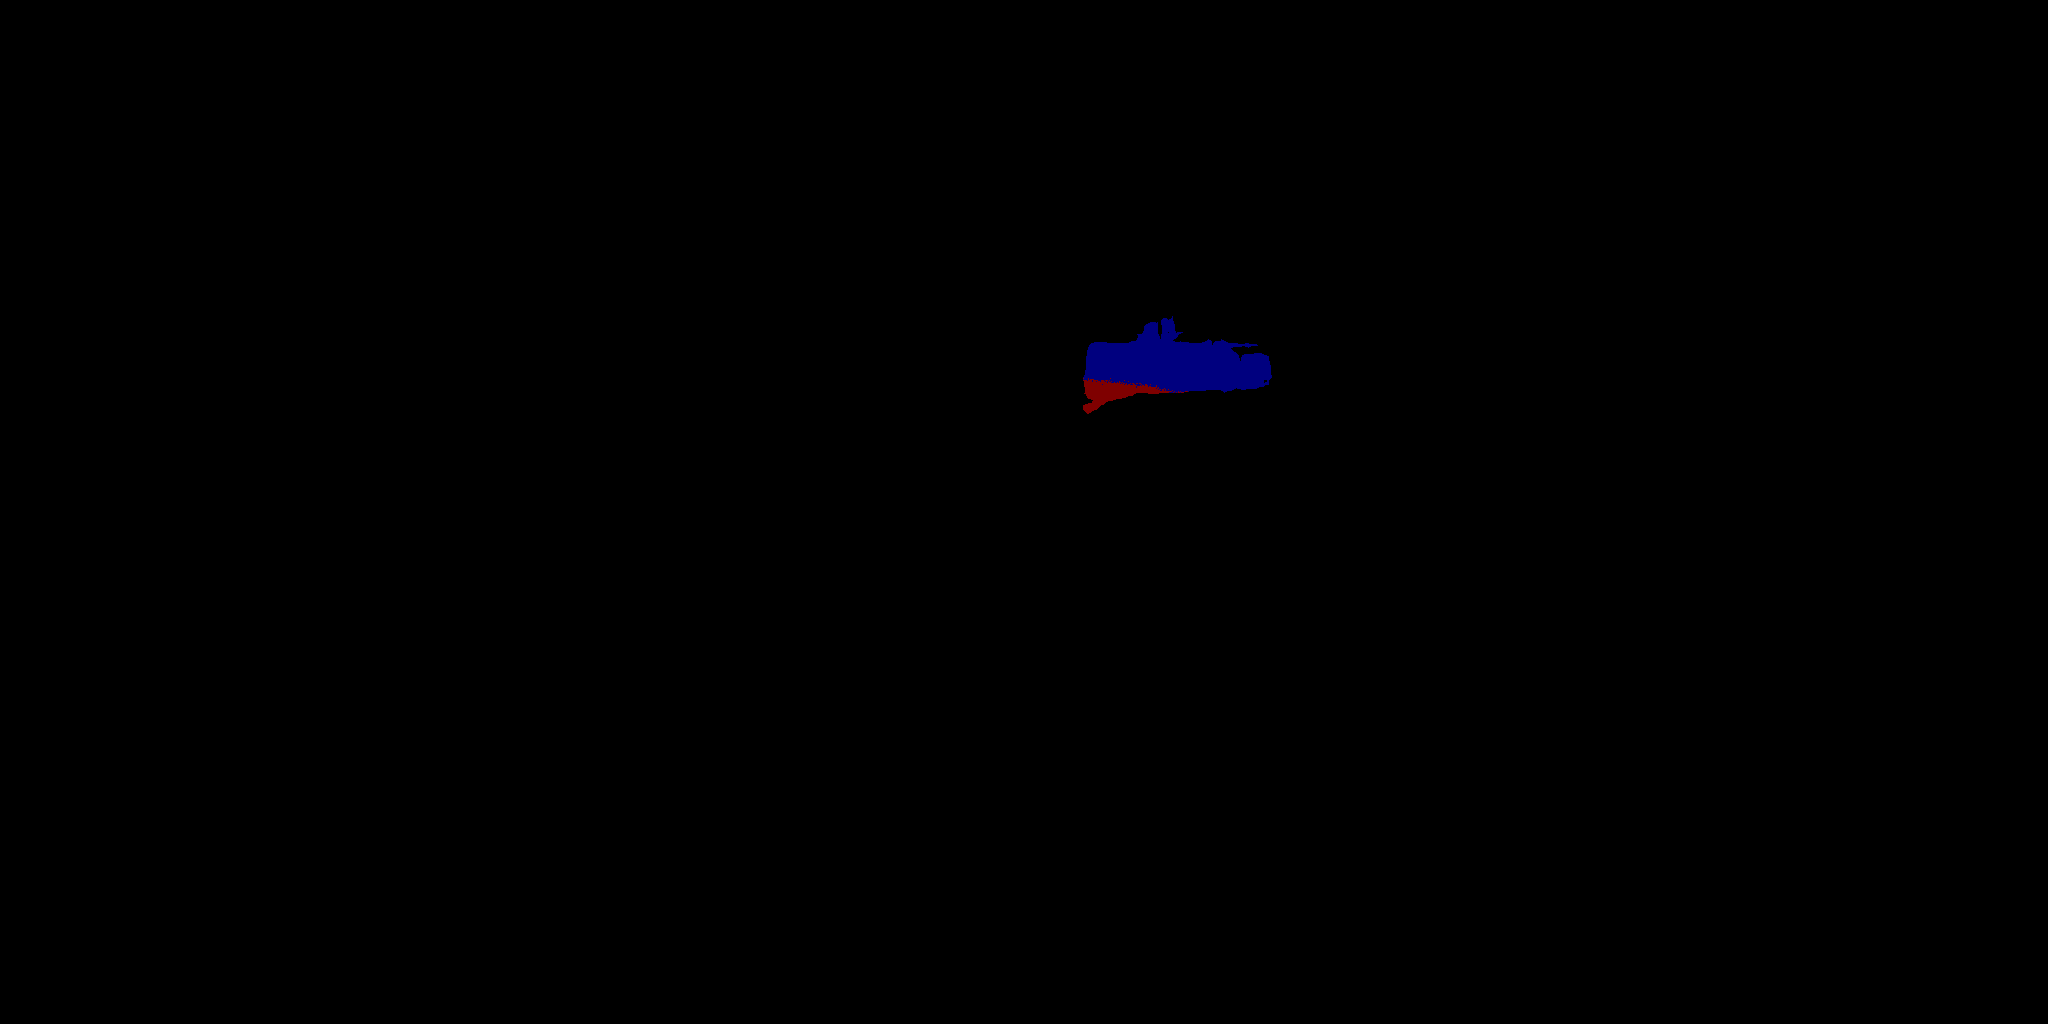

car: ground truth


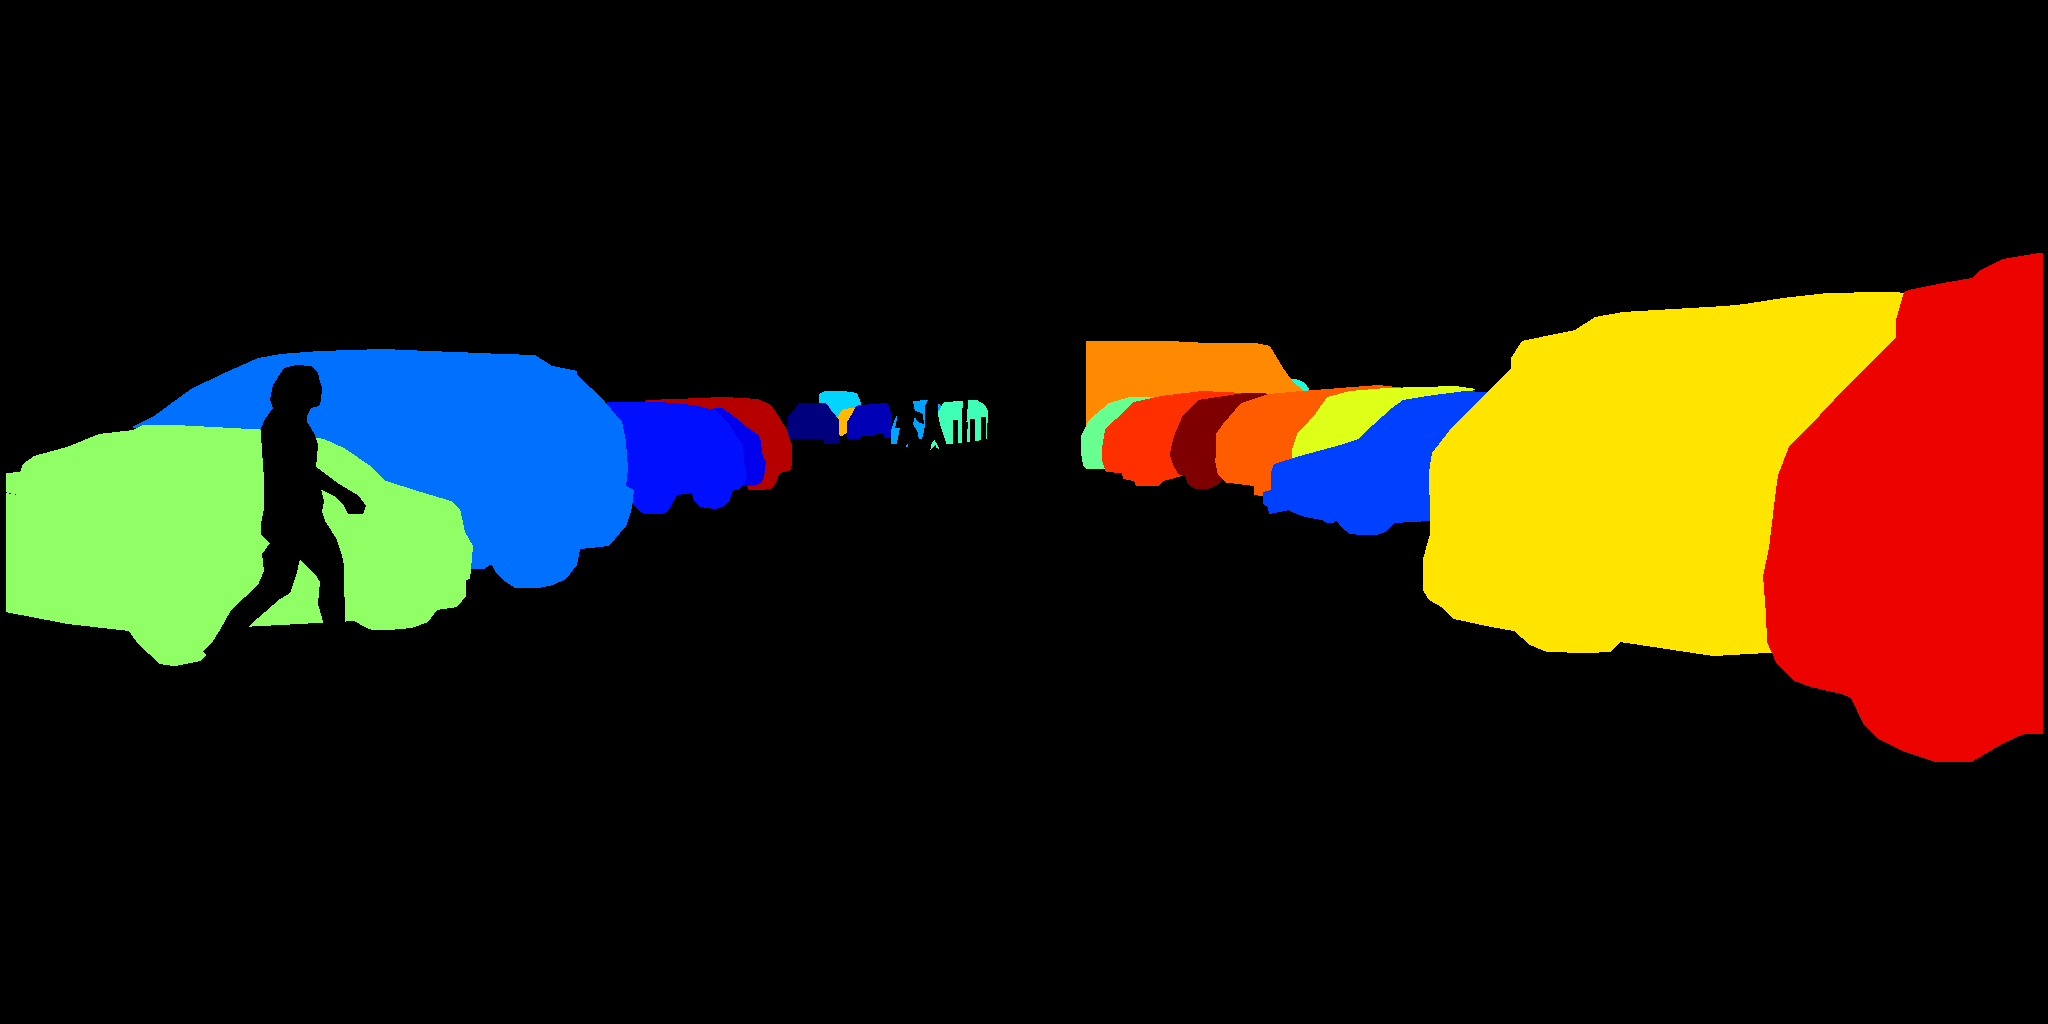

car: predictions


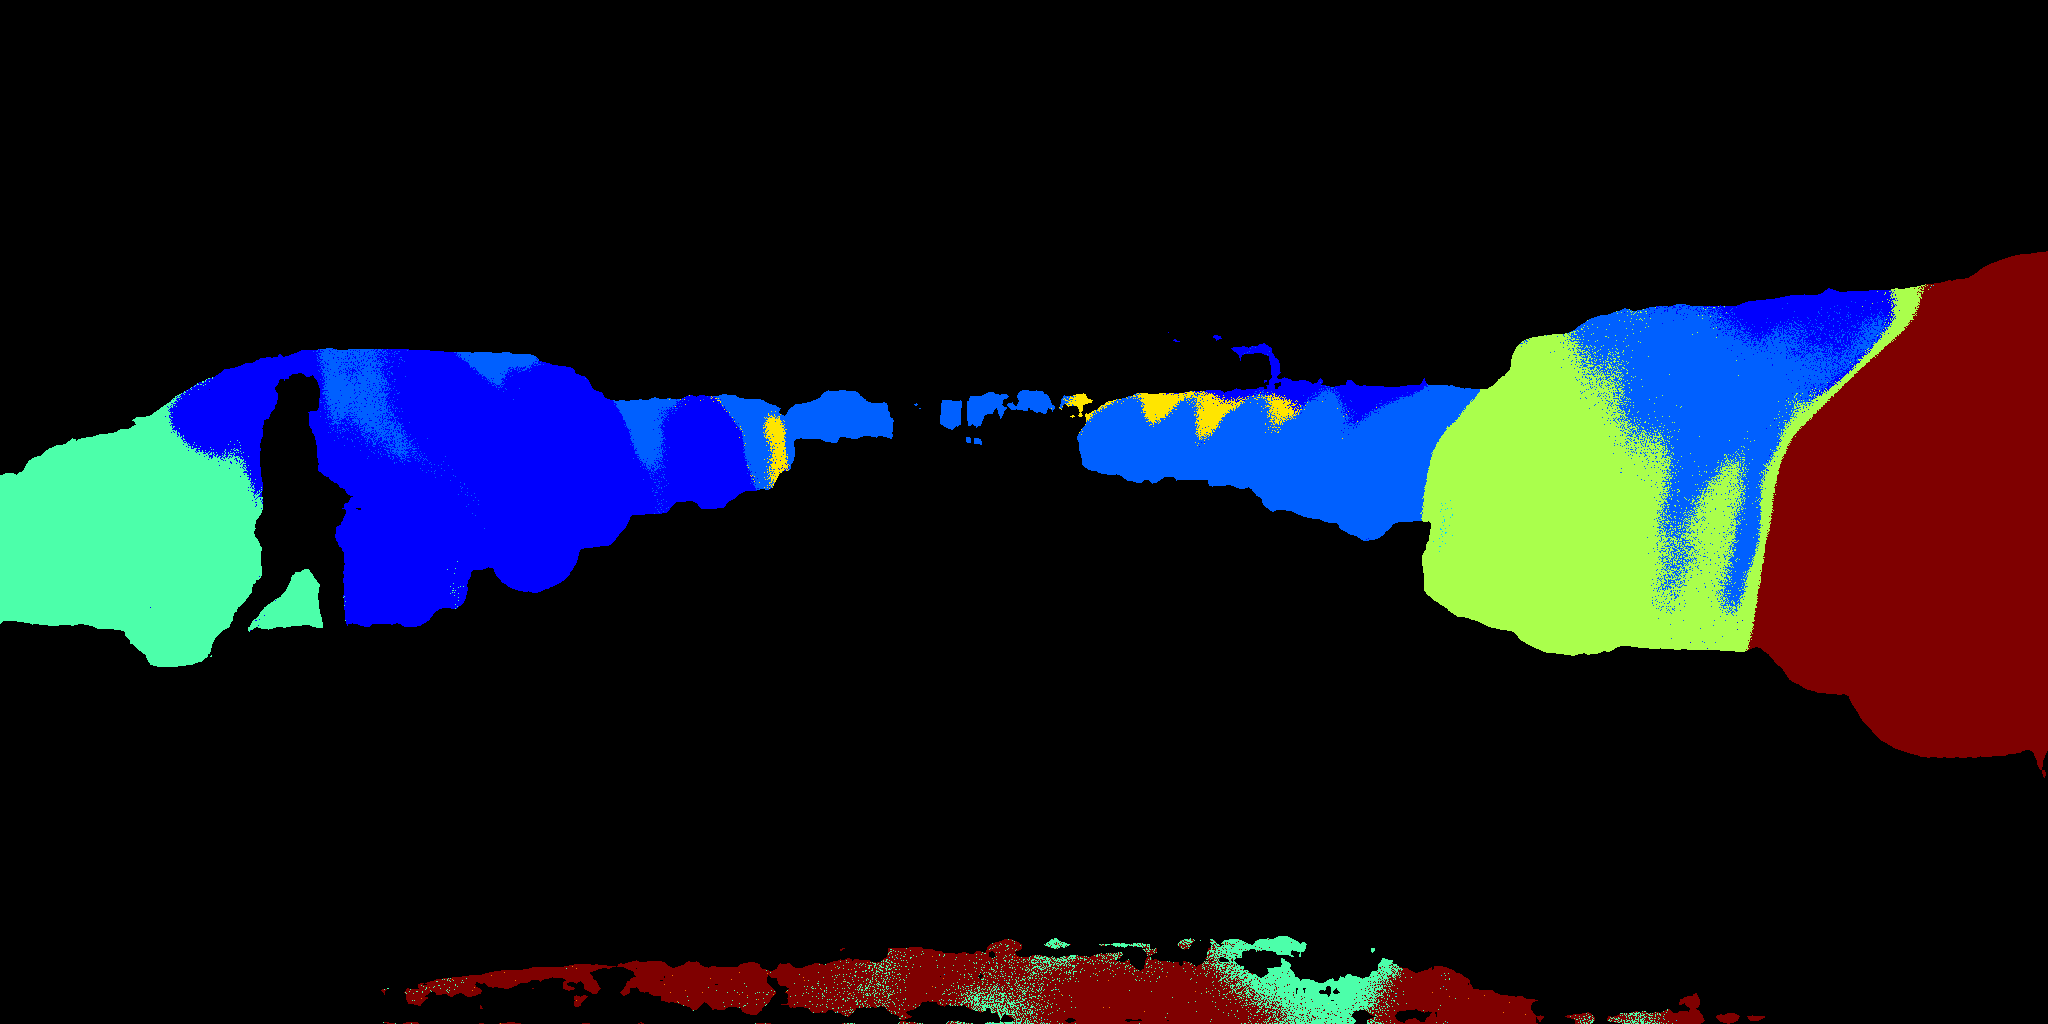

bicycle: ground truth


In [ ]:
# Gather all image paths
full_color_path_list = glob.glob(os.path.join(results_dir, '*{}'.format(IMG_END)))
print('Found {} predictions'.format(len(full_color_path_list)))

for full_color_path in full_color_path_list[0:min(len(full_color_path_list), max_images)]:
    basename = os.path.basename(full_color_path)
    city = basename.split('_')[0]
    print(basename.rstrip(IMG_END))
    gt_path = os.path.join(gt_dir, city, basename.rstrip(IMG_END) + '_gtFine_instanceIds.png')
    gt_image = imageio.imread(gt_path)
    gt_semantic_classes = np.floor_divide(gt_image, 1000)
    gt_image_color = get_color_img(gt_image)
    print('ground truth')
    display(get_img_from_array(gt_image_color, width=WIDTH))
    print('predictions')
    display(Image(full_color_path, width=WIDTH))
    #display_side_by_side(get_string_from_array(gt_image), full_color_path)
    # Display individual semantic classes
    for semantic_path in glob.glob(full_color_path.rstrip(IMG_END) + '_semantic_*'):
        class_number = int(semantic_path.split('_')[-1].rstrip('.png'))
        print('{}: ground truth'.format(id2label[class_number].name))
        gt_this_semantic = gt_image + 1
        gt_this_semantic[gt_semantic_classes != class_number] = 0
        gt_this_semantic_color = get_color_img(gt_this_semantic)
        display(get_img_from_array(gt_this_semantic_color, width=WIDTH))
        
        print('{}: predictions'.format(id2label[class_number].name))
        display(Image(semantic_path, width=WIDTH))